#  Сбор и обработка данных

**Дипломная работа по теме: “Анализ расширения торгового направления ниши сейфов, стеллажей и металлической мебели (поиск инсайтов, составление рекомендаций стейкхолдерам)”**

[Ноутбук с анализом данных и гипотезами](https://colab.research.google.com/drive/1D9DZ_jaeepIdiDA_OyvkCj3EWn8Pttzh?usp=sharing)

Данные для исследования были получены путём парсинга официальных сайтов организаций, занимающихся направлением сейфов, стеллажей, металлической и производственной мебели на местном рынке города N. в количестве 5 шт., а также 1 сайта потенциального поставщика.

Для наборов данных, касающихся конкурентов были присвоены номера 1-5, для поставщика - 43.


## Библиотеки

In [ ]:
#подключаем библиотеки
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

## Парсинг по организации 1

[Официальный сайт организации 1](https://ижевск.железная-мебель.рф/)

Интересующие категории:
* Сейфы
* Металлические шкафы
* Стеллажи
* Производственная мебель (Верстаки, столы, тумбы)

Данные для сбора:
* Название
* Подкатегория
* Габаритные размеры
* Описание
* Наличие
* Продажная цена

### [Сейфы](https://ижевск.железная-мебель.рф/catalog/seyfy/ "Ссылка на категорию")

In [ ]:
# Категория сейфы all pages
def get_zheleznaya_mebel_seify():
  zheleznaya_mebel_seify = pd.DataFrame()
  i = 1
  while i <= 66:
    url = 'https://ижевск.железная-мебель.рф/catalog/seyfy/?page'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    seyfs = soup.find_all('div', class_='item-cart__content-wrap')

    for el in seyfs:
      title = el.find('a', 'item-cart__title').text
      description = el.find('div', class_='props-list').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      availability = el.find('div', class_='item-cart__in-stock')
      if (availability is None): #добавляем условие, тк наличие 2х типов - 2 разных класса в разметке
        availability = el.find('div', class_='item-cart__not-in-stock').text
      else:
        availability = el.find('div', class_='item-cart__in-stock').text
      price = el.find('div', class_='price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('div', class_='price').text
      row = {'title': title, 'description': description, 'size': size, 'availability': availability, 'price': price}
      zheleznaya_mebel_seify = pd.concat([zheleznaya_mebel_seify, pd.DataFrame([row])])
          
    i +=1
  return zheleznaya_mebel_seify.reset_index(drop=True)

res_full = get_zheleznaya_mebel_seify() #записываем сейфы в переменную

In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1302 non-null   object
 1   description   1302 non-null   object
 2   size          1302 non-null   object
 3   availability  1302 non-null   object
 4   price         1302 non-null   object
dtypes: object(5)
memory usage: 51.0+ KB


In [ ]:
res_full.to_csv('zheleznaya_mebel-seify-2023-03-20.csv', index=False) #записываем в файл

### [Стеллажи](https://ижевск.железная-мебель.рф/catalog/stellazhi-metallicheskie "Ссылка на категорию")

In [ ]:
# Категория стеллажи all pages
def get_zheleznaya_mebel_stellazhi():
  zheleznaya_mebel_stellazhi = pd.DataFrame()
  i = 1
  while i <= 303:
    url = 'https://ижевск.железная-мебель.рф/catalog/stellazhi-metallicheskie/?page'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    stellazhi = soup.find_all('div', class_='item-cart__content-wrap')

    for el in stellazhi:
      title = el.find('a', 'item-cart__title').text
      description = el.find('div', class_='props-list').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      availability = el.find('div', class_='item-cart__in-stock')
      if (availability is None): #добавляем условие, тк наличие 2х типов - 2 разных класса в разметке
        availability = el.find('div', class_='item-cart__not-in-stock').text
      else:
        availability = el.find('div', class_='item-cart__in-stock').text
      price = el.find('div', class_='price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('div', class_='price').text
      row = {'title': title, 'description': description, 'size': size, 'availability': availability, 'price': price}
      zheleznaya_mebel_stellazhi = pd.concat([zheleznaya_mebel_stellazhi, pd.DataFrame([row])])
          
    i +=1
  return zheleznaya_mebel_stellazhi.reset_index(drop=True)

res_full_stellazhi = get_zheleznaya_mebel_stellazhi() #записываем сейфы в переменную

In [ ]:
res_full_stellazhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6055 non-null   object
 1   description   6055 non-null   object
 2   size          6055 non-null   object
 3   availability  6055 non-null   object
 4   price         6055 non-null   object
dtypes: object(5)
memory usage: 236.6+ KB


In [ ]:
res_full_stellazhi.to_csv('zheleznaya_mebel-stellazhi-2023-03-20.csv', index=False) #записываем в файл

### [Шкафы металлические](https://ижевск.железная-мебель.рф/catalog/metallicheskie-shkafy "Ссылка на категорию")

In [ ]:
# Категория мет шкафы all pages
def get_zheleznaya_mebel_shkafy():
  zheleznaya_mebel_shkafy = pd.DataFrame()
  i = 1
  while i <= 70:
    url = 'https://ижевск.железная-мебель.рф/catalog/metallicheskie-shkafy/?page'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    shkafy = soup.find_all('div', class_='item-cart__content-wrap')

    for el in shkafy:
      title = el.find('a', 'item-cart__title').text
      description = el.find('div', class_='props-list').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      availability = el.find('div', class_='item-cart__in-stock')
      if (availability is None): #добавляем условие, тк наличие 2х типов - 2 разных класса в разметке
        availability = el.find('div', class_='item-cart__not-in-stock').text
      else:
        availability = el.find('div', class_='item-cart__in-stock').text
      price = el.find('div', class_='price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('div', class_='price').text
      row = {'title': title, 'description': description, 'size': size, 'availability': availability, 'price': price}
      zheleznaya_mebel_shkafy = pd.concat([zheleznaya_mebel_shkafy, pd.DataFrame([row])])
          
    i +=1
  return zheleznaya_mebel_shkafy.reset_index(drop=True)

res_full_shkafy = get_zheleznaya_mebel_shkafy() #записываем сейфы в переменную

In [ ]:
res_full_shkafy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1399 non-null   object
 1   description   1399 non-null   object
 2   size          1399 non-null   object
 3   availability  1399 non-null   object
 4   price         1399 non-null   object
dtypes: object(5)
memory usage: 54.8+ KB


In [ ]:
res_full_shkafy.to_csv('zheleznaya_mebel-shkafy-2023-03-20.csv', index=False) #записываем в файл

### [Производственная мебель (Верстаки, столы, тумбы)](https://ижевск.железная-мебель.рф/catalog/verstaki "Ссылка на категорию")

In [ ]:
# Категория верстаки all pages
def get_zheleznaya_mebel_verstaki():
  zheleznaya_mebel_verstaki = pd.DataFrame()
  i = 1
  while i <= 110:
    url = 'https://ижевск.железная-мебель.рф/catalog/verstaki/?page'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    verstaki = soup.find_all('div', class_='item-cart__content-wrap')

    for el in verstaki:
      title = el.find('a', 'item-cart__title').text
      description = el.find('div', class_='props-list').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      availability = el.find('div', class_='item-cart__in-stock')
      if (availability is None): #добавляем условие, тк наличие 2х типов - 2 разных класса в разметке
        availability = el.find('div', class_='item-cart__not-in-stock').text
      else:
        availability = el.find('div', class_='item-cart__in-stock').text
      price = el.find('div', class_='price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('div', class_='price').text
      row = {'title': title, 'description': description, 'size': size, 'availability': availability, 'price': price}
      zheleznaya_mebel_verstaki = pd.concat([zheleznaya_mebel_verstaki, pd.DataFrame([row])])
          
    i +=1
  return zheleznaya_mebel_verstaki.reset_index(drop=True)

res_full_verstaki = get_zheleznaya_mebel_verstaki() #записываем сейфы в переменную

In [ ]:
res_full_verstaki.head()

,title,description,size,availability,price
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",[1500х1000х500],Есть в наличии,9 490 руб.
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",[870х1000х700],Есть в наличии,9 090 руб.
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",[860х1390х685],Есть в наличии,13 810 руб.
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",[855х1196х696],Есть в наличии,14 200 руб.
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",[920х1000х500],Есть в наличии,4 840 руб.


In [ ]:
res_full_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2191 non-null   object
 1   description   2191 non-null   object
 2   size          2191 non-null   object
 3   availability  2191 non-null   object
 4   price         2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [ ]:
res_full_verstaki.to_csv('zheleznaya_mebel-verstaki-2023-03-20.csv', index=False) #записываем в файл

## Первичная обработка данных по организации 1

### Сейфы

In [ ]:
df_zheleznaya_mebel_seif = pd.read_csv('zheleznaya_mebel-seify-2023-03-20.csv')
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6 040 руб.
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2 300 руб.
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2 460 руб.
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30 750 руб.
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3 660 руб.


In [ ]:
#add category 'seify'
df_zheleznaya_mebel_seif['category'] = 'Сейфы'

In [ ]:
#add shop 
df_zheleznaya_mebel_seif['shop'] = 'Железная мебель'

In [ ]:
#убираем пробелы из цены, а потом переводим в float (если не записано 'По запросу') - иначе NaN
def price_to_float(param):
    if param != 'По запросу':
        param = float(param.replace(' ', '').replace('руб.', ''))
    else:
        param = np.nan
    return param

In [ ]:
df_zheleznaya_mebel_seif['price'] = df_zheleznaya_mebel_seif['price'].apply(price_to_float)
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price,category,shop
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6040.0,Сейфы,Железная мебель
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2300.0,Сейфы,Железная мебель
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2460.0,Сейфы,Железная мебель
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30750.0,Сейфы,Железная мебель
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3660.0,Сейфы,Железная мебель


In [ ]:
#смотрим тип данных колонки size
c = df_zheleznaya_mebel_seif['size'][0]
type(c)

str

In [ ]:
#height
def height(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        height = h_w_d[0]
    else:
        height = np.nan
    return height

In [ ]:
df_zheleznaya_mebel_seif['height'] = df_zheleznaya_mebel_seif['size'].apply(height)
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price,category,shop,height
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6040.0,Сейфы,Железная мебель,1000
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2300.0,Сейфы,Железная мебель,140
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2460.0,Сейфы,Железная мебель,171
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30750.0,Сейфы,Железная мебель,655
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3660.0,Сейфы,Железная мебель,170


In [ ]:
#width
def width(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        width = h_w_d[1]
    else:
        width = np.nan
    return width

In [ ]:
df_zheleznaya_mebel_seif['width'] = df_zheleznaya_mebel_seif['size'].apply(width)
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price,category,shop,height,width
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6040.0,Сейфы,Железная мебель,1000,200
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2300.0,Сейфы,Железная мебель,140,195
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2460.0,Сейфы,Железная мебель,171,260
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30750.0,Сейфы,Железная мебель,655,440
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3660.0,Сейфы,Железная мебель,170,260


In [ ]:
#depth
def depth(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        depth = h_w_d[2]
    else:
        depth = np.nan
    return depth

In [ ]:
df_zheleznaya_mebel_seif['depth'] = df_zheleznaya_mebel_seif['size'].apply(depth)
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price,category,shop,height,width,depth
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6040.0,Сейфы,Железная мебель,1000,200,250
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2300.0,Сейфы,Железная мебель,140,195,140
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2460.0,Сейфы,Железная мебель,171,260,230
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30750.0,Сейфы,Железная мебель,655,440,430
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3660.0,Сейфы,Железная мебель,170,260,230


In [ ]:
df_zheleznaya_mebel_seif['description'][0]

'\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n'

In [ ]:
# Weight
#re_weight = r'(?<=кг:)([\s\S]+?)(?=[\n])'

def weight(param):
    weight = re.findall(r'(?<=кг: )([\s\S]+?)(?=[\n])', param)
    return weight

In [ ]:
df_zheleznaya_mebel_seif['weight'] = df_zheleznaya_mebel_seif['description'].apply(weight)
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6040.0,Сейфы,Железная мебель,1000,200,250,[13]
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2300.0,Сейфы,Железная мебель,140,195,140,[3]
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2460.0,Сейфы,Железная мебель,171,260,230,[4]
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30750.0,Сейфы,Железная мебель,655,440,430,[140]
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3660.0,Сейфы,Железная мебель,170,260,230,[3.7]


In [ ]:
#смотрим тип данных колонки вес
type(df_zheleznaya_mebel_seif['weight'][0])

list

In [ ]:
#переводим в строки знаечния колонки weight
def list_weight_to_float(param):
    if param != []:
        float_param = float(param[0])
    else:
        float_param = np.nan
    return float_param

In [ ]:
df_zheleznaya_mebel_seif['weight'] = df_zheleznaya_mebel_seif['weight'].apply(list_weight_to_float)
df_zheleznaya_mebel_seif.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Сейф оружейный Aiko Чирок 1025,"\nВхШхГ, мм: 1000х200х250\nВес, кг: 13\n",['1000х200х250'],Есть в наличии,6040.0,Сейфы,Железная мебель,1000,200,250,13.0
1,Сейф Aiko T-140 KL,"\nВхШхГ, мм: 140х195х140\nВес, кг: 3\n",['140х195х140'],Есть в наличии,2300.0,Сейфы,Железная мебель,140,195,140,3.0
2,Сейф Aiko T-17,"\nВхШхГ, мм: 171х260х230\nВес, кг: 4\n",['171х260х230'],Есть в наличии,2460.0,Сейфы,Железная мебель,171,260,230,4.0
3,Сейф Valberg КВАРЦИТ 65 МТ,"\nВхШхГ, мм: 655х440х430\nВес, кг: 140\n",['655х440х430'],Есть в наличии,30750.0,Сейфы,Железная мебель,655,440,430,140.0
4,Сейф Aiko T-170 EL,"\nВхШхГ, мм: 170х260х230\nВес, кг: 3.7\n",['170х260х230'],Есть в наличии,3660.0,Сейфы,Железная мебель,170,260,230,3.7


In [ ]:
#смотрим тип данных колонки вес после преобр
type(df_zheleznaya_mebel_seif['weight'][0])

numpy.float64

In [ ]:
#удаляем ненужные колонки
df_zheleznaya_mebel_seif = df_zheleznaya_mebel_seif.drop(['description', 'size'], axis=1)
df_zheleznaya_mebel_seif

,title,availability,price,category,shop,height,width,depth,weight
0,Сейф оружейный Aiko Чирок 1025,Есть в наличии,6040.0,Сейфы,Железная мебель,1000,200,250,13.0
1,Сейф Aiko T-140 KL,Есть в наличии,2300.0,Сейфы,Железная мебель,140,195,140,3.0
2,Сейф Aiko T-17,Есть в наличии,2460.0,Сейфы,Железная мебель,171,260,230,4.0
3,Сейф Valberg КВАРЦИТ 65 МТ,Есть в наличии,30750.0,Сейфы,Железная мебель,655,440,430,140.0
4,Сейф Aiko T-170 EL,Есть в наличии,3660.0,Сейфы,Железная мебель,170,260,230,3.7
...,...,...,...,...,...,...,...,...,...
1297,Сейф термостат Valberg TS - 4/25,Нет в наличии,259490.0,Сейфы,Железная мебель,850,510,510,215.0
1298,Сейф SMS-1 EL,Нет в наличии,237000.0,Сейфы,Железная мебель,489,342,381,40.0
1299,Денежный ящик «ШТРИХ-MINICD»,Есть в наличии,5070.0,Сейфы,Железная мебель,94,332,319,NaN
1300,Оружейный сейф STALKER S3,Нет в наличии,6490.0,Сейфы,Железная мебель,1000,300,200,15.0


In [ ]:
df_zheleznaya_mebel_seif['availability'].unique()

array(['Есть в наличии', 'Нет в наличии'], dtype=object)

In [ ]:
#заменить наличие на 0(нет в наличии) и 1(есть в наличии)
def availability_0_1(param):
    if param == 'Нет в наличии':
        new_param = 0
    else:
        new_param = 1
    return new_param

In [ ]:
df_zheleznaya_mebel_seif['availability'] = df_zheleznaya_mebel_seif['availability'].apply(availability_0_1)
df_zheleznaya_mebel_seif.head()

,title,availability,price,category,shop,height,width,depth,weight
0,Сейф оружейный Aiko Чирок 1025,1,6040.0,Сейфы,Железная мебель,1000,200,250,13.0
1,Сейф Aiko T-140 KL,1,2300.0,Сейфы,Железная мебель,140,195,140,3.0
2,Сейф Aiko T-17,1,2460.0,Сейфы,Железная мебель,171,260,230,4.0
3,Сейф Valberg КВАРЦИТ 65 МТ,1,30750.0,Сейфы,Железная мебель,655,440,430,140.0
4,Сейф Aiko T-170 EL,1,3660.0,Сейфы,Железная мебель,170,260,230,3.7


In [ ]:
#перевести height, width, depth to float
df_zheleznaya_mebel_seif['height'] = df_zheleznaya_mebel_seif['height'].astype(float)

In [ ]:
df_zheleznaya_mebel_seif['width'] = df_zheleznaya_mebel_seif['width'].astype(float)

In [ ]:
df_zheleznaya_mebel_seif['depth'] = df_zheleznaya_mebel_seif['depth'].astype(float)

In [ ]:
#проверяем
df_zheleznaya_mebel_seif.tail(1000)

,title,availability,price,category,shop,height,width,depth,weight
302,Сейф Valberg AW-1 3829 EL,1,29730.0,Сейфы,Железная мебель,380.0,450.0,286.0,27.0
303,Сейф оружейный Valberg АРСЕНАЛ 25T,1,18520.0,Сейфы,Железная мебель,250.0,340.0,280.0,18.0
304,Сейф оружейный Valberg АРСЕНАЛ 161Т EL,1,47970.0,Сейфы,Железная мебель,1610.0,300.0,300.0,70.0
305,Сейф Armwood-53.074 Flock,1,216840.0,Сейфы,Железная мебель,1655.0,400.0,290.0,69.0
306,Сейф Valberg FRS-32 CL,1,17850.0,Сейфы,Железная мебель,320.0,445.0,425.0,38.0
...,...,...,...,...,...,...,...,...,...
1297,Сейф термостат Valberg TS - 4/25,0,259490.0,Сейфы,Железная мебель,850.0,510.0,510.0,215.0
1298,Сейф SMS-1 EL,0,237000.0,Сейфы,Железная мебель,489.0,342.0,381.0,40.0
1299,Денежный ящик «ШТРИХ-MINICD»,1,5070.0,Сейфы,Железная мебель,94.0,332.0,319.0,NaN
1300,Оружейный сейф STALKER S3,0,6490.0,Сейфы,Железная мебель,1000.0,300.0,200.0,15.0


In [ ]:
df_zheleznaya_mebel_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1302 non-null   object 
 1   availability  1302 non-null   int64  
 2   price         1191 non-null   float64
 3   category      1302 non-null   object 
 4   shop          1302 non-null   object 
 5   height        1300 non-null   float64
 6   width         1300 non-null   float64
 7   depth         1300 non-null   float64
 8   weight        1267 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 91.7+ KB


### Стеллажи

In [ ]:
df_zheleznaya_mebel_st = pd.read_csv('zheleznaya_mebel-stellazhi-2023-03-20.csv')
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2 210 руб.
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4 710 руб.
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6 330 руб.
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14 580 руб.
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8 820 руб.


In [ ]:
#add category 
df_zheleznaya_mebel_st['category'] = 'Стеллажи'

In [ ]:
#add shop 
df_zheleznaya_mebel_st['shop'] = 'Железная мебель'

In [ ]:
df_zheleznaya_mebel_st['price'] = df_zheleznaya_mebel_st['price'].apply(price_to_float)
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price,category,shop
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2210.0,Стеллажи,Железная мебель
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4710.0,Стеллажи,Железная мебель
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6330.0,Стеллажи,Железная мебель
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14580.0,Стеллажи,Железная мебель
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8820.0,Стеллажи,Железная мебель


In [ ]:
df_zheleznaya_mebel_st['height'] = df_zheleznaya_mebel_st['size'].apply(height)
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price,category,shop,height
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2210.0,Стеллажи,Железная мебель,1600
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4710.0,Стеллажи,Железная мебель,2000
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6330.0,Стеллажи,Железная мебель,1850
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14580.0,Стеллажи,Железная мебель,2000
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8820.0,Стеллажи,Железная мебель,2000


In [ ]:
df_zheleznaya_mebel_st['width'] = df_zheleznaya_mebel_st['size'].apply(width)
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price,category,shop,height,width
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2210.0,Стеллажи,Железная мебель,1600,700
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4710.0,Стеллажи,Железная мебель,2000,1000
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6330.0,Стеллажи,Железная мебель,1850,1000
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14580.0,Стеллажи,Железная мебель,2000,1500
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8820.0,Стеллажи,Железная мебель,2000,1250


In [ ]:
df_zheleznaya_mebel_st['depth'] = df_zheleznaya_mebel_st['size'].apply(depth)
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price,category,shop,height,width,depth
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2210.0,Стеллажи,Железная мебель,1600,700,300
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4710.0,Стеллажи,Железная мебель,2000,1000,300
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6330.0,Стеллажи,Железная мебель,1850,1000,600
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14580.0,Стеллажи,Железная мебель,2000,1500,500
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8820.0,Стеллажи,Железная мебель,2000,1250,600


In [ ]:
df_zheleznaya_mebel_st['weight'] = df_zheleznaya_mebel_st['description'].apply(weight)
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2210.0,Стеллажи,Железная мебель,1600,700,300,[9.39]
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4710.0,Стеллажи,Железная мебель,2000,1000,300,[22.42]
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6330.0,Стеллажи,Железная мебель,1850,1000,600,[29.12]
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14580.0,Стеллажи,Железная мебель,2000,1500,500,[104]
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8820.0,Стеллажи,Железная мебель,2000,1250,600,[]


In [ ]:
df_zheleznaya_mebel_st['weight'] = df_zheleznaya_mebel_st['weight'].apply(list_weight_to_float)
df_zheleznaya_mebel_st.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Стеллаж MS STANDART 1600х700х300 (3 полки),"\nВхШхГ, мм: 1600х700х300\nВес, кг: 9.39\n",['1600х700х300'],Есть в наличии,2210.0,Стеллажи,Железная мебель,1600,700,300,9.39
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),"\nВхШхГ, мм: 2000х1000х300\nВес, кг: 22.42\n",['2000х1000х300'],Есть в наличии,4710.0,Стеллажи,Железная мебель,2000,1000,300,22.42
2,Стеллаж MS HARD 1850х1000х600 (4 полки),"\nВхШхГ, мм: 1850х1000х600\nВес, кг: 29.12\n",['1850х1000х600'],Есть в наличии,6330.0,Стеллажи,Железная мебель,1850,1000,600,29.12
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,"\nВхШхГ, мм: 2000х1500х500\nВес, кг: 104\n",['2000х1500х500'],Есть в наличии,14580.0,Стеллажи,Железная мебель,2000,1500,500,104.00
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,"\nВхШхГ, мм: 2000х1250х600\n",['2000х1250х600'],Есть в наличии,8820.0,Стеллажи,Железная мебель,2000,1250,600,NaN


In [ ]:
#удаляем ненужные колонки
df_zheleznaya_mebel_st = df_zheleznaya_mebel_st.drop(['description', 'size'], axis=1)
df_zheleznaya_mebel_st

,title,availability,price,category,shop,height,width,depth,weight
0,Стеллаж MS STANDART 1600х700х300 (3 полки),Есть в наличии,2210.0,Стеллажи,Железная мебель,1600,700,300,9.39
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),Есть в наличии,4710.0,Стеллажи,Железная мебель,2000,1000,300,22.42
2,Стеллаж MS HARD 1850х1000х600 (4 полки),Есть в наличии,6330.0,Стеллажи,Железная мебель,1850,1000,600,29.12
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,Есть в наличии,14580.0,Стеллажи,Железная мебель,2000,1500,500,104.00
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,Есть в наличии,8820.0,Стеллажи,Железная мебель,2000,1250,600,NaN
...,...,...,...,...,...,...,...,...,...
6050,Стеллаж SGR-V-ДСП 2185-3.0,Нет в наличии,32330.0,Стеллажи,Железная мебель,3000,2100,800,131.00
6051,Стеллаж SGR-V-ДСП-Zn 1583-2.0,Нет в наличии,15950.0,Стеллажи,Железная мебель,2000,1500,800,62.00
6052,Стеллаж SGR-V-ДСП-Zn 2184-2.5,Нет в наличии,26930.0,Стеллажи,Железная мебель,2500,2100,800,103.00
6053,Стеллаж SGR-V-ДСП-Zn 1885-3.0,Нет в наличии,27890.0,Стеллажи,Железная мебель,3000,1800,800,119.00


In [ ]:
df_zheleznaya_mebel_st['availability'] = df_zheleznaya_mebel_st['availability'].apply(availability_0_1)
df_zheleznaya_mebel_st.head()

,title,availability,price,category,shop,height,width,depth,weight
0,Стеллаж MS STANDART 1600х700х300 (3 полки),1,2210.0,Стеллажи,Железная мебель,1600,700,300,9.39
1,Стеллаж MS STRONG 2000х1000х300 (6 полок),1,4710.0,Стеллажи,Железная мебель,2000,1000,300,22.42
2,Стеллаж MS HARD 1850х1000х600 (4 полки),1,6330.0,Стеллажи,Железная мебель,1850,1000,600,29.12
3,Стеллаж MS Pro Z 2000х1500х500 (4 яруса с секц...,1,14580.0,Стеллажи,Железная мебель,2000,1500,500,104.00
4,Стеллаж СФМ 2000х1250х600 (3 яруса с настилом)...,1,8820.0,Стеллажи,Железная мебель,2000,1250,600,NaN


In [ ]:
#перевести height, width, depth to float
df_zheleznaya_mebel_st['height'] = df_zheleznaya_mebel_st['height'].astype(float)
df_zheleznaya_mebel_st['width'] = df_zheleznaya_mebel_st['width'].astype(float)
df_zheleznaya_mebel_st['depth'] = df_zheleznaya_mebel_st['depth'].astype(float)

In [ ]:
#проверяем
df_zheleznaya_mebel_st.tail(1000)

,title,availability,price,category,shop,height,width,depth,weight
5055,Стеллаж СГ Ультра 2000х2100х1000 (3 яруса с на...,1,33240.0,Стеллажи,Железная мебель,2000.0,2100.0,1000.0,157.0
5056,Стеллаж СГ Ультра 2000х2100х1000 (4 яруса с на...,1,41930.0,Стеллажи,Железная мебель,2000.0,2100.0,1000.0,204.0
5057,Стеллаж СГ Ультра 2000х2100х1000 (5 ярусов с н...,1,50620.0,Стеллажи,Железная мебель,2000.0,2100.0,1000.0,250.0
5058,Стеллаж СГ Ультра 2000х2100х500 (3 яруса с нас...,1,23080.0,Стеллажи,Железная мебель,2000.0,2100.0,500.0,75.0
5059,Стеллаж СГ Ультра 2000х2100х500 (4 яруса с нас...,1,28880.0,Стеллажи,Железная мебель,2000.0,2100.0,500.0,108.0
...,...,...,...,...,...,...,...,...,...
6050,Стеллаж SGR-V-ДСП 2185-3.0,0,32330.0,Стеллажи,Железная мебель,3000.0,2100.0,800.0,131.0
6051,Стеллаж SGR-V-ДСП-Zn 1583-2.0,0,15950.0,Стеллажи,Железная мебель,2000.0,1500.0,800.0,62.0
6052,Стеллаж SGR-V-ДСП-Zn 2184-2.5,0,26930.0,Стеллажи,Железная мебель,2500.0,2100.0,800.0,103.0
6053,Стеллаж SGR-V-ДСП-Zn 1885-3.0,0,27890.0,Стеллажи,Железная мебель,3000.0,1800.0,800.0,119.0


In [ ]:
df_zheleznaya_mebel_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6055 non-null   object 
 1   availability  6055 non-null   int64  
 2   price         6041 non-null   float64
 3   category      6055 non-null   object 
 4   shop          6055 non-null   object 
 5   height        6042 non-null   float64
 6   width         6042 non-null   float64
 7   depth         6042 non-null   float64
 8   weight        3121 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 425.9+ KB


### Метллические шкафы

In [ ]:
df_zheleznaya_mebel_shkafy = pd.read_csv('zheleznaya_mebel-shkafy-2023-03-20.csv')
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10 060 руб.
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4 640 руб.
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6 210 руб.
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21 130 руб.
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14 180 руб.


In [ ]:
#add category 
df_zheleznaya_mebel_shkafy['category'] = 'Металлические шкафы'

In [ ]:
#add shop 
df_zheleznaya_mebel_shkafy['shop'] = 'Железная мебель'

In [ ]:
df_zheleznaya_mebel_shkafy['price'] = df_zheleznaya_mebel_shkafy['price'].apply(price_to_float)
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price,category,shop
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10060.0,Металлические шкафы,Железная мебель
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4640.0,Металлические шкафы,Железная мебель
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6210.0,Металлические шкафы,Железная мебель
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21130.0,Металлические шкафы,Железная мебель
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14180.0,Металлические шкафы,Железная мебель


In [ ]:
df_zheleznaya_mebel_shkafy['height'] = df_zheleznaya_mebel_shkafy['size'].apply(height)
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price,category,shop,height
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10060.0,Металлические шкафы,Железная мебель,1860
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4640.0,Металлические шкафы,Железная мебель,1830
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6210.0,Металлические шкафы,Железная мебель,1830
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21130.0,Металлические шкафы,Железная мебель,1330
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14180.0,Металлические шкафы,Железная мебель,1830


In [ ]:
df_zheleznaya_mebel_shkafy['width'] = df_zheleznaya_mebel_shkafy['size'].apply(width)
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price,category,shop,height,width
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10060.0,Металлические шкафы,Железная мебель,1860,850
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4640.0,Металлические шкафы,Железная мебель,1830,300
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6210.0,Металлические шкафы,Железная мебель,1830,418
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21130.0,Металлические шкафы,Железная мебель,1330,467
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14180.0,Металлические шкафы,Железная мебель,1830,1130


In [ ]:
df_zheleznaya_mebel_shkafy['depth'] = df_zheleznaya_mebel_shkafy['size'].apply(depth)
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price,category,shop,height,width,depth
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10060.0,Металлические шкафы,Железная мебель,1860,850,400
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4640.0,Металлические шкафы,Железная мебель,1830,300,500
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6210.0,Металлические шкафы,Железная мебель,1830,418,500
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21130.0,Металлические шкафы,Железная мебель,1330,467,630
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14180.0,Металлические шкафы,Железная мебель,1830,1130,500


In [ ]:
df_zheleznaya_mebel_shkafy['weight'] = df_zheleznaya_mebel_shkafy['description'].apply(weight)
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10060.0,Металлические шкафы,Железная мебель,1860,850,400,[41]
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4640.0,Металлические шкафы,Железная мебель,1830,300,500,[17]
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6210.0,Металлические шкафы,Железная мебель,1830,418,500,[22]
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21130.0,Металлические шкафы,Железная мебель,1330,467,630,[50]
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14180.0,Металлические шкафы,Железная мебель,1830,1130,500,[55]


In [ ]:
df_zheleznaya_mebel_shkafy['weight'] = df_zheleznaya_mebel_shkafy['weight'].apply(list_weight_to_float)
df_zheleznaya_mebel_shkafy.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Шкаф ПРАКТИК СВ-12,"\nВхШхГ, мм: 1860х850х400\nВес, кг: 41\n",['1860х850х400'],Есть в наличии,10060.0,Металлические шкафы,Железная мебель,1860,850,400,41.0
1,Шкаф ПРАКТИК LS-01,"\nВхШхГ, мм: 1830х300х500\nВес, кг: 17\n",['1830х300х500'],Есть в наличии,4640.0,Металлические шкафы,Железная мебель,1830,300,500,17.0
2,Шкаф ПРАКТИК LS-11-40D,"\nВхШхГ, мм: 1830х418х500\nВес, кг: 22\n",['1830х418х500'],Есть в наличии,6210.0,Металлические шкафы,Железная мебель,1830,418,500,22.0
3,Картотечный шкаф ПРАКТИК AFC-04,"\nВхШхГ, мм: 1330х467х630\nВес, кг: 50\n",['1330х467х630'],Есть в наличии,21130.0,Металлические шкафы,Железная мебель,1330,467,630,50.0
4,Шкаф ПРАКТИК LS-41,"\nВхШхГ, мм: 1830х1130х500\nВес, кг: 55\n",['1830х1130х500'],Есть в наличии,14180.0,Металлические шкафы,Железная мебель,1830,1130,500,55.0


In [ ]:
#удаляем ненужные колонки
df_zheleznaya_mebel_shkafy = df_zheleznaya_mebel_shkafy.drop(['description', 'size'], axis=1)
df_zheleznaya_mebel_shkafy

,title,availability,price,category,shop,height,width,depth,weight
0,Шкаф ПРАКТИК СВ-12,Есть в наличии,10060.0,Металлические шкафы,Железная мебель,1860,850,400,41.0
1,Шкаф ПРАКТИК LS-01,Есть в наличии,4640.0,Металлические шкафы,Железная мебель,1830,300,500,17.0
2,Шкаф ПРАКТИК LS-11-40D,Есть в наличии,6210.0,Металлические шкафы,Железная мебель,1830,418,500,22.0
3,Картотечный шкаф ПРАКТИК AFC-04,Есть в наличии,21130.0,Металлические шкафы,Железная мебель,1330,467,630,50.0
4,Шкаф ПРАКТИК LS-41,Есть в наличии,14180.0,Металлические шкафы,Железная мебель,1830,1130,500,55.0
...,...,...,...,...,...,...,...,...,...
1394,Шкаф медицинский ЛДСП,Нет в наличии,30850.0,Металлические шкафы,Железная мебель,1950,450,460,35.0
1395,Шкаф инструментальный ВС-055-04,Нет в наличии,NaN,Металлические шкафы,Железная мебель,2000,1050,625,NaN
1396,Шкаф инструментальный ВС-055-05,Нет в наличии,NaN,Металлические шкафы,Железная мебель,2000,1050,625,NaN
1397,Шкаф инструментальный ВС-055-06,Нет в наличии,NaN,Металлические шкафы,Железная мебель,2000,1050,625,NaN


In [ ]:
df_zheleznaya_mebel_shkafy['availability'] = df_zheleznaya_mebel_shkafy['availability'].apply(availability_0_1)
df_zheleznaya_mebel_shkafy.head()

,title,availability,price,category,shop,height,width,depth,weight
0,Шкаф ПРАКТИК СВ-12,1,10060.0,Металлические шкафы,Железная мебель,1860,850,400,41.0
1,Шкаф ПРАКТИК LS-01,1,4640.0,Металлические шкафы,Железная мебель,1830,300,500,17.0
2,Шкаф ПРАКТИК LS-11-40D,1,6210.0,Металлические шкафы,Железная мебель,1830,418,500,22.0
3,Картотечный шкаф ПРАКТИК AFC-04,1,21130.0,Металлические шкафы,Железная мебель,1330,467,630,50.0
4,Шкаф ПРАКТИК LS-41,1,14180.0,Металлические шкафы,Железная мебель,1830,1130,500,55.0


In [ ]:
#перевести height, width, depth to float
df_zheleznaya_mebel_shkafy['height'] = df_zheleznaya_mebel_shkafy['height'].astype(float)
df_zheleznaya_mebel_shkafy['width'] = df_zheleznaya_mebel_shkafy['width'].astype(float)
df_zheleznaya_mebel_shkafy['depth'] = df_zheleznaya_mebel_shkafy['depth'].astype(float)

In [ ]:
#проверяем
df_zheleznaya_mebel_shkafy.tail(1000)

,title,availability,price,category,shop,height,width,depth,weight
399,Ключница КЛ-50П,1,7610.0,Металлические шкафы,Железная мебель,650.0,350.0,180.0,8.0
400,Сейф бухгалтерский ШБ-1,1,12820.0,Металлические шкафы,Железная мебель,690.0,400.0,350.0,31.0
401,Шкаф для раздевалки ШРМ-С/800,1,9570.0,Металлические шкафы,Железная мебель,1860.0,800.0,500.0,43.0
402,Шкаф для раздевалки ШРМ-М (промежуточная секция),1,3540.0,Металлические шкафы,Железная мебель,1860.0,300.0,500.0,16.0
403,Шкаф для одежды 1.В СХ 34,1,61430.0,Металлические шкафы,Железная мебель,1925.0,585.0,600.0,NaN
...,...,...,...,...,...,...,...,...,...
1394,Шкаф медицинский ЛДСП,0,30850.0,Металлические шкафы,Железная мебель,1950.0,450.0,460.0,35.0
1395,Шкаф инструментальный ВС-055-04,0,NaN,Металлические шкафы,Железная мебель,2000.0,1050.0,625.0,NaN
1396,Шкаф инструментальный ВС-055-05,0,NaN,Металлические шкафы,Железная мебель,2000.0,1050.0,625.0,NaN
1397,Шкаф инструментальный ВС-055-06,0,NaN,Металлические шкафы,Железная мебель,2000.0,1050.0,625.0,NaN


In [ ]:
df_zheleznaya_mebel_shkafy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1399 non-null   object 
 1   availability  1399 non-null   int64  
 2   price         1242 non-null   float64
 3   category      1399 non-null   object 
 4   shop          1399 non-null   object 
 5   height        1398 non-null   float64
 6   width         1398 non-null   float64
 7   depth         1398 non-null   float64
 8   weight        1050 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 98.5+ KB


### Производственная мебель

In [ ]:
df_zheleznaya_mebel_verstaki = pd.read_csv('zheleznaya_mebel-verstaki-2023-03-20.csv')
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9 490 руб.
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9 090 руб.
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13 810 руб.
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14 200 руб.
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4 840 руб.


In [ ]:
#add category 
df_zheleznaya_mebel_verstaki['category'] = 'Производственная мебель'

In [ ]:
#add shop 
df_zheleznaya_mebel_verstaki['shop'] = 'Железная мебель'

In [ ]:
df_zheleznaya_mebel_verstaki['price'] = df_zheleznaya_mebel_verstaki['price'].apply(price_to_float)
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price,category,shop
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9490.0,Производственная мебель,Железная мебель
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9090.0,Производственная мебель,Железная мебель
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13810.0,Производственная мебель,Железная мебель
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14200.0,Производственная мебель,Железная мебель
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4840.0,Производственная мебель,Железная мебель


In [ ]:
df_zheleznaya_mebel_verstaki['height'] = df_zheleznaya_mebel_verstaki['size'].apply(height)
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price,category,shop,height
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9490.0,Производственная мебель,Железная мебель,1500
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9090.0,Производственная мебель,Железная мебель,870
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13810.0,Производственная мебель,Железная мебель,860
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14200.0,Производственная мебель,Железная мебель,855
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4840.0,Производственная мебель,Железная мебель,920


In [ ]:
df_zheleznaya_mebel_verstaki['width'] = df_zheleznaya_mebel_verstaki['size'].apply(width)
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price,category,shop,height,width
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9490.0,Производственная мебель,Железная мебель,1500,1000
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9090.0,Производственная мебель,Железная мебель,870,1000
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13810.0,Производственная мебель,Железная мебель,860,1390
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14200.0,Производственная мебель,Железная мебель,855,1196
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4840.0,Производственная мебель,Железная мебель,920,1000


In [ ]:
df_zheleznaya_mebel_verstaki['depth'] = df_zheleznaya_mebel_verstaki['size'].apply(depth)
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price,category,shop,height,width,depth
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9490.0,Производственная мебель,Железная мебель,1500,1000,500
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9090.0,Производственная мебель,Железная мебель,870,1000,700
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13810.0,Производственная мебель,Железная мебель,860,1390,685
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14200.0,Производственная мебель,Железная мебель,855,1196,696
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4840.0,Производственная мебель,Железная мебель,920,1000,500


In [ ]:
df_zheleznaya_mebel_verstaki['weight'] = df_zheleznaya_mebel_verstaki['description'].apply(weight)
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9490.0,Производственная мебель,Железная мебель,1500,1000,500,[32]
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9090.0,Производственная мебель,Железная мебель,870,1000,700,[38]
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13810.0,Производственная мебель,Железная мебель,860,1390,685,[57]
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14200.0,Производственная мебель,Железная мебель,855,1196,696,[]
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4840.0,Производственная мебель,Железная мебель,920,1000,500,[20]


In [ ]:
df_zheleznaya_mebel_verstaki['weight'] = df_zheleznaya_mebel_verstaki['weight'].apply(list_weight_to_float)
df_zheleznaya_mebel_verstaki.head()

,title,description,size,availability,price,category,shop,height,width,depth,weight
0,Верстак GARAGE SET 2,"\nВхШхГ, мм: 1500х1000х500\nВес, кг: 32\n",['1500х1000х500'],Есть в наличии,9490.0,Производственная мебель,Железная мебель,1500,1000,500,32.0
1,Верстак PROFI W (№108) WT100.F1.F1.000,"\nВхШхГ, мм: 870х1000х700\nВес, кг: 38\n",['870х1000х700'],Есть в наличии,9090.0,Производственная мебель,Железная мебель,870,1000,700,38.0
2,Верстак ВП-2,"\nВхШхГ, мм: 860х1390х685\nВес, кг: 57\n",['860х1390х685'],Есть в наличии,13810.0,Производственная мебель,Железная мебель,860,1390,685,57.0
3,Верстак PRF 121.11.3,"\nВхШхГ, мм: 855х1196х696\n",['855х1196х696'],Есть в наличии,14200.0,Производственная мебель,Железная мебель,855,1196,696,NaN
4,Верстак GARAGE №112,"\nВхШхГ, мм: 920х1000х500\nВес, кг: 20\n",['920х1000х500'],Есть в наличии,4840.0,Производственная мебель,Железная мебель,920,1000,500,20.0


In [ ]:
#удаляем ненужные колонки
df_zheleznaya_mebel_verstaki = df_zheleznaya_mebel_verstaki.drop(['description', 'size'], axis=1)
df_zheleznaya_mebel_verstaki

,title,availability,price,category,shop,height,width,depth,weight
0,Верстак GARAGE SET 2,Есть в наличии,9490.0,Производственная мебель,Железная мебель,1500,1000,500,32.0
1,Верстак PROFI W (№108) WT100.F1.F1.000,Есть в наличии,9090.0,Производственная мебель,Железная мебель,870,1000,700,38.0
2,Верстак ВП-2,Есть в наличии,13810.0,Производственная мебель,Железная мебель,860,1390,685,57.0
3,Верстак PRF 121.11.3,Есть в наличии,14200.0,Производственная мебель,Железная мебель,855,1196,696,NaN
4,Верстак GARAGE №112,Есть в наличии,4840.0,Производственная мебель,Железная мебель,920,1000,500,20.0
...,...,...,...,...,...,...,...,...,...
2186,Стол металлический промышленный 1500 мм PROFFI...,Есть в наличии,44140.0,Производственная мебель,Железная мебель,800,1500,700,90.0
2187,Стол металлический промышленный 2000 мм PROFFI...,Есть в наличии,59510.0,Производственная мебель,Железная мебель,800,2000,700,120.0
2188,Стол металлический промышленный 2000 мм PROFFI...,Есть в наличии,55080.0,Производственная мебель,Железная мебель,800,2000,700,120.0
2189,Тумба LOGITEX 5,Есть в наличии,51520.0,Производственная мебель,Железная мебель,1010,885,520,57.0


In [ ]:
df_zheleznaya_mebel_verstaki['availability'] = df_zheleznaya_mebel_verstaki['availability'].apply(availability_0_1)
df_zheleznaya_mebel_verstaki.head()

,title,availability,price,category,shop,height,width,depth,weight
0,Верстак GARAGE SET 2,1,9490.0,Производственная мебель,Железная мебель,1500,1000,500,32.0
1,Верстак PROFI W (№108) WT100.F1.F1.000,1,9090.0,Производственная мебель,Железная мебель,870,1000,700,38.0
2,Верстак ВП-2,1,13810.0,Производственная мебель,Железная мебель,860,1390,685,57.0
3,Верстак PRF 121.11.3,1,14200.0,Производственная мебель,Железная мебель,855,1196,696,NaN
4,Верстак GARAGE №112,1,4840.0,Производственная мебель,Железная мебель,920,1000,500,20.0


In [ ]:
#перевести height, width, depth to float
df_zheleznaya_mebel_verstaki['height'] = df_zheleznaya_mebel_verstaki['height'].astype(float)
df_zheleznaya_mebel_verstaki['width'] = df_zheleznaya_mebel_verstaki['width'].astype(float)
df_zheleznaya_mebel_verstaki['depth'] = df_zheleznaya_mebel_verstaki['depth'].astype(float)

In [ ]:
#проверяем
df_zheleznaya_mebel_verstaki.tail(1000)

,title,availability,price,category,shop,height,width,depth,weight
1191,Верстак MASTER (№33) MT100.MF1.MF1.222,0,18430.0,Производственная мебель,Железная мебель,1870.0,1000.0,500.0,65.0
1192,Верстак MASTER (№34) MT100.MF1.MF1.321,0,20050.0,Производственная мебель,Железная мебель,1870.0,1000.0,500.0,66.0
1193,Верстак MASTER (№35) MT100.MF1.MF1.420,0,25470.0,Производственная мебель,Железная мебель,1920.0,1000.0,500.0,71.0
1194,Верстак MASTER (№37) MT100.MF1.MF1.023,0,18190.0,Производственная мебель,Железная мебель,1920.0,1000.0,500.0,64.0
1195,Верстак MASTER (№38) MT100.MF1.MF1.123,0,20610.0,Производственная мебель,Железная мебель,1920.0,1000.0,500.0,68.0
...,...,...,...,...,...,...,...,...,...
2186,Стол металлический промышленный 1500 мм PROFFI...,1,44140.0,Производственная мебель,Железная мебель,800.0,1500.0,700.0,90.0
2187,Стол металлический промышленный 2000 мм PROFFI...,1,59510.0,Производственная мебель,Железная мебель,800.0,2000.0,700.0,120.0
2188,Стол металлический промышленный 2000 мм PROFFI...,1,55080.0,Производственная мебель,Железная мебель,800.0,2000.0,700.0,120.0
2189,Тумба LOGITEX 5,1,51520.0,Производственная мебель,Железная мебель,1010.0,885.0,520.0,57.0


In [ ]:
df_zheleznaya_mebel_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2191 non-null   object 
 1   availability  2191 non-null   int64  
 2   price         2130 non-null   float64
 3   category      2191 non-null   object 
 4   shop          2191 non-null   object 
 5   height        2139 non-null   float64
 6   width         2139 non-null   float64
 7   depth         2139 non-null   float64
 8   weight        1750 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 154.2+ KB


### Итоговый DF

In [ ]:
zheleznaya_mebel_df = pd.DataFrame() #создаём пустой df

In [ ]:
zheleznaya_mebel_df = pd.concat([zheleznaya_mebel_df, df_zheleznaya_mebel_seif]) #добавляем сейфы

In [ ]:
zheleznaya_mebel_df = pd.concat([zheleznaya_mebel_df, df_zheleznaya_mebel_st]) #добавляем стеллажи

In [ ]:
zheleznaya_mebel_df = pd.concat([zheleznaya_mebel_df, df_zheleznaya_mebel_shkafy]) #добавляем мет шкафы

In [ ]:
zheleznaya_mebel_df = pd.concat([zheleznaya_mebel_df, df_zheleznaya_mebel_verstaki]) #добавляем мет мебель

In [ ]:
zheleznaya_mebel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10947 entries, 0 to 2190
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10947 non-null  object 
 1   availability  10947 non-null  int64  
 2   price         10604 non-null  float64
 3   category      10947 non-null  object 
 4   shop          10947 non-null  object 
 5   height        10879 non-null  float64
 6   width         10879 non-null  float64
 7   depth         10879 non-null  float64
 8   weight        7188 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 855.2+ KB


In [ ]:
zheleznaya_mebel_df.head()

,title,availability,price,category,shop,height,width,depth,weight
0,Сейф оружейный Aiko Чирок 1025,1,6040.0,Сейфы,Железная мебель,1000.0,200.0,250.0,13.0
1,Сейф Aiko T-140 KL,1,2300.0,Сейфы,Железная мебель,140.0,195.0,140.0,3.0
2,Сейф Aiko T-17,1,2460.0,Сейфы,Железная мебель,171.0,260.0,230.0,4.0
3,Сейф Valberg КВАРЦИТ 65 МТ,1,30750.0,Сейфы,Железная мебель,655.0,440.0,430.0,140.0
4,Сейф Aiko T-170 EL,1,3660.0,Сейфы,Железная мебель,170.0,260.0,230.0,3.7


In [ ]:
zheleznaya_mebel_df.to_csv('zheleznaya_mebel.csv', index=False) #записываем в файл

## Парсинг по организации 2

[Официальный сайт организации 2](http://safe-izh.ru/)

Интересующие категории:
* Сейфы
* Металлическая мебель
* Стеллажи
* Производственная мебель

Данные для сбора:
* Название
* Подкатегория
* Габаритные размеры
* Описание
* Продажная цена

### [Сейфы](http://safe-izh.ru/catalog/seyfy/ "Ссылка на категорию")

In [ ]:
# Категория сейфы all pages
def get_safe_izh_seify():
  safe_izh_seify = pd.DataFrame()
  i = 1
  while i <= 41:
    url = 'http://safe-izh.ru/catalog/seyfy/?page=2&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    seyfs = soup.find_all('div', class_='catalog-item-card')

    for el in seyfs:
      title = el.find('span', itemprop='name').text
      description = el.find('div', class_='properties').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='catalog-item-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='catalog-item-price').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safe_izh_seify = pd.concat([safe_izh_seify, pd.DataFrame([row])])
          
    i +=1
  return safe_izh_seify.reset_index(drop=True)

res_full = get_safe_izh_seify() #записываем сейфы в переменную

In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        484 non-null    object
 1   description  484 non-null    object
 2   size         484 non-null    object
 3   price        484 non-null    object
dtypes: object(4)
memory usage: 15.2+ KB


In [ ]:
res_full.to_csv('safe_izh_-seify-2023-03-20.csv', index=False) #записываем в файл

### [Стеллажи](http://safe-izh.ru/catalog/metallicheskie-stellazhi/ "Ссылка на категорию")

In [ ]:
# Категория стеллажи all pages
def get_safe_izh_stellazhi():
  safe_izh_stellazhi = pd.DataFrame()
  i = 1
  while i <= 10:
    url = 'http://safe-izh.ru/catalog/metallicheskie-stellazhi/?page=2&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    stellazhi = soup.find_all('div', class_='catalog-item-card')

    for el in stellazhi:
      title = el.find('span', itemprop='name').text
      description = el.find('div', class_='properties').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='catalog-item-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='catalog-item-price').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safe_izh_stellazhi = pd.concat([safe_izh_stellazhi, pd.DataFrame([row])])
          
    i +=1
  return safe_izh_stellazhi.reset_index(drop=True)

res_full_stellazhi = get_safe_izh_stellazhi() #записываем сейфы в переменную

In [ ]:
res_full_stellazhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        112 non-null    object
 1   description  112 non-null    object
 2   size         112 non-null    object
 3   price        112 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


In [ ]:
res_full_stellazhi.head(10)

,title,description,size,price
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",[2496x1612x603],\r\n\t\t\t\t\t\t31 740\t\t\t\t\t\t\r\n\t\t\t\t...
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],\r\n\t\t\t\t\t\t142\t\t\t\t\t\t\r\n\t\t\t\t\t\...
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],\r\n\t\t\t\t\t\t142\t\t\t\t\t\t\r\n\t\t\t\t\t\...
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],По запросу
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],По запросу
5,Усилитель ребра полки MS-70,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x700x-\t\t\...",[x700x],\r\n\t\t\t\t\t\t113\t\t\t\t\t\t\r\n\t\t\t\t\t\...
6,Усилитель ребра полки MS-100,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x1000x-\t\t...",[x1000x],\r\n\t\t\t\t\t\t133\t\t\t\t\t\t\r\n\t\t\t\t\t\...
7,Усилитель ребра полки MS-120,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x1200x-\t\t...",[x1200x],\r\n\t\t\t\t\t\t161\t\t\t\t\t\t\r\n\t\t\t\t\t\...
8,Разделитель MS-30,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x300\t\t\...",[],\r\n\t\t\t\t\t\t243\t\t\t\t\t\t\r\n\t\t\t\t\t\...
9,Разделитель MS-40,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x400\t\t\...",[],\r\n\t\t\t\t\t\t312\t\t\t\t\t\t\r\n\t\t\t\t\t\...


In [ ]:
res_full_stellazhi.to_csv('safe_izh_-stellazhi-2023-03-20.csv', index=False) #записываем в файл

### [Металлическая мебель](http://safe-izh.ru/catalog/metallicheskaya-mebel/ "Ссылка на категорию")

In [ ]:
# Категория мет мебель all pages
def get_safe_izh_met_mebel():
  safe_izh_met_mebel = pd.DataFrame()
  i = 1
  while i <= 13:
    url = 'http://safe-izh.ru/catalog/metallicheskaya-mebel/?page=2&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    met_mebel = soup.find_all('div', class_='catalog-item-card')

    for el in met_mebel:
      title = el.find('span', itemprop='name').text
      description = el.find('div', class_='properties').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='catalog-item-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='catalog-item-price').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safe_izh_met_mebel = pd.concat([safe_izh_met_mebel, pd.DataFrame([row])])
          
    i +=1
  return safe_izh_met_mebel.reset_index(drop=True)

res_full_met_mebel = get_safe_izh_met_mebel() #записываем сейфы в переменную

In [ ]:
res_full_met_mebel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        145 non-null    object
 1   description  145 non-null    object
 2   size         145 non-null    object
 3   price        145 non-null    object
dtypes: object(4)
memory usage: 4.7+ KB


In [ ]:
res_full_met_mebel.to_csv('safe_izh_met_mebel-2023-03-20.csv', index=False) #записываем в файл

### [Производственная мебель](http://safe-izh.ru/catalog/proizvodstvennaya-mebel/ "Ссылка на категорию")

In [ ]:
# Категория произв мебель all pages
def get_safe_izh_verstaki():
  safe_izh_verstaki = pd.DataFrame()
  i = 1
  while i <= 20:
    url = 'http://safe-izh.ru/catalog/proizvodstvennaya-mebel/?page=2&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    verstaki = soup.find_all('div', class_='catalog-item-card')

    for el in verstaki:
      title = el.find('span', itemprop='name').text
      description = el.find('div', class_='properties').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='catalog-item-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='catalog-item-price').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safe_izh_verstaki = pd.concat([safe_izh_verstaki, pd.DataFrame([row])])
          
    i +=1
  return safe_izh_verstaki.reset_index(drop=True)

res_full_verstaki = get_safe_izh_verstaki() #записываем сейфы в переменную

In [ ]:
res_full_verstaki.head()

,title,description,size,price
0,Верстак Profi (№203) WT120.WD1/F1.010,"\n\nВес, кг\n\r\n\t\t\t\t\t\t64\t\t\t\t\t\n\n\...",[1366x1200x700],\r\n\t\t\t\t\t\t23 857\t\t\t\t\t\t\r\n\t\t\t\t...
1,Инструментальный шкаф HARD 2000-004001,"\n\nВес, кг\n\r\n\t\t\t\t\t\t110\t\t\t\t\t\n\n...",[1998x1150x650],\r\n\t\t\t\t\t\t86 370\t\t\t\t\t\t\r\n\t\t\t\t...
2,Инструментальный шкаф HARD 2000-000000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t99.5\t\t\t\t\t\n\...",[1998x1150x650],\r\n\t\t\t\t\t\t58 932\t\t\t\t\t\t\r\n\t\t\t\t...
3,Инструментальный шкаф HARD 1000-021000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",[998x1150x650],\r\n\t\t\t\t\t\t51 272\t\t\t\t\t\t\r\n\t\t\t\t...
4,Инструментальный шкаф HARD 1000-020000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t80\t\t\t\t\t\n\n\...",[998x1150x650],\r\n\t\t\t\t\t\t48 260\t\t\t\t\t\t\r\n\t\t\t\t...


In [ ]:
res_full_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        240 non-null    object
 1   description  240 non-null    object
 2   size         240 non-null    object
 3   price        240 non-null    object
dtypes: object(4)
memory usage: 7.6+ KB


In [ ]:
res_full_verstaki.to_csv('safe_izh_-verstaki-2023-03-20.csv', index=False) #записываем в файл

## Первичная обработка данных по организации 2

### Сейфы

In [ ]:
df_safe_izh_seif = pd.read_csv('safe_izh_-seify-2023-03-20.csv')
df_safe_izh_seif.head()

,title,description,size,price
0,Шкаф ШХО -1865,"\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n...",['1800x650x400'],\r\n\t\t\t\t\t\t102 549\t\t\t\t\t\t\r\n\t\t\t\...
1,Шкаф ШХО-1745,"\n\nВес, кг\n\r\n\t\t\t\t\t\t103\t\t\t\t\t\n\n...",['1700x450x380'],\r\n\t\t\t\t\t\t60 366\t\t\t\t\t\t\r\n\t\t\t\t...
2,Шкаф ШХО-1447 (УН),"\n\nВес, кг\n\r\n\t\t\t\t\t\t102\t\t\t\t\t\n\n...",['1400x670x350'],\r\n\t\t\t\t\t\t60 366\t\t\t\t\t\t\r\n\t\t\t\t...
3,Шкаф ШХО-1447 (24 Кедр),"\n\nВес, кг\n\r\n\t\t\t\t\t\t108\t\t\t\t\t\n\n...",['1400x670x350'],\r\n\t\t\t\t\t\t63 665\t\t\t\t\t\t\r\n\t\t\t\t...
4,Шкаф ШХО-1445 5АКМ,"\n\nВес, кг\n\r\n\t\t\t\t\t\t77\t\t\t\t\t\n\n\...",['1400x450x350'],\r\n\t\t\t\t\t\t39 874\t\t\t\t\t\t\r\n\t\t\t\t...


In [ ]:
df_safe_izh_seif['description'][0]

'\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n\n\nОбъём, л\n\r\n\t\t\t\t\t\t382\t\t\t\t\t\n\n\n\nГабариты, мм\n\r\n\t\t\t\t\t\t1800x650x400\t\t\t\t\t\n\n\n'

In [ ]:
df_safe_izh_seif['price'][3]

'\r\n\t\t\t\t\t\t63 665\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t руб.\t\t\t\t\t\t\tза 1 шт\n\n'

In [ ]:
#add category 'seify'
df_safe_izh_seif['category'] = 'Сейфы'

In [ ]:
#add shop 
df_safe_izh_seif['shop'] = 'Настоящие сейфы'

In [ ]:
type(df_safe_izh_seif['price'][3])

str

In [ ]:
#убираем пробелы и лишние символы из цены, а потом переводим в float
#re_price = r'(?<=\t)([0-9]* [0-9]*)(?=[\t])'

def price_to_float(param):
    param = param.replace('\r', '').replace('\n', '').replace('\t', '').replace(' руб.за 1 шт', '').replace(' ', '')
    if param != 'Позапросу':
        param = float(param)
    else:
        param = np.nan
    return param

In [ ]:
df_safe_izh_seif['price'] = df_safe_izh_seif['price'].apply(price_to_float)
df_safe_izh_seif.head()

,title,description,size,price,category,shop
0,Шкаф ШХО -1865,"\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n...",['1800x650x400'],102549.0,Сейфы,Настоящие сейфы
1,Шкаф ШХО-1745,"\n\nВес, кг\n\r\n\t\t\t\t\t\t103\t\t\t\t\t\n\n...",['1700x450x380'],60366.0,Сейфы,Настоящие сейфы
2,Шкаф ШХО-1447 (УН),"\n\nВес, кг\n\r\n\t\t\t\t\t\t102\t\t\t\t\t\n\n...",['1400x670x350'],60366.0,Сейфы,Настоящие сейфы
3,Шкаф ШХО-1447 (24 Кедр),"\n\nВес, кг\n\r\n\t\t\t\t\t\t108\t\t\t\t\t\n\n...",['1400x670x350'],63665.0,Сейфы,Настоящие сейфы
4,Шкаф ШХО-1445 5АКМ,"\n\nВес, кг\n\r\n\t\t\t\t\t\t77\t\t\t\t\t\n\n\...",['1400x450x350'],39874.0,Сейфы,Настоящие сейфы


In [ ]:
#смотрим тип данных колонки size
type(df_safe_izh_seif['size'][0])

str

In [ ]:
#height
def height(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        height = h_w_d[0]
    else:
        height = np.nan
    return height

In [ ]:
df_safe_izh_seif['height'] = df_safe_izh_seif['size'].apply(height)
df_safe_izh_seif.head()

,title,description,size,price,category,shop,height
0,Шкаф ШХО -1865,"\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n...",['1800x650x400'],102549.0,Сейфы,Настоящие сейфы,1800
1,Шкаф ШХО-1745,"\n\nВес, кг\n\r\n\t\t\t\t\t\t103\t\t\t\t\t\n\n...",['1700x450x380'],60366.0,Сейфы,Настоящие сейфы,1700
2,Шкаф ШХО-1447 (УН),"\n\nВес, кг\n\r\n\t\t\t\t\t\t102\t\t\t\t\t\n\n...",['1400x670x350'],60366.0,Сейфы,Настоящие сейфы,1400
3,Шкаф ШХО-1447 (24 Кедр),"\n\nВес, кг\n\r\n\t\t\t\t\t\t108\t\t\t\t\t\n\n...",['1400x670x350'],63665.0,Сейфы,Настоящие сейфы,1400
4,Шкаф ШХО-1445 5АКМ,"\n\nВес, кг\n\r\n\t\t\t\t\t\t77\t\t\t\t\t\n\n\...",['1400x450x350'],39874.0,Сейфы,Настоящие сейфы,1400


In [ ]:
#width
def width(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        width = h_w_d[1]
    else:
        width = np.nan
    return width

In [ ]:
df_safe_izh_seif['width'] = df_safe_izh_seif['size'].apply(width)
df_safe_izh_seif.head()

,title,description,size,price,category,shop,height,width
0,Шкаф ШХО -1865,"\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n...",['1800x650x400'],102549.0,Сейфы,Настоящие сейфы,1800,650
1,Шкаф ШХО-1745,"\n\nВес, кг\n\r\n\t\t\t\t\t\t103\t\t\t\t\t\n\n...",['1700x450x380'],60366.0,Сейфы,Настоящие сейфы,1700,450
2,Шкаф ШХО-1447 (УН),"\n\nВес, кг\n\r\n\t\t\t\t\t\t102\t\t\t\t\t\n\n...",['1400x670x350'],60366.0,Сейфы,Настоящие сейфы,1400,670
3,Шкаф ШХО-1447 (24 Кедр),"\n\nВес, кг\n\r\n\t\t\t\t\t\t108\t\t\t\t\t\n\n...",['1400x670x350'],63665.0,Сейфы,Настоящие сейфы,1400,670
4,Шкаф ШХО-1445 5АКМ,"\n\nВес, кг\n\r\n\t\t\t\t\t\t77\t\t\t\t\t\n\n\...",['1400x450x350'],39874.0,Сейфы,Настоящие сейфы,1400,450


In [ ]:
#depth
def depth(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        depth = h_w_d[2]
    else:
        depth = np.nan
    return depth

In [ ]:
df_safe_izh_seif['depth'] = df_safe_izh_seif['size'].apply(depth)
df_safe_izh_seif.head()

,title,description,size,price,category,shop,height,width,depth
0,Шкаф ШХО -1865,"\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n...",['1800x650x400'],102549.0,Сейфы,Настоящие сейфы,1800,650,400
1,Шкаф ШХО-1745,"\n\nВес, кг\n\r\n\t\t\t\t\t\t103\t\t\t\t\t\n\n...",['1700x450x380'],60366.0,Сейфы,Настоящие сейфы,1700,450,380
2,Шкаф ШХО-1447 (УН),"\n\nВес, кг\n\r\n\t\t\t\t\t\t102\t\t\t\t\t\n\n...",['1400x670x350'],60366.0,Сейфы,Настоящие сейфы,1400,670,350
3,Шкаф ШХО-1447 (24 Кедр),"\n\nВес, кг\n\r\n\t\t\t\t\t\t108\t\t\t\t\t\n\n...",['1400x670x350'],63665.0,Сейфы,Настоящие сейфы,1400,670,350
4,Шкаф ШХО-1445 5АКМ,"\n\nВес, кг\n\r\n\t\t\t\t\t\t77\t\t\t\t\t\n\n\...",['1400x450x350'],39874.0,Сейфы,Настоящие сейфы,1400,450,350


In [ ]:
df_safe_izh_seif['description'][100]

'\n\nВес, кг\n\r\n\t\t\t\t\t\t27\t\t\t\t\t\n\n\n\nОбъём, л\n\r\n\t\t\t\t\t\t65/6.3\t\t\t\t\t\n\n\n\nГабариты, мм\n\r\n\t\t\t\t\t\t1500x250x250\t\t\t\t\t\n\n\n'

In [ ]:
# Weight
#re_weight = r'(?<=\n\nВес, кг\n\r\n\t\t\t\t\t\t)([0-9]*)(?=[\t\t\t\t\t])'

def weight(param):
    weight = re.findall(r'(?<=\n\nВес, кг\n\r\n\t\t\t\t\t\t)([0-9]*)(?=[\t\t\t\t\t])', param)
    if weight != []: #не везде есть 
        weight = float(weight[0])
    else:
        weight = np.nan
    return weight

In [ ]:
df_safe_izh_seif['weight'] = df_safe_izh_seif['description'].apply(weight)
df_safe_izh_seif.head()

,title,description,size,price,category,shop,height,width,depth,weight
0,Шкаф ШХО -1865,"\n\nВес, кг\n\r\n\t\t\t\t\t\t145\t\t\t\t\t\n\n...",['1800x650x400'],102549.0,Сейфы,Настоящие сейфы,1800,650,400,145.0
1,Шкаф ШХО-1745,"\n\nВес, кг\n\r\n\t\t\t\t\t\t103\t\t\t\t\t\n\n...",['1700x450x380'],60366.0,Сейфы,Настоящие сейфы,1700,450,380,103.0
2,Шкаф ШХО-1447 (УН),"\n\nВес, кг\n\r\n\t\t\t\t\t\t102\t\t\t\t\t\n\n...",['1400x670x350'],60366.0,Сейфы,Настоящие сейфы,1400,670,350,102.0
3,Шкаф ШХО-1447 (24 Кедр),"\n\nВес, кг\n\r\n\t\t\t\t\t\t108\t\t\t\t\t\n\n...",['1400x670x350'],63665.0,Сейфы,Настоящие сейфы,1400,670,350,108.0
4,Шкаф ШХО-1445 5АКМ,"\n\nВес, кг\n\r\n\t\t\t\t\t\t77\t\t\t\t\t\n\n\...",['1400x450x350'],39874.0,Сейфы,Настоящие сейфы,1400,450,350,77.0


In [ ]:
#удаляем ненужные колонки
df_safe_izh_seif = df_safe_izh_seif.drop(['description', 'size'], axis=1)
df_safe_izh_seif

,title,price,category,shop,height,width,depth,weight
0,Шкаф ШХО -1865,102549.0,Сейфы,Настоящие сейфы,1800,650,400,145.0
1,Шкаф ШХО-1745,60366.0,Сейфы,Настоящие сейфы,1700,450,380,103.0
2,Шкаф ШХО-1447 (УН),60366.0,Сейфы,Настоящие сейфы,1400,670,350,102.0
3,Шкаф ШХО-1447 (24 Кедр),63665.0,Сейфы,Настоящие сейфы,1400,670,350,108.0
4,Шкаф ШХО-1445 5АКМ,39874.0,Сейфы,Настоящие сейфы,1400,450,350,77.0
...,...,...,...,...,...,...,...,...
479,Взломостойкий сейф VALBERG КАРАТ 67T new,51955.0,Сейфы,Настоящие сейфы,670,440,380,126.0
480,Взломостойкий сейф VALBERG КАРАТ 46 EL new,43958.0,Сейфы,Настоящие сейфы,460,440,380,90.0
481,Взломостойкий сейф VALBERG КАРАТ 46 new,38960.0,Сейфы,Настоящие сейфы,460,440,380,90.0
482,Взломостойкий сейф VALBERG КАРАТ 30 EL new,38080.0,Сейфы,Настоящие сейфы,300,440,380,65.0


In [ ]:
#перевести height, width, depth to float
df_safe_izh_seif['height'] = df_safe_izh_seif['height'].astype(float)
df_safe_izh_seif['width'] = df_safe_izh_seif['width'].astype(float)
df_safe_izh_seif['depth'] = df_safe_izh_seif['depth'].astype(float)

In [ ]:
#проверяем
df_safe_izh_seif.tail(100)

,title,price,category,shop,height,width,depth,weight
384,Взломостойкий сейф MDTB Banker-M 1055 2K,346861.0,Сейфы,Настоящие сейфы,1010.0,550.0,520.0,455.0
385,Взломостойкий сейф MDTB Banker-M 67 EK,271891.0,Сейфы,Настоящие сейфы,670.0,550.0,520.0,334.0
386,Взломостойкий сейф MDTB Banker-M 67 2K,271891.0,Сейфы,Настоящие сейфы,670.0,550.0,520.0,334.0
387,Взломостойкий сейф MDTB Banker-M 55 EK,253898.0,Сейфы,Настоящие сейфы,550.0,550.0,520.0,287.0
388,Взломостойкий сейф MDTB Banker-M 55 2K,253898.0,Сейфы,Настоящие сейфы,550.0,550.0,520.0,287.0
...,...,...,...,...,...,...,...,...
479,Взломостойкий сейф VALBERG КАРАТ 67T new,51955.0,Сейфы,Настоящие сейфы,670.0,440.0,380.0,126.0
480,Взломостойкий сейф VALBERG КАРАТ 46 EL new,43958.0,Сейфы,Настоящие сейфы,460.0,440.0,380.0,90.0
481,Взломостойкий сейф VALBERG КАРАТ 46 new,38960.0,Сейфы,Настоящие сейфы,460.0,440.0,380.0,90.0
482,Взломостойкий сейф VALBERG КАРАТ 30 EL new,38080.0,Сейфы,Настоящие сейфы,300.0,440.0,380.0,65.0


In [ ]:
df_safe_izh_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     484 non-null    object 
 1   price     483 non-null    float64
 2   category  484 non-null    object 
 3   shop      484 non-null    object 
 4   height    483 non-null    float64
 5   width     483 non-null    float64
 6   depth     483 non-null    float64
 7   weight    413 non-null    float64
dtypes: float64(5), object(3)
memory usage: 30.4+ KB


### Стеллажи

In [ ]:
df_safe_izh_st = pd.read_csv('safe_izh_-stellazhi-2023-03-20.csv')
df_safe_izh_st.head()

,title,description,size,price
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['2496x1612x603'],\r\n\t\t\t\t\t\t31 740\t\t\t\t\t\t\r\n\t\t\t\t...
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],\r\n\t\t\t\t\t\t142\t\t\t\t\t\t\r\n\t\t\t\t\t\...
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],\r\n\t\t\t\t\t\t142\t\t\t\t\t\t\r\n\t\t\t\t\t\...
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],По запросу
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],По запросу


In [ ]:
#add category 'стеллажи'
df_safe_izh_st['category'] = 'Стеллажи'

In [ ]:
#add shop 
df_safe_izh_st['shop'] = 'Настоящие сейфы'

In [ ]:
df_safe_izh_st['price'] = df_safe_izh_st['price'].apply(price_to_float)
df_safe_izh_st.head()

,title,description,size,price,category,shop
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['2496x1612x603'],31740.0,Стеллажи,Настоящие сейфы
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы


In [ ]:
df_safe_izh_st['height'] = df_safe_izh_st['size'].apply(height)
df_safe_izh_st.head()

,title,description,size,price,category,shop,height
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['2496x1612x603'],31740.0,Стеллажи,Настоящие сейфы,2496
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN


In [ ]:
df_safe_izh_st['width'] = df_safe_izh_st['size'].apply(width)
df_safe_izh_st.head()

,title,description,size,price,category,shop,height,width
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['2496x1612x603'],31740.0,Стеллажи,Настоящие сейфы,2496,1612
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN,NaN
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN,NaN
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN,NaN
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN,NaN


In [ ]:
df_safe_izh_st['depth'] = df_safe_izh_st['size'].apply(depth)
df_safe_izh_st.head()

,title,description,size,price,category,shop,height,width,depth
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['2496x1612x603'],31740.0,Стеллажи,Настоящие сейфы,2496,1612,603
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN


In [ ]:
df_safe_izh_st['weight'] = df_safe_izh_st['description'].apply(weight)
df_safe_izh_st.head()

,title,description,size,price,category,shop,height,width,depth,weight
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['2496x1612x603'],31740.0,Стеллажи,Настоящие сейфы,2496,1612,603,85.0
1,Комплект усиливающих уголков MS (8 шт. с крепе...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
2,Комплект T-образного усилителя стойки (с резьб...,"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
3,Т-усилитель стойки MS Strong 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
4,Т-усилитель стойки MS Hard 2шт (с резьбой),"\n\nГабариты, мм\n\r\n\t\t\t\t\t\t-x-x-\t\t\t\...",[],NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN


In [ ]:
#удаляем ненужные колонки
df_safe_izh_st = df_safe_izh_st.drop(['description', 'size'], axis=1)
df_safe_izh_st

,title,price,category,shop,height,width,depth,weight
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,31740.0,Стеллажи,Настоящие сейфы,2496,1612,603,85.0
1,Комплект усиливающих уголков MS (8 шт. с крепе...,142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
2,Комплект T-образного усилителя стойки (с резьб...,142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
3,Т-усилитель стойки MS Strong 2шт (с резьбой),NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
4,Т-усилитель стойки MS Hard 2шт (с резьбой),NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
107,Складской лоток 12.404.1 (350х225х200),450.0,Стеллажи,Настоящие сейфы,350,225,200,NaN
108,Складской лоток 12.403.1 (350х225х150),380.0,Стеллажи,Настоящие сейфы,350,225,150,NaN
109,Складской лоток 12.412 (300х225х150),490.0,Стеллажи,Настоящие сейфы,300,225,150,NaN
110,Складской лоток 12.402 (250х150х130),180.0,Стеллажи,Настоящие сейфы,250,150,130,NaN


In [ ]:
df_safe_izh_st['height'] = df_safe_izh_st['height'].replace('', np.nan)

In [ ]:
df_safe_izh_st['depth'] = df_safe_izh_st['depth'].replace('', np.nan)

In [ ]:
#перевести height, width, depth to float
df_safe_izh_st['height'] = df_safe_izh_st['height'].astype(float)
df_safe_izh_st['width'] = df_safe_izh_st['width'].astype(float)
df_safe_izh_st['depth'] = df_safe_izh_st['depth'].astype(float)

In [ ]:
#проверяем
df_safe_izh_st.head(100)

,title,price,category,shop,height,width,depth,weight
0,Стеллаж MS Pro 250/150x60/4 с сетчатыми полками,31740.0,Стеллажи,Настоящие сейфы,2496.0,1612.0,603.0,85.0
1,Комплект усиливающих уголков MS (8 шт. с крепе...,142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
2,Комплект T-образного усилителя стойки (с резьб...,142.0,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
3,Т-усилитель стойки MS Strong 2шт (с резьбой),NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
4,Т-усилитель стойки MS Hard 2шт (с резьбой),NaN,Стеллажи,Настоящие сейфы,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,Стеллаж MS Pro 200/150x60/4,21078.0,Стеллажи,Настоящие сейфы,1996.0,1612.0,603.0,68.0
96,Стеллаж MS Pro 1200/1353x606 стационарный для ...,9666.0,Стеллажи,Настоящие сейфы,1200.0,1353.0,610.0,NaN
97,Стеллаж MS Pro 1350/781x606 передвижной для хр...,11374.0,Стеллажи,Настоящие сейфы,1380.0,740.0,620.0,NaN
98,Стеллаж SBL 180KD/120x45/5,7523.0,Стеллажи,Настоящие сейфы,1803.0,1200.0,450.0,NaN


### Металлическая мебель

In [ ]:
df_safe_izh_met_mebel = pd.read_csv('safe_izh_met_mebel-2023-03-20.csv')
df_safe_izh_met_mebel.head()

,title,description,size,price
0,Шкаф для раздевалок ПРАКТИК усиленный ML 21-80,"\n\nВес, кг\n\r\n\t\t\t\t\t\t34\t\t\t\t\t\n\n\...",['1830x800x500'],\r\n\t\t\t\t\t\t12 695\t\t\t\t\t\t\r\n\t\t\t\t...
1,Офисный шкаф ПРАКТИК M-18,"\n\nВес, кг\n\r\n\t\t\t\t\t\t45\t\t\t\t\t\n\n\...",['1830x915x370'],\r\n\t\t\t\t\t\t13 409\t\t\t\t\t\t\r\n\t\t\t\t...
2,Офисный шкаф ПРАКТИК M-08,"\n\nВес, кг\n\r\n\t\t\t\t\t\t22\t\t\t\t\t\n\n\...",['832x915x370'],\r\n\t\t\t\t\t\t8 801\t\t\t\t\t\t\r\n\t\t\t\t\...
3,Шкаф для раздевалок ПРАКТИК усиленный ML 01-30...,"\n\nВес, кг\n\r\n\t\t\t\t\t\t14.5\t\t\t\t\t\n\...",['1830x300x500'],\r\n\t\t\t\t\t\t5 453\t\t\t\t\t\t\r\n\t\t\t\t\...
4,Вешалка для раздевалок двухсторонняя CW2-2000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t44.5\t\t\t\t\t\n\...",['x2000x775'],\r\n\t\t\t\t\t\t33 477\t\t\t\t\t\t\r\n\t\t\t\t...


In [ ]:
#add category 'Металлическая мебель'
df_safe_izh_met_mebel['category'] = 'Металлическая мебель'

In [ ]:

df_safe_izh_met_mebel['shop'] = 'Настоящие сейфы'

In [ ]:
df_safe_izh_met_mebel['price'] = df_safe_izh_met_mebel['price'].apply(price_to_float)

In [ ]:
df_safe_izh_met_mebel['height'] = df_safe_izh_met_mebel['size'].apply(height)

In [ ]:
df_safe_izh_met_mebel['width'] = df_safe_izh_met_mebel['size'].apply(width)

In [ ]:
df_safe_izh_met_mebel['depth'] = df_safe_izh_met_mebel['size'].apply(depth)

In [ ]:
df_safe_izh_met_mebel['weight'] = df_safe_izh_met_mebel['description'].apply(weight)

In [ ]:
#удаляем ненужные колонки
df_safe_izh_met_mebel = df_safe_izh_met_mebel.drop(['description', 'size'], axis=1)

In [ ]:
df_safe_izh_met_mebel['height'] = df_safe_izh_met_mebel['height'].replace('', np.nan)

In [ ]:
df_safe_izh_met_mebel['depth'] = df_safe_izh_met_mebel['depth'].replace('', np.nan)

In [ ]:
#перевести height, width, depth to float
df_safe_izh_met_mebel['height'] = df_safe_izh_met_mebel['height'].astype(float)
df_safe_izh_met_mebel['width'] = df_safe_izh_met_mebel['width'].astype(float)
df_safe_izh_met_mebel['depth'] = df_safe_izh_met_mebel['depth'].astype(float)

In [ ]:
#проверяем
df_safe_izh_met_mebel.head(100)

,title,price,category,shop,height,width,depth,weight
0,Шкаф для раздевалок ПРАКТИК усиленный ML 21-80,12695.0,Металлическая мебель,Настоящие сейфы,1830.0,800.0,500.0,34.0
1,Офисный шкаф ПРАКТИК M-18,13409.0,Металлическая мебель,Настоящие сейфы,1830.0,915.0,370.0,45.0
2,Офисный шкаф ПРАКТИК M-08,8801.0,Металлическая мебель,Настоящие сейфы,832.0,915.0,370.0,22.0
3,Шкаф для раздевалок ПРАКТИК усиленный ML 01-30...,5453.0,Металлическая мебель,Настоящие сейфы,1830.0,300.0,500.0,NaN
4,Вешалка для раздевалок двухсторонняя CW2-2000,33477.0,Металлическая мебель,Настоящие сейфы,NaN,2000.0,775.0,NaN
...,...,...,...,...,...,...,...,...
95,Бухгалтерский шкаф AIKO SL-125Т,11183.0,Металлическая мебель,Настоящие сейфы,1252.0,460.0,340.0,28.0
96,Картотека ПРАКТИК AFC-07C,30873.0,Металлическая мебель,Настоящие сейфы,1327.0,515.0,631.0,71.0
97,Бухгалтерский шкаф AIKO SL-87Т EL,11040.0,Металлическая мебель,Настоящие сейфы,870.0,460.0,340.0,NaN
98,Картотека ПРАКТИК AFC-07,30573.0,Металлическая мебель,Настоящие сейфы,1327.0,515.0,631.0,71.0


In [ ]:
df_safe_izh_met_mebel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     145 non-null    object 
 1   price     137 non-null    float64
 2   category  145 non-null    object 
 3   shop      145 non-null    object 
 4   height    132 non-null    float64
 5   width     145 non-null    float64
 6   depth     143 non-null    float64
 7   weight    73 non-null     float64
dtypes: float64(5), object(3)
memory usage: 9.2+ KB


### Производственная мебель

In [ ]:
df_safe_izh_verstaki = pd.read_csv('safe_izh_-verstaki-2023-03-20.csv')
df_safe_izh_verstaki.head()

,title,description,size,price
0,Верстак Profi (№203) WT120.WD1/F1.010,"\n\nВес, кг\n\r\n\t\t\t\t\t\t64\t\t\t\t\t\n\n\...",['1366x1200x700'],\r\n\t\t\t\t\t\t23 857\t\t\t\t\t\t\r\n\t\t\t\t...
1,Инструментальный шкаф HARD 2000-004001,"\n\nВес, кг\n\r\n\t\t\t\t\t\t110\t\t\t\t\t\n\n...",['1998x1150x650'],\r\n\t\t\t\t\t\t86 370\t\t\t\t\t\t\r\n\t\t\t\t...
2,Инструментальный шкаф HARD 2000-000000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t99.5\t\t\t\t\t\n\...",['1998x1150x650'],\r\n\t\t\t\t\t\t58 932\t\t\t\t\t\t\r\n\t\t\t\t...
3,Инструментальный шкаф HARD 1000-021000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t85\t\t\t\t\t\n\n\...",['998x1150x650'],\r\n\t\t\t\t\t\t51 272\t\t\t\t\t\t\r\n\t\t\t\t...
4,Инструментальный шкаф HARD 1000-020000,"\n\nВес, кг\n\r\n\t\t\t\t\t\t80\t\t\t\t\t\n\n\...",['998x1150x650'],\r\n\t\t\t\t\t\t48 260\t\t\t\t\t\t\r\n\t\t\t\t...


In [ ]:
#add category 'Производственная мебель'
df_safe_izh_verstaki['category'] = 'Производственная мебель'

In [ ]:
#add shop
df_safe_izh_verstaki['shop'] = 'Настоящие сейфы'

In [ ]:
df_safe_izh_verstaki['price'] = df_safe_izh_verstaki['price'].apply(price_to_float)

In [ ]:
df_safe_izh_verstaki['height'] = df_safe_izh_verstaki['size'].apply(height)

In [ ]:
df_safe_izh_verstaki['width'] = df_safe_izh_verstaki['size'].apply(width)

In [ ]:
df_safe_izh_verstaki['depth'] = df_safe_izh_verstaki['size'].apply(depth)

In [ ]:
df_safe_izh_verstaki['weight'] = df_safe_izh_verstaki['description'].apply(weight)

In [ ]:
#удаляем ненужные колонки
df_safe_izh_verstaki = df_safe_izh_verstaki.drop(['description', 'size'], axis=1)

In [ ]:
df_safe_izh_verstaki['height'] = df_safe_izh_verstaki['height'].replace('', np.nan)

In [ ]:
df_safe_izh_verstaki['depth'] = df_safe_izh_verstaki['depth'].replace('', np.nan)

In [ ]:
#перевести height, width, depth to float
df_safe_izh_verstaki['height'] = df_safe_izh_verstaki['height'].astype(float)
df_safe_izh_verstaki['width'] = df_safe_izh_verstaki['width'].astype(float)
df_safe_izh_verstaki['depth'] = df_safe_izh_verstaki['depth'].astype(float)

In [ ]:
#проверяем
df_safe_izh_verstaki.head(100)

,title,price,category,shop,height,width,depth,weight
0,Верстак Profi (№203) WT120.WD1/F1.010,23857.0,Производственная мебель,Настоящие сейфы,1366.0,1200.0,700.0,64.0
1,Инструментальный шкаф HARD 2000-004001,86370.0,Производственная мебель,Настоящие сейфы,1998.0,1150.0,650.0,110.0
2,Инструментальный шкаф HARD 2000-000000,58932.0,Производственная мебель,Настоящие сейфы,1998.0,1150.0,650.0,NaN
3,Инструментальный шкаф HARD 1000-021000,51272.0,Производственная мебель,Настоящие сейфы,998.0,1150.0,650.0,85.0
4,Инструментальный шкаф HARD 1000-020000,48260.0,Производственная мебель,Настоящие сейфы,998.0,1150.0,650.0,80.0
...,...,...,...,...,...,...,...,...
95,Ящик для тележки Garage,2613.0,Производственная мебель,Настоящие сейфы,85.0,622.0,496.0,NaN
96,Инструментальная тележка Garage Big,10570.0,Производственная мебель,Настоящие сейфы,1930.0,722.0,515.0,NaN
97,Инструментальная тележка WDS Garage,6389.0,Производственная мебель,Настоящие сейфы,980.0,772.0,514.0,NaN
98,Инструментальная тележка WDS-0,10259.0,Производственная мебель,Настоящие сейфы,738.0,750.0,450.0,19.0


In [ ]:
df_safe_izh_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     240 non-null    object 
 1   price     239 non-null    float64
 2   category  240 non-null    object 
 3   shop      240 non-null    object 
 4   height    234 non-null    float64
 5   width     237 non-null    float64
 6   depth     233 non-null    float64
 7   weight    120 non-null    float64
dtypes: float64(5), object(3)
memory usage: 15.1+ KB


### Итоговый DF

In [ ]:
safe_izh_df = pd.DataFrame() #создаём пустой df

In [ ]:
safe_izh_df = pd.concat([safe_izh_df, df_safe_izh_seif]) #добавляем сейфы

In [ ]:
safe_izh_df = pd.concat([safe_izh_df, df_safe_izh_st]) #добавляем стеллажи

In [ ]:
safe_izh_df = pd.concat([safe_izh_df, df_safe_izh_met_mebel]) #добавляем мет шкафы

In [ ]:
safe_izh_df = pd.concat([safe_izh_df, df_safe_izh_verstaki]) #добавляем мет мебель

In [ ]:
safe_izh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 239
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     981 non-null    object 
 1   price     958 non-null    float64
 2   category  981 non-null    object 
 3   shop      981 non-null    object 
 4   height    925 non-null    float64
 5   width     949 non-null    float64
 6   depth     934 non-null    float64
 7   weight    620 non-null    float64
dtypes: float64(5), object(3)
memory usage: 69.0+ KB


In [ ]:
safe_izh_df.head()

,title,price,category,shop,height,width,depth,weight
0,Шкаф ШХО -1865,102549.0,Сейфы,Настоящие сейфы,1800.0,650.0,400.0,145.0
1,Шкаф ШХО-1745,60366.0,Сейфы,Настоящие сейфы,1700.0,450.0,380.0,103.0
2,Шкаф ШХО-1447 (УН),60366.0,Сейфы,Настоящие сейфы,1400.0,670.0,350.0,102.0
3,Шкаф ШХО-1447 (24 Кедр),63665.0,Сейфы,Настоящие сейфы,1400.0,670.0,350.0,108.0
4,Шкаф ШХО-1445 5АКМ,39874.0,Сейфы,Настоящие сейфы,1400.0,450.0,350.0,77.0


In [ ]:
safe_izh_df.to_csv('safe_izh.csv', index=False) #записываем в файл

## Парсинг по организации 3

[Официальный сайт организации 3](http://www.safes18.ru/)

Интересующие категории:
* Сейфы
* Металлическая мебель
* Стеллажи
* Производственная мебель

Данные для сбора:
* Название
* Подкатегория
* Габаритные размеры
* Описание
* Продажная цена

### [Сейфы](https://safes18.ru/catalog/seyfy/ "Ссылка на категорию")

In [ ]:
# Категория сейфы all pages
def get_safes18_seify():
  safes18_seify = pd.DataFrame()
  i = 1
  while i <= 41:
    url = 'https://safes18.ru/catalog/seyfy/?view=title&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    seyfs = soup.find_all('div', class_='bxr-element-container')

    for el in seyfs:
      title = el.find('div', class_='bxr-element-name').text
      size = el.find_all('td', class_='bxr-props-table-value')
      price = el.find('span', class_='bxr-market-current-price bxr-market-format-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='bxr-market-current-price bxr-market-format-price').text
      row = {'title': title, 'size': size, 'price': price}
      safes18_seify = pd.concat([safes18_seify, pd.DataFrame([row])])
          
    i +=1
  return safes18_seify.reset_index(drop=True)

res_full = get_safes18_seify() #записываем сейфы в переменную

In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   482 non-null    object
 1   size    482 non-null    object
 2   price   482 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


In [ ]:
res_full.to_csv('safes18-seify-2023-03-20.csv', index=False) #записываем в файл

### [Стеллажи](https://safes18.ru/catalog/metallicheskie-stellazhi/ "Ссылка на категорию")

In [ ]:
# Категория стеллажи all pages
def get_safes18_stellazhi():
  safes18_stellazhi = pd.DataFrame()
  i = 1
  while i <= 4:
    url = 'https://safes18.ru/catalog/metallicheskie-stellazhi/?view=title&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    stellazhi = soup.find_all('div', class_='bxr-element-container')

    for el in stellazhi:
      title = el.find('div', class_='bxr-element-name').text
      size = el.find_all('td', class_='bxr-props-table-value')
      price = el.find('span', class_='bxr-market-current-price bxr-market-format-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='bxr-market-current-price bxr-market-format-price').text
      row = {'title': title, 'size': size, 'price': price}
      safes18_stellazhi = pd.concat([safes18_stellazhi, pd.DataFrame([row])])
          
    i +=1
  return safes18_stellazhi.reset_index(drop=True)

res_full_stellazhi = get_safes18_stellazhi() #записываем сейфы в переменную

In [ ]:
res_full_stellazhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   41 non-null     object
 1   size    41 non-null     object
 2   price   41 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [ ]:
res_full_stellazhi.head(10)

,title,size,price
0,\n\n Складс...,[],290 руб.
1,\n\n Складс...,[],480 руб.
2,\n\n Стелла...,"[[1996], [1912], [603]]",30 748 руб.
3,\n\n Стелла...,"[[2200], [1000], [600]]",10 178 руб.
4,\n\n Стелла...,"[[2000], [1000], [400]]",7 595 руб.
5,\n\n Стелла...,"[[1996], [1612], [603]]",27 070 руб.
6,\n\n Стелла...,"[[2496], [1612], [603]]",33 737 руб.
7,\n\n Складс...,[],230 руб.
8,\n\n Стелла...,"[[1450], [750], [300]]",2 440 руб.
9,\n\n Стелла...,"[[2000], [1000], [400]]",5 643 руб.


In [ ]:
res_full_stellazhi.to_csv('safes18-stellazhi-2023-03-20.csv', index=False) #записываем в файл

### [Металлическая мебель](https://safes18.ru/catalog/metallicheskaya-mebel/ "Ссылка на категорию")

In [ ]:
# Категория мет мебель all pages
def get_safes18_met_mebel():
  safes18_met_mebel = pd.DataFrame()
  i = 1
  while i <= 14:
    url = 'https://safes18.ru/catalog/metallicheskaya-mebel/?view=title&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    met_mebel = soup.find_all('div', class_='bxr-element-container')

    for el in met_mebel:
      title = el.find('div', class_='bxr-element-name').text
      size = el.find_all('td', class_='bxr-props-table-value')
      price = el.find('span', class_='bxr-market-current-price bxr-market-format-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='bxr-market-current-price bxr-market-format-price').text
      row = {'title': title, 'size': size, 'price': price}
      safes18_met_mebel = pd.concat([safes18_met_mebel, pd.DataFrame([row])])
          
    i +=1
  return safes18_met_mebel.reset_index(drop=True)

res_full_met_mebel = get_safes18_met_mebel() #записываем сейфы в переменную

In [ ]:
res_full_met_mebel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   166 non-null    object
 1   size    166 non-null    object
 2   price   166 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [ ]:
res_full_met_mebel.to_csv('safes18_met_mebel-2023-03-20.csv', index=False) #записываем в файл

### [Производственна мебель](https://safes18.ru/catalog/proizvodstvennaya-mebel/ "Ссылка на категорию")

In [ ]:
# Категория производственная мебель all pages
def get_safes18_verstaki():
  safes18_verstaki = pd.DataFrame()
  i = 1
  while i <= 18:
    url = 'https://safes18.ru/catalog/proizvodstvennaya-mebel/?view=title&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    verstaki = soup.find_all('div', class_='bxr-element-container')

    for el in verstaki:
      title = el.find('div', class_='bxr-element-name').text
      size = el.find_all('td', class_='bxr-props-table-value')
      price = el.find('span', class_='bxr-market-current-price bxr-market-format-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='bxr-market-current-price bxr-market-format-price').text
      row = {'title': title, 'size': size, 'price': price}
      safes18_verstaki = pd.concat([safes18_verstaki, pd.DataFrame([row])])
          
    i +=1
  return safes18_verstaki.reset_index(drop=True)

res_full_verstaki = get_safes18_verstaki() #записываем сейфы в переменную

In [ ]:
res_full_verstaki.head()

,title,size,price
0,\n\n Шкаф д...,"[[1200], [450], [350]]",8 172 руб.
1,\n\n Модуль...,"[[-], [-], [-]]",92 888 руб.
2,\n\n Верста...,"[[1870], [2000], [700]]",114 839 руб.
3,\n\n Полка ...,"[[36], [696], [63]]",1 744 руб.
4,\n\n Экран ...,"[[500], [1200], [20]]",3 313 руб.


In [ ]:
res_full_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   211 non-null    object
 1   size    211 non-null    object
 2   price   211 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


In [ ]:
res_full_verstaki.to_csv('safes18-verstaki-2023-03-20.csv', index=False) #записываем в файл

## Первичная обработка данных по организации 3

### Сейфы

In [ ]:
df_safes18_seif = pd.read_csv('safes18-seify-2023-03-20.csv')
df_safes18_seif.head()

,title,size,price
0,\n\n Оружей...,"[<td class=""bxr-props-table-value"">1300</td>, ...",6 173 руб.
1,\n\n Оружей...,"[<td class=""bxr-props-table-value"">250</td>, <...",23 766 руб.
2,\n\n Выдвиж...,"[<td class=""bxr-props-table-value"">52</td>, <t...",3 262 руб.
3,\n\n Оружей...,"[<td class=""bxr-props-table-value"">1345</td>, ...",78 688 руб.
4,\n\n Взломо...,"[<td class=""bxr-props-table-value"">460</td>, <...",45 957 руб.


In [ ]:
#add category 'seify'
df_safes18_seif['category'] = 'Сейфы'

In [ ]:
#add shop 
df_safes18_seif['shop'] = 'Cейфы Ижевск Практик'

In [ ]:
df_safes18_seif['price'][3]

'78 688 руб.'

In [ ]:
#убираем пробелы и лишние символы из цены, а потом переводим в float

def price_to_float(param):
    if(pd.isna(param)): #т.к некоторые значения вовсе отсутствуют и без этого условия вылазит ошибка
        param = param
    else:
        param = param.replace(' руб.', '').replace(' ', '')
        if param != 'Позапросу':
            param = float(param)
        else:
            param = np.nan
    return param

In [ ]:
df_safes18_seif['price'] = df_safes18_seif['price'].apply(price_to_float)
df_safes18_seif.head()

,title,size,price,category,shop
0,\n\n Оружей...,"[<td class=""bxr-props-table-value"">1300</td>, ...",6173.0,Сейфы,Cейфы Ижевск Практик
1,\n\n Оружей...,"[<td class=""bxr-props-table-value"">250</td>, <...",23766.0,Сейфы,Cейфы Ижевск Практик
2,\n\n Выдвиж...,"[<td class=""bxr-props-table-value"">52</td>, <t...",3262.0,Сейфы,Cейфы Ижевск Практик
3,\n\n Оружей...,"[<td class=""bxr-props-table-value"">1345</td>, ...",78688.0,Сейфы,Cейфы Ижевск Практик
4,\n\n Взломо...,"[<td class=""bxr-props-table-value"">460</td>, <...",45957.0,Сейфы,Cейфы Ижевск Практик


In [ ]:
df_safes18_seif['title'][23]

'\n\n                                    Взломостойкий сейф MDTB Burgas-1068 EK                                 \n\n\nВысота, мм\n1010\n\n\nШирина, мм\n680\n\n\nГлубина, мм\n680\n\n\n\n'

In [ ]:
df_safes18_seif['title'][10]

'\n\n                                    Блок депозитных ячеек VALBERG DB-24S                                 \n\n\nВысота, мм\n920\n\n\nШирина, мм\n635\n\n\nГлубина, мм\n430\n\n\n\n'

In [ ]:
#Корректируем title v2
#re_title = r'(?<=\n\n\n)([0-9]*)(?=[\n\n\n\n])'
def title_new(param):
  param = re.sub(r'(?<=\n\n\n)((Высота, мм\n)[0-9]*(\n\n\nШирина, мм\n)[0-9]*(\n\n\nГлубина, мм\n)[0-9]*)(?=\n\n\n\n)|Высота, мм\n-\n\n\nШирина, мм\n-\n\n\nГлубина, мм\n-\n\n\n\n', '', param, flags = re.IGNORECASE)
  param = param.replace('\n\n                                    ', '').replace('                                 ', '').replace('\n', '')
  return param

In [ ]:
df_safes18_seif['title'] = df_safes18_seif['title'].apply(title_new)
df_safes18_seif.head()

,title,size,price,category,shop
0,Оружейный сейф AIKO ЧИРОК 1318,"[<td class=""bxr-props-table-value"">1300</td>, ...",6173.0,Сейфы,Cейфы Ижевск Практик
1,Оружейный сейф VALBERG АРСЕНАЛ 25T EL,"[<td class=""bxr-props-table-value"">250</td>, <...",23766.0,Сейфы,Cейфы Ижевск Практик
2,Выдвижной столик DB-T,"[<td class=""bxr-props-table-value"">52</td>, <t...",3262.0,Сейфы,Cейфы Ижевск Практик
3,Оружейный сейф ASG/WS3,"[<td class=""bxr-props-table-value"">1345</td>, ...",78688.0,Сейфы,Cейфы Ижевск Практик
4,Взломостойкий сейф VALBERG ГРАНИТ 46,"[<td class=""bxr-props-table-value"">460</td>, <...",45957.0,Сейфы,Cейфы Ижевск Практик


In [ ]:
df_safes18_seif['size'][0]

'[<td class="bxr-props-table-value">1300</td>, <td class="bxr-props-table-value">263</td>, <td class="bxr-props-table-value">183</td>]'

In [ ]:
#смотрим тип данных колонки size
type(df_safes18_seif['size'][0])

str

In [ ]:
#height
def height(param):
    h_w_d = re.findall(r'(?<=value">)([0-9]*)(?=</td>)', param)
    if len(h_w_d) < 2:
      height = np.nan
    else:
      height = h_w_d[0]
    return height

In [ ]:
df_safes18_seif['height'] = df_safes18_seif['size'].apply(height)
df_safes18_seif.head()

,title,size,price,category,shop,height
0,Оружейный сейф AIKO ЧИРОК 1318,"[<td class=""bxr-props-table-value"">1300</td>, ...",6173.0,Сейфы,Cейфы Ижевск Практик,1300
1,Оружейный сейф VALBERG АРСЕНАЛ 25T EL,"[<td class=""bxr-props-table-value"">250</td>, <...",23766.0,Сейфы,Cейфы Ижевск Практик,250
2,Выдвижной столик DB-T,"[<td class=""bxr-props-table-value"">52</td>, <t...",3262.0,Сейфы,Cейфы Ижевск Практик,52
3,Оружейный сейф ASG/WS3,"[<td class=""bxr-props-table-value"">1345</td>, ...",78688.0,Сейфы,Cейфы Ижевск Практик,1345
4,Взломостойкий сейф VALBERG ГРАНИТ 46,"[<td class=""bxr-props-table-value"">460</td>, <...",45957.0,Сейфы,Cейфы Ижевск Практик,460


In [ ]:
#width
def width(param):
    h_w_d = re.findall(r'(?<=value">)([0-9]*)(?=</td>)', param)
    if len(h_w_d) < 2:
      width = np.nan
    else:
      width = h_w_d[1]
    return width

In [ ]:
df_safes18_seif['width'] = df_safes18_seif['size'].apply(width)
df_safes18_seif.head()

,title,size,price,category,shop,height,width
0,Оружейный сейф AIKO ЧИРОК 1318,"[<td class=""bxr-props-table-value"">1300</td>, ...",6173.0,Сейфы,Cейфы Ижевск Практик,1300,263
1,Оружейный сейф VALBERG АРСЕНАЛ 25T EL,"[<td class=""bxr-props-table-value"">250</td>, <...",23766.0,Сейфы,Cейфы Ижевск Практик,250,340
2,Выдвижной столик DB-T,"[<td class=""bxr-props-table-value"">52</td>, <t...",3262.0,Сейфы,Cейфы Ижевск Практик,52,635
3,Оружейный сейф ASG/WS3,"[<td class=""bxr-props-table-value"">1345</td>, ...",78688.0,Сейфы,Cейфы Ижевск Практик,1345,310
4,Взломостойкий сейф VALBERG ГРАНИТ 46,"[<td class=""bxr-props-table-value"">460</td>, <...",45957.0,Сейфы,Cейфы Ижевск Практик,460,440


In [ ]:
#depth v2
def depth(param):
    h_w_d = re.findall(r'(?<=value">)([0-9]*)(?=</td>)', param)
    if len(h_w_d) < 3:
      depth = np.nan
    else:
      depth = h_w_d[2]
    return depth

In [ ]:
df_safes18_seif['depth'] = df_safes18_seif['size'].apply(depth)
df_safes18_seif.head()

,title,size,price,category,shop,height,width,depth
0,Оружейный сейф AIKO ЧИРОК 1318,"[<td class=""bxr-props-table-value"">1300</td>, ...",6173.0,Сейфы,Cейфы Ижевск Практик,1300,263,183
1,Оружейный сейф VALBERG АРСЕНАЛ 25T EL,"[<td class=""bxr-props-table-value"">250</td>, <...",23766.0,Сейфы,Cейфы Ижевск Практик,250,340,280
2,Выдвижной столик DB-T,"[<td class=""bxr-props-table-value"">52</td>, <t...",3262.0,Сейфы,Cейфы Ижевск Практик,52,635,430
3,Оружейный сейф ASG/WS3,"[<td class=""bxr-props-table-value"">1345</td>, ...",78688.0,Сейфы,Cейфы Ижевск Практик,1345,310,375
4,Взломостойкий сейф VALBERG ГРАНИТ 46,"[<td class=""bxr-props-table-value"">460</td>, <...",45957.0,Сейфы,Cейфы Ижевск Практик,460,440,430


In [ ]:
#удаляем ненужные колонки
df_safes18_seif = df_safes18_seif.drop(['size'], axis=1)
df_safes18_seif

,title,price,category,shop,height,width,depth
0,Оружейный сейф AIKO ЧИРОК 1318,6173.0,Сейфы,Cейфы Ижевск Практик,1300,263,183
1,Оружейный сейф VALBERG АРСЕНАЛ 25T EL,23766.0,Сейфы,Cейфы Ижевск Практик,250,340,280
2,Выдвижной столик DB-T,3262.0,Сейфы,Cейфы Ижевск Практик,52,635,430
3,Оружейный сейф ASG/WS3,78688.0,Сейфы,Cейфы Ижевск Практик,1345,310,375
4,Взломостойкий сейф VALBERG ГРАНИТ 46,45957.0,Сейфы,Cейфы Ижевск Практик,460,440,430
...,...,...,...,...,...,...,...
477,Оружейный сейф VALBERG АРСЕНАЛ 148/2,42628.0,Сейфы,Cейфы Ижевск Практик,1480,300,300
478,Оружейный сейф VALBERG АРСЕНАЛ 130Т EL,32682.0,Сейфы,Cейфы Ижевск Практик,1300,263,250
479,Оружейный сейф AIKO БЕРКУТ 1,10621.0,Сейфы,Cейфы Ижевск Практик,1000,250,250
480,Мебельный сейф VALBERG ASM 25 EL,18983.0,Сейфы,Cейфы Ижевск Практик,250,340,280


In [ ]:
#перевести height, width, depth to float
df_safes18_seif['height'] = df_safes18_seif['height'].astype(float)
df_safes18_seif['width'] = df_safes18_seif['width'].astype(float)
df_safes18_seif['depth'] = df_safes18_seif['depth'].astype(float)

In [ ]:
#проверяем
df_safes18_seif.tail(100)

,title,price,category,shop,height,width,depth
382,Мебельный сейф AIKO Т-230 EL,5988.0,Сейфы,Cейфы Ижевск Практик,230.0,310.0,250.0
383,Офисный сейф AIKO AMH-36 (053),16298.0,Сейфы,Cейфы Ижевск Практик,360.0,450.0,395.0
384,Блок депозитных ячеек VALBERG DB-4 DGL,44382.0,Сейфы,Cейфы Ижевск Практик,920.0,635.0,430.0
385,Мебельный сейф MDTB ES-30.Е,37575.0,Сейфы,Cейфы Ижевск Практик,300.0,440.0,354.0
386,Блок депозитных ячеек VALBERG DB-6 DGL,55378.0,Сейфы,Cейфы Ижевск Практик,920.0,635.0,430.0
...,...,...,...,...,...,...,...
477,Оружейный сейф VALBERG АРСЕНАЛ 148/2,42628.0,Сейфы,Cейфы Ижевск Практик,1480.0,300.0,300.0
478,Оружейный сейф VALBERG АРСЕНАЛ 130Т EL,32682.0,Сейфы,Cейфы Ижевск Практик,1300.0,263.0,250.0
479,Оружейный сейф AIKO БЕРКУТ 1,10621.0,Сейфы,Cейфы Ижевск Практик,1000.0,250.0,250.0
480,Мебельный сейф VALBERG ASM 25 EL,18983.0,Сейфы,Cейфы Ижевск Практик,250.0,340.0,280.0


In [ ]:
df_safes18_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     482 non-null    object 
 1   price     482 non-null    float64
 2   category  482 non-null    object 
 3   shop      482 non-null    object 
 4   height    481 non-null    float64
 5   width     481 non-null    float64
 6   depth     481 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.5+ KB


### Стеллажи

In [ ]:
df_safes18_st = pd.read_csv('safes18-stellazhi-2023-03-20.csv')
df_safes18_st.head()

,title,size,price
0,\n\n Складс...,[],290 руб.
1,\n\n Складс...,[],480 руб.
2,\n\n Стелла...,"[<td class=""bxr-props-table-value"">1996</td>, ...",30 748 руб.
3,\n\n Стелла...,"[<td class=""bxr-props-table-value"">2200</td>, ...",10 178 руб.
4,\n\n Стелла...,"[<td class=""bxr-props-table-value"">2000</td>, ...",7 595 руб.


In [ ]:
#add category 
df_safes18_st['category'] = 'Стеллажи'

In [ ]:
#add shop 
df_safes18_st['shop'] = 'Cейфы Ижевск Практик'

In [ ]:
#переводим price to float
df_safes18_st['price'] = df_safes18_st['price'].apply(price_to_float)

In [ ]:
#correct title
df_safes18_st['title'] = df_safes18_st['title'].apply(title_new)

In [ ]:
#add height
df_safes18_st['height'] = df_safes18_st['size'].apply(height)

In [ ]:
#add width
df_safes18_st['width'] = df_safes18_st['size'].apply(width)

In [ ]:
#add depth
df_safes18_st['depth'] = df_safes18_st['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_safes18_st = df_safes18_st.drop(['size'], axis=1)

In [ ]:
#перевести height, width, depth to float
df_safes18_st['height'] = df_safes18_st['height'].astype(float)
df_safes18_st['width'] = df_safes18_st['width'].astype(float)
df_safes18_st['depth'] = df_safes18_st['depth'].astype(float)

In [ ]:
#проверяем
df_safes18_st.head(100)

,title,price,category,shop,height,width,depth
0,Складской лоток 12.414 (400х225х150),290.0,Стеллажи,Cейфы Ижевск Практик,NaN,NaN,NaN
1,Складской лоток 12.407.1 (500х300х250),480.0,Стеллажи,Cейфы Ижевск Практик,NaN,NaN,NaN
2,Стеллаж MS Pro 200/180x60/4,30748.0,Стеллажи,Cейфы Ижевск Практик,1996.0,1912.0,603.0
3,Стеллаж металлический MS Standart 220/100x60/6,10178.0,Стеллажи,Cейфы Ижевск Практик,2200.0,1000.0,600.0
4,Стеллаж металлический MS Standart 200/100x40/6,7595.0,Стеллажи,Cейфы Ижевск Практик,2000.0,1000.0,400.0
5,Стеллаж MS Pro 200/150x60/4,27070.0,Стеллажи,Cейфы Ижевск Практик,1996.0,1612.0,603.0
6,Стеллаж MS Pro 250/150x60/5,33737.0,Стеллажи,Cейфы Ижевск Практик,2496.0,1612.0,603.0
7,Складской лоток 12.403.1 (350х225х150),230.0,Стеллажи,Cейфы Ижевск Практик,NaN,NaN,NaN
8,Стеллаж ES 150KD/75Х30/4,2440.0,Стеллажи,Cейфы Ижевск Практик,1450.0,750.0,300.0
9,Стеллаж MS Standart 200KD/100x40/4,5643.0,Стеллажи,Cейфы Ижевск Практик,2000.0,1000.0,400.0


In [ ]:
df_safes18_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     41 non-null     object 
 1   price     41 non-null     float64
 2   category  41 non-null     object 
 3   shop      41 non-null     object 
 4   height    32 non-null     float64
 5   width     32 non-null     float64
 6   depth     32 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.4+ KB


### Металлическая мебель

In [ ]:
df_safes18_met_meb = pd.read_csv('safes18_met_mebel-2023-03-20.csv')
df_safes18_met_meb.head()

,title,size,price
0,\n\n Картот...,"[<td class=""bxr-props-table-value"">1327</td>, ...",32 942 руб.
1,\n\n Шкаф д...,"[<td class=""bxr-props-table-value"">1830</td>, ...",10 321 руб.
2,\n\n Картот...,"[<td class=""bxr-props-table-value"">1020</td>, ...",22 981 руб.
3,\n\n Офисны...,"[<td class=""bxr-props-table-value"">1860</td>, ...",15 839 руб.
4,\n\n Шкаф д...,"[<td class=""bxr-props-table-value"">1830</td>, ...",11 740 руб.


In [ ]:
#add category 
df_safes18_met_meb['category'] = 'Металлическая мебель'

In [ ]:
#add shop 
df_safes18_met_meb['shop'] = 'Cейфы Ижевск Практик'

In [ ]:
df_safes18_met_meb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     166 non-null    object
 1   size      166 non-null    object
 2   price     164 non-null    object
 3   category  166 non-null    object
 4   shop      166 non-null    object
dtypes: object(5)
memory usage: 6.6+ KB


In [ ]:
type(df_safes18_met_meb['price'][165])

float

In [ ]:
#переводим price to float
df_safes18_met_meb['price'] = df_safes18_met_meb['price'].apply(price_to_float)

In [ ]:
#correct title
df_safes18_met_meb['title'] = df_safes18_met_meb['title'].apply(title_new)

In [ ]:
#add height
df_safes18_met_meb['height'] = df_safes18_met_meb['size'].apply(height)

In [ ]:
#add width
df_safes18_met_meb['width'] = df_safes18_met_meb['size'].apply(width)

In [ ]:
#add depth
df_safes18_met_meb['depth'] = df_safes18_met_meb['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_safes18_met_meb = df_safes18_met_meb.drop(['size'], axis=1)

In [ ]:
#перевести height, width, depth to float
df_safes18_met_meb['height'] = df_safes18_met_meb['height'].astype(float)
df_safes18_met_meb['width'] = df_safes18_met_meb['width'].astype(float)
df_safes18_met_meb['depth'] = df_safes18_met_meb['depth'].astype(float)

In [ ]:
#проверяем
df_safes18_met_meb.head(100)

,title,price,category,shop,height,width,depth
0,Картотека ПРАКТИК AFC-06,32942.0,Металлическая мебель,Cейфы Ижевск Практик,1327.0,553.0,631.0
1,Шкаф для раздевалок ПРАКТИК Стандарт LS 21-50,10321.0,Металлическая мебель,Cейфы Ижевск Практик,1830.0,500.0,500.0
2,Картотека ПРАКТИК AFC-03,22981.0,Металлическая мебель,Cейфы Ижевск Практик,1020.0,467.0,630.0
3,Офисный шкаф ПРАКТИК СВ-12,15839.0,Металлическая мебель,Cейфы Ижевск Практик,1860.0,850.0,400.0
4,Шкаф для раздевалок ПРАКТИК усиленный ML 11-50...,11740.0,Металлическая мебель,Cейфы Ижевск Практик,1830.0,500.0,500.0
...,...,...,...,...,...,...,...
95,Шкаф для раздевалок NOBILIS антивандальный NLH-02,22656.0,Металлическая мебель,Cейфы Ижевск Практик,1900.0,360.0,590.0
96,Шкаф для раздевалок ПРАКТИК Стандарт LS 21-60,11150.0,Металлическая мебель,Cейфы Ижевск Практик,1860.0,600.0,500.0
97,Поддон ML/LS 300,519.0,Металлическая мебель,Cейфы Ижевск Практик,30.0,294.0,457.0
98,Шкаф для сумок ПРАКТИК Стандарт LS-24,16248.0,Металлическая мебель,Cейфы Ижевск Практик,1830.0,575.0,500.0


In [ ]:
df_safes18_met_meb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     166 non-null    object 
 1   price     163 non-null    float64
 2   category  166 non-null    object 
 3   shop      166 non-null    object 
 4   height    166 non-null    float64
 5   width     166 non-null    float64
 6   depth     143 non-null    float64
dtypes: float64(4), object(3)
memory usage: 9.2+ KB


### Производственная мебель

In [ ]:
df_safes18_verstaki = pd.read_csv('safes18-verstaki-2023-03-20.csv')
df_safes18_verstaki.head()

,title,size,price
0,\n\n Шкаф д...,"[<td class=""bxr-props-table-value"">1200</td>, ...",8 172 руб.
1,\n\n Модуль...,"[<td class=""bxr-props-table-value"">-</td>, <td...",92 888 руб.
2,\n\n Верста...,"[<td class=""bxr-props-table-value"">1870</td>, ...",114 839 руб.
3,\n\n Полка ...,"[<td class=""bxr-props-table-value"">36</td>, <t...",1 744 руб.
4,\n\n Экран ...,"[<td class=""bxr-props-table-value"">500</td>, <...",3 313 руб.


In [ ]:
#add category 
df_safes18_verstaki['category'] = 'Производственная мебель'

In [ ]:
#add shop 
df_safes18_verstaki['shop'] = 'Cейфы Ижевск Практик'

In [ ]:
#переводим price to float
df_safes18_verstaki['price'] = df_safes18_verstaki['price'].apply(price_to_float)

In [ ]:
#correct title
df_safes18_verstaki['title'] = df_safes18_verstaki['title'].apply(title_new)

In [ ]:
#add height
df_safes18_verstaki['height'] = df_safes18_verstaki['size'].apply(height)

In [ ]:
#add width
df_safes18_verstaki['width'] = df_safes18_verstaki['size'].apply(width)

In [ ]:
#add depth
df_safes18_verstaki['depth'] = df_safes18_verstaki['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_safes18_verstaki = df_safes18_verstaki.drop(['size'], axis=1)

In [ ]:
#перевести height, width, depth to float
df_safes18_verstaki['height'] = df_safes18_verstaki['height'].astype(float)
df_safes18_verstaki['width'] = df_safes18_verstaki['width'].astype(float)
df_safes18_verstaki['depth'] = df_safes18_verstaki['depth'].astype(float)

In [ ]:
#проверяем
df_safes18_verstaki.head(100)

,title,price,category,shop,height,width,depth
0,Шкаф для газовых баллонов G-1,8172.0,Производственная мебель,Cейфы Ижевск Практик,1200.0,450.0,350.0
1,Модуль тумб WS,92888.0,Производственная мебель,Cейфы Ижевск Практик,NaN,NaN,NaN
2,Верстак Expert (№223) W200.F2/WS6.121,114839.0,Производственная мебель,Cейфы Ижевск Практик,1870.0,2000.0,700.0
3,Полка для тележки HARD HSK-63,1744.0,Производственная мебель,Cейфы Ижевск Практик,36.0,696.0,63.0
4,Экран WS-120 без косынок,3313.0,Производственная мебель,Cейфы Ижевск Практик,500.0,1200.0,20.0
...,...,...,...,...,...,...,...
95,"Стул Pro Industrial с подлокотникамиВысота, мм...",19982.0,Производственная мебель,Cейфы Ижевск Практик,NaN,NaN,NaN
96,"Табурет Pro IndustrialВысота, мм470/670Ширина,...",11586.0,Производственная мебель,Cейфы Ижевск Практик,NaN,NaN,NaN
97,Верстак Garage Set 2,15439.0,Производственная мебель,Cейфы Ижевск Практик,1500.0,1000.0,500.0
98,Верстак Expert (№607) W160.F2/F2.021,48606.0,Производственная мебель,Cейфы Ижевск Практик,1870.0,1600.0,700.0


In [ ]:
df_safes18_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     211 non-null    object 
 1   price     210 non-null    float64
 2   category  211 non-null    object 
 3   shop      211 non-null    object 
 4   height    201 non-null    float64
 5   width     201 non-null    float64
 6   depth     194 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.7+ KB


### Итоговый DF

In [ ]:
safes18_df = pd.DataFrame() #создаём пустой df

In [ ]:
safes18_df = pd.concat([safes18_df, df_safes18_seif]) #добавляем сейфы

In [ ]:
safes18_df = pd.concat([safes18_df, df_safes18_st]) #добавляем стеллажи

In [ ]:
safes18_df = pd.concat([safes18_df, df_safes18_met_meb]) #добавляем мет шкафы

In [ ]:
safes18_df = pd.concat([safes18_df, df_safes18_verstaki]) #добавляем мет мебель

In [ ]:
safes18_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     900 non-null    object 
 1   price     896 non-null    float64
 2   category  900 non-null    object 
 3   shop      900 non-null    object 
 4   height    880 non-null    float64
 5   width     880 non-null    float64
 6   depth     850 non-null    float64
dtypes: float64(4), object(3)
memory usage: 56.2+ KB


In [ ]:
safes18_df.head()

,title,price,category,shop,height,width,depth
0,Оружейный сейф AIKO ЧИРОК 1318,6173.0,Сейфы,Cейфы Ижевск Практик,1300.0,263.0,183.0
1,Оружейный сейф VALBERG АРСЕНАЛ 25T EL,23766.0,Сейфы,Cейфы Ижевск Практик,250.0,340.0,280.0
2,Выдвижной столик DB-T,3262.0,Сейфы,Cейфы Ижевск Практик,52.0,635.0,430.0
3,Оружейный сейф ASG/WS3,78688.0,Сейфы,Cейфы Ижевск Практик,1345.0,310.0,375.0
4,Взломостойкий сейф VALBERG ГРАНИТ 46,45957.0,Сейфы,Cейфы Ижевск Практик,460.0,440.0,430.0


In [ ]:
safes18_df.to_csv('safes18.csv', index=False) #записываем в файл

## Парсинг по организации 4

[Официальный сайт организации 4](https://sekretservis.ru/)

Интересующие категории:
* Сейфы
* Металлическая мебель
* Стеллажи
* Производственная мебель

Данные для сбора:
* Название
* Подкатегория
* Габаритные размеры
* Описание
* Продажная цена

### [Сейфы](https://sekretservis.ru/catalog/seyfy/ "Ссылка на категорию")

In [ ]:
# Категории сейфов <title><link>
url = 'https://sekretservis.ru/catalog/seyfy/'
req = requests.get(url).text
soup = BeautifulSoup(req)

seify_cat = soup.find_all('div', class_='item')

for el in seify_cat:
  title = el.find('div', class_='category-title').text
  link = el.find('a', class_='').get('href')
  per_link = re.findall(r'[a-z]*-[a-z]*|[a-z]*-[a-z]*-[a-z]*', link)
  print(title)
  print(per_link)
  print(link)


						Мебельные сейфы						 (44) 
['mebelnye-seyfy']
/catalog/mebelnye-seyfy/

						Взломостойкие сейфы						 (86) 
['vzlomostoykie-seyfy']
/catalog/vzlomostoykie-seyfy/

						Огнестойкие сейфы						 (32) 
['ognestoykie-seyfy']
/catalog/ognestoykie-seyfy/

						Огневзломостойкие сейфы						 (34) 
['ognevzlomostoykie-seyfy']
/catalog/ognevzlomostoykie-seyfy/

						Гостиничные сейфы						 (4) 
['gostinichnye-seyfy']
/catalog/gostinichnye-seyfy/

						Детские сейфы						 (3) 
['detskie-seyfy']
/catalog/detskie-seyfy/

						Оружейные сейфы						 (29) 
['oruzheynye-seyfy']
/catalog/oruzheynye-seyfy/

						Встраиваемые сейфы						 (18) 
['vstraivaemye-seyfy']
/catalog/vstraivaemye-seyfy/

						Засыпные сейфы						 (4) 
['zasypnye-seyfy']
/catalog/zasypnye-seyfy/

						Сейфы для медикаментов						 (3) 
['seyfy-dlya', '-medikamentov']
/catalog/seyfy-dlya-medikamentov/

						Специальные сейфы						 (7) 
['spetsialnye-seyfy']
/catalog/spetsialnye-seyfy/


In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://sekretservis.ru/catalog/seyfy/'
req = requests.get(url).text
soup = BeautifulSoup(req)

seify_cat = soup.find_all('div', class_='item')

for el in seify_cat:
  per_link = re.findall(r'[a-z]*-[a-z]*|[a-z]*-[a-z]*-[a-z]*', el.find('a', class_='').get('href'))
  podcat_list.append(per_link[0])

podcat_list

['mebelnye-seyfy',
 'vzlomostoykie-seyfy',
 'ognestoykie-seyfy',
 'ognevzlomostoykie-seyfy',
 'gostinichnye-seyfy',
 'detskie-seyfy',
 'oruzheynye-seyfy',
 'vstraivaemye-seyfy',
 'zasypnye-seyfy',
 'seyfy-dlya',
 'spetsialnye-seyfy']

In [ ]:
#добавляем подкатегории взломостойких сейфов
url = 'https://sekretservis.ru/catalog/vzlomostoykie-seyfy/'
req = requests.get(url).text
soup = BeautifulSoup(req)

vz_seify_cat = soup.find_all('div', class_='item')

for el in vz_seify_cat:
  per_link = re.findall(r'\d*-[a-z]*', el.find('a', class_='').get('href'))
  podcat_list.append(per_link[0])

podcat_list

['mebelnye-seyfy',
 'vzlomostoykie-seyfy',
 'ognestoykie-seyfy',
 'ognevzlomostoykie-seyfy',
 'gostinichnye-seyfy',
 'detskie-seyfy',
 'oruzheynye-seyfy',
 'vstraivaemye-seyfy',
 'zasypnye-seyfy',
 'seyfy-dlya',
 'spetsialnye-seyfy',
 '1-klass',
 '2-klass',
 '3-klass',
 '4-klass',
 '5-klass']

In [ ]:
# Категория сейфы all pages 

def get_sekretservis_seify():
  sekretservis_seify = pd.DataFrame()
  
  for podcat in podcat_list:
    if podcat == 'mebelnye-seyfy' or podcat == 'ognevzlomostoykie-seyfy':
      i = 1
      while i <= 2: #т.к не более 2х страниц на подкатегорию
        url = 'https://sekretservis.ru/catalog/' + f'{podcat}' + '/?PAGEN_1' + '=' + f'{str(i)}'
        req = requests.get(url).text
        time.sleep(0.3)
        soup = BeautifulSoup(req)

        seyfs = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

        for el in seyfs:
          title = el.find('div', class_='bx_catalog_item_title').text
          size = el.find_all('a', class_='spec')
          price = el.find('div', class_='goods-price')
          if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
            price = 'По запросу'
          else:
            price = el.find('div', class_='goods-price').text
          row = {'title': title, 'size': size, 'price': price}
          sekretservis_seify = pd.concat([sekretservis_seify, pd.DataFrame([row])])

        i += 1
    else:
      url = 'https://sekretservis.ru/catalog/'+f'{podcat}'+'/'
      req = requests.get(url).text
      time.sleep(0.3)
      soup = BeautifulSoup(req)

      seyfs = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

      for el in seyfs:
        title = el.find('div', class_='bx_catalog_item_title').text
        size = el.find_all('a', class_='spec')
        price = el.find('div', class_='goods-price')
        if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
          price = 'По запросу'
        else:
          price = el.find('div', class_='goods-price').text
        row = {'title': title, 'size': size, 'price': price}
        sekretservis_seify = pd.concat([sekretservis_seify, pd.DataFrame([row])])

  return sekretservis_seify.reset_index(drop=True)

res_full = get_sekretservis_seify() #записываем сейфы в переменную

In [ ]:
res_full.head()

,title,size,price
0,\nМебельный сейф T-280 KL\n,"[[Вес(кг): , [8]], [Габариты: , [280x350x300]]]",\nПод заказ\n
1,\nМебельный сейф T-170 EL\n,"[[Вес(кг): , [5]], [Габариты: , [170x260x230]]]",\nПод заказ\n
2,\nОфисный сейф ASM.25\n,"[[Вес(кг): , [14]], [Габариты: , [250x340x280]]]",\nПод заказ\n
3,\nМебельный сейф T-140 KL\n,"[[Вес(кг): , [3]], [Габариты: , [140x195x140]]]",\n 2 943 руб.\n
4,\nМебельный сейф T-170 KL\n,"[[Вес(кг): , [5]], [Габариты: , [170x260x230]]]",\n 3 147 руб.\n


In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   261 non-null    object
 1   size    261 non-null    object
 2   price   261 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [ ]:
res_full.to_csv('sekretservis-seify-2023-03-21.csv', index=False) #записываем в файл

### [Стеллажи](https://sekretservis.ru/catalog/stellazhi/ "Ссылка на категорию")

In [ ]:
# Категории стеллажей <title><link>
url = 'https://sekretservis.ru/catalog/stellazhi/'
req = requests.get(url).text
soup = BeautifulSoup(req)

stellazhi_cat = soup.find_all('div', class_='item')

for el in stellazhi_cat:
  title = el.find('div', class_='category-title').text
  link = el.find('a', class_='').get('href')
  per_link = re.findall(r'[a-z]*-[a-z]*|[a-z]*-[a-z]*-[a-z]*', link)
  print(title)
  print(per_link)
  print(link)


						Стеллажи для дома						 (5) 
['stellazhi-dlya', '-doma']
/catalog/stellazhi-dlya-doma/

						Архивные стеллажи						 (6) 
['arkhivnye-stellazhi']
/catalog/arkhivnye-stellazhi/

						Складские стеллажи						 (23) 
['skladskie-stellazhi']
/catalog/skladskie-stellazhi/

						Грузовые стеллажи						 (7) 
['gruzovye-stellazhi']
/catalog/gruzovye-stellazhi/

						Настенные и торговые стеллажи						 (4) 
['nastennye-i', '-torgovye', '-stellazhi']
/catalog/nastennye-i-torgovye-stellazhi/

						Паллетные стеллажи						 (2) 
['palletnye-stellazhi']
/catalog/palletnye-stellazhi/

						Стеллажи ES легкие (120 кг на стеллаж)						 (2) 
['nastennye-i', '-torgovye', '-stellazhi']
/catalog/nastennye-i-torgovye-stellazhi30071705/

						Стеллажи SB (2100 кг на стеллаж)						 (6) 
['nastennye-i', '-torgovye', '-stellazhi']
/catalog/nastennye-i-torgovye-stellazhi3007/

						Стеллажи SBl (750 кг на стеллаж)						 (4) 
['nastennye-i', '-torgovye', '-stellazhi']
/catalog/nastennye-i-torgovye-s

In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://sekretservis.ru/catalog/stellazhi/'
req = requests.get(url).text
soup = BeautifulSoup(req)

stellazhi_cat = soup.find_all('div', class_='item')

for el in stellazhi_cat:
  link = el.find('a', class_='').get('href')
  per_link = link.replace('/catalog/', '').replace('/', '')
  podcat_list.append(per_link)

podcat_list

['stellazhi-dlya-doma',
 'arkhivnye-stellazhi',
 'skladskie-stellazhi',
 'gruzovye-stellazhi',
 'nastennye-i-torgovye-stellazhi',
 'palletnye-stellazhi',
 'nastennye-i-torgovye-stellazhi30071705',
 'nastennye-i-torgovye-stellazhi3007',
 'nastennye-i-torgovye-stellazhi30078120',
 'yashchiki-i-aksessuary']

In [ ]:
#добавляем подкатегории складских стеллажей
url = 'https://sekretservis.ru/catalog/skladskie-stellazhi/'
req = requests.get(url).text
soup = BeautifulSoup(req)

skl_stellazhi_cat = soup.find_all('div', class_='item')

for el in skl_stellazhi_cat:
  link = el.find('a', class_='').get('href')
  per_link = link.replace('/catalog/', '').replace('/', '')
  podcat_list.append(per_link)

podcat_list

['stellazhi-dlya-doma',
 'arkhivnye-stellazhi',
 'skladskie-stellazhi',
 'gruzovye-stellazhi',
 'nastennye-i-torgovye-stellazhi',
 'palletnye-stellazhi',
 'nastennye-i-torgovye-stellazhi30071705',
 'nastennye-i-torgovye-stellazhi3007',
 'nastennye-i-torgovye-stellazhi30078120',
 'yashchiki-i-aksessuary',
 'odnosektsionnye-stellazhi',
 'dvukhsektsionnye-stellazhi',
 'trekhsektsionnye-stellazhi']

In [ ]:
# Категория стеллажи all pages

def get_sekretservis_stellazhi():
  sekretservis_stellazhi = pd.DataFrame()
  
  for podcat in podcat_list:
    url = 'https://sekretservis.ru/catalog/'+f'{podcat}'+'/'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    stellazhi = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

    for el in stellazhi:
      title = el.find('div', class_='bx_catalog_item_title').text
      size = el.find_all('a', class_='spec')
      price = el.find('div', class_='goods-price')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('div', class_='goods-price').text
      row = {'title': title, 'size': size, 'price': price}
      sekretservis_stellazhi = pd.concat([sekretservis_stellazhi, pd.DataFrame([row])])

  return sekretservis_stellazhi.reset_index(drop=True)

res_full_stellazhi = get_sekretservis_stellazhi() #записываем сейфы в переменную

In [ ]:
res_full_stellazhi.head()

,title,size,price
0,"\nСтеллаж для рассады 1500*700*300 мм, 4 полки\n","[[Вес(кг): , [14]], [Габариты: , [1500x750x300]]]",\n 2 300 руб.\n
1,"\nСтеллаж металлический 1000*700*300 мм, 3 пол...","[[Вес(кг): , [12]], [Габариты: , [1000x700x300]]]",\n 2 891 руб.\n
2,"\nСтеллаж металлический 2000*1000*400 мм, 5 по...","[[Вес(кг): , [19]], [Габариты: , [2000x1000x40...",\n 6 035 руб.\n
3,"\nСтеллаж металлический 2200*1000*500 мм, 5 по...","[[Вес(кг): , [22]], [Габариты: , [2200x1000x50...",\n 6 997 руб.\n
4,"\nСтеллаж металлический 1800*1200*500 мм, 4 по...","[[Вес(кг): , [17]], [Габариты: , [1800x1200x50...",\n 7 196 руб.\n


In [ ]:
res_full_stellazhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   68 non-null     object
 1   size    68 non-null     object
 2   price   68 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [ ]:
res_full_stellazhi.to_csv('sekretservis-stellazhi-2023-03-21.csv', index=False) #записываем в файл

### [Металлическая мебель](https://sekretservis.ru/catalog/shkafy-metallicheskie/ "Ссылка на категорию")

In [ ]:
# Категории мет шкафов <title><link>
url = 'https://sekretservis.ru/catalog/shkafy-metallicheskie/'
req = requests.get(url).text
soup = BeautifulSoup(req)

met_shkafy = soup.find_all('div', class_='item')

for el in met_shkafy:
  title = el.find('div', class_='category-title').text
  link = el.find('a', class_='').get('href')
  print(title)
  print(link)


						Шкафы бухгалтерские						 (14) 
/catalog/shkafy-bukhgalterskie/

						Архивные шкафы						 (27) 
/catalog/arkhivnye-shkafy/

						Многоящичные шкафы 						 (6) 
/catalog/mnogoyashchichnye-shkafy-/

						Картотечные шкафы						 (23) 
/catalog/kartotechnye-shkafy/

						Шкафы для инструментов						 (40) 
/catalog/shkafy-dlya-instrumentov/

						Шкафы медицинские металлические						 (14) 
/catalog/shkafy-meditsinskie-metallicheskie/

						Ключницы						 (14) 
/catalog/klyuchnitsy/

						Опечатывающие устройства						 (5) 
/catalog/opechatyvayushchie-ustroystva/

						Шкафы для газовых баллонов						 (1) 
/catalog/shkafy-dlya-gazovykh-ballonov/

						Депозитные модули						 (27) 
/catalog/depozitnye-moduli/

						Абонентские модули						 (5) 
/catalog/abonentskie-moduli/


In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://sekretservis.ru/catalog/shkafy-metallicheskie/'
req = requests.get(url).text
soup = BeautifulSoup(req)

met_shkafy = soup.find_all('div', class_='item')

for el in met_shkafy:
  link = el.find('a', class_='').get('href')
  per_link = link.replace('/catalog/', '').replace('/', '')
  podcat_list.append(per_link)

podcat_list

['shkafy-bukhgalterskie',
 'arkhivnye-shkafy',
 'mnogoyashchichnye-shkafy-',
 'kartotechnye-shkafy',
 'shkafy-dlya-instrumentov',
 'shkafy-meditsinskie-metallicheskie',
 'klyuchnitsy',
 'opechatyvayushchie-ustroystva',
 'shkafy-dlya-gazovykh-ballonov',
 'depozitnye-moduli',
 'abonentskie-moduli']

In [ ]:
# Категория мет шкафы all pages

def get_sekretservis_shkafy():
  sekretservis_shkafy = pd.DataFrame()
  
  for podcat in podcat_list:
    if podcat == 'shkafy-dlya-instrumentov':
      i = 1
      while i <= 2: #т.к 2 стр
        url = 'https://sekretservis.ru/catalog/' + f'{podcat}' + '/?PAGEN_1' + '=' + f'{str(i)}'
        req = requests.get(url).text
        time.sleep(0.3)
        soup = BeautifulSoup(req)

        shkafy = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

        for el in shkafy:
          title = el.find('div', class_='bx_catalog_item_title').text
          size = el.find_all('a', class_='spec')
          price = el.find('div', class_='goods-price')
          if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
            price = 'По запросу'
          else:
            price = el.find('div', class_='goods-price').text
          row = {'title': title, 'size': size, 'price': price}
          sekretservis_shkafy = pd.concat([sekretservis_shkafy, pd.DataFrame([row])])

        i += 1
    else:
      url = 'https://sekretservis.ru/catalog/'+f'{podcat}'+'/'
      req = requests.get(url).text
      time.sleep(0.3)
      soup = BeautifulSoup(req)

      shkafy = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

      for el in shkafy:
        title = el.find('div', class_='bx_catalog_item_title').text
        size = el.find_all('a', class_='spec')
        price = el.find('div', class_='goods-price')
        if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
          price = 'По запросу'
        else:
          price = el.find('div', class_='goods-price').text
        row = {'title': title, 'size': size, 'price': price}
        sekretservis_shkafy = pd.concat([sekretservis_shkafy, pd.DataFrame([row])])

  return sekretservis_shkafy.reset_index(drop=True)

res_full_shkafy = get_sekretservis_shkafy() #записываем сейфы в переменную

In [ ]:
res_full_shkafy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   176 non-null    object
 1   size    176 non-null    object
 2   price   176 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


In [ ]:
res_full_shkafy.head()

,title,size,price
0,\nБухгалтерский шкаф SL-32\n,"[[Вес(кг): , [10]], [Габариты: , [320x420x350]]]",\n 4 881 руб.\n
1,\nБухгалтерский шкаф SL-32Т\n,"[[Вес(кг): , [10]], [Габариты: , [320x450x320]]]",\n 5 391 руб.\n
2,\nБухгалтерский шкаф SL-87T\n,"[[Вес(кг): , [20]], [Габариты: , [870x760x340]]]",\n 8 645 руб.\n
3,\nБухгалтерский шкаф SL-87Т EL\n,"[[Вес(кг): , [20]], [Габариты: , [870x460x340]]]",\n 10 175 руб.\n
4,\nБухгалтерский шкаф SL-125Т\n,"[[Вес(кг): , [27]], [Габариты: , [1252x460x340]]]",\n 10 307 руб.\n


In [ ]:
res_full_shkafy.to_csv('sekretservis-shkafy-2023-03-21.csv', index=False) #записываем в файл

### [Производственная мебель](https://sekretservis.ru/catalog/mebel-proizvodstvennaya/ "Ссылка на категорию")

In [ ]:
# Категории произв мебели <title><link>
url = 'https://sekretservis.ru/catalog/mebel-proizvodstvennaya/'
req = requests.get(url).text
soup = BeautifulSoup(req)

verstaki = soup.find_all('div', class_='item')

for el in verstaki:
  title = el.find('div', class_='category-title').text
  link = el.find('a', class_='').get('href')
  print(title)
  print(link)


						Верстаки слесарные						 (33) 
/catalog/verstaki-slesarnye/

						Стулья и табуреты промышленные						 (3) 
/catalog/stulya-i-taburety-promyshlennye/

						Шкафы инструментальные						 (41) 
/catalog/shkafy-instrumentalnye/

						Тумбы инструментальные						 (5) 
/catalog/tumby-instrumentalnye/

						Тележки инструментальные						 (9) 
/catalog/telezhki-instrumentalnye/

						Экраны и аксессуары к верстакам						 (18) 
/catalog/ekrany-i-aksessuary-k-verstakam/


In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://sekretservis.ru/catalog/mebel-proizvodstvennaya/'
req = requests.get(url).text
soup = BeautifulSoup(req)

verstaki = soup.find_all('div', class_='item')

for el in verstaki:
  link = el.find('a', class_='').get('href')
  per_link = link.replace('/catalog/', '').replace('/', '')
  podcat_list.append(per_link)

podcat_list

['verstaki-slesarnye',
 'stulya-i-taburety-promyshlennye',
 'shkafy-instrumentalnye',
 'tumby-instrumentalnye',
 'telezhki-instrumentalnye',
 'ekrany-i-aksessuary-k-verstakam']

In [ ]:
#добавляем подкатегории шкафов инструментальных
url = 'https://sekretservis.ru/catalog/shkafy-instrumentalnye/'
req = requests.get(url).text
soup = BeautifulSoup(req)

shk_instr_cat = soup.find_all('div', class_='item')

for el in shk_instr_cat:
  link = el.find('a', class_='').get('href')
  per_link = link.replace('/catalog/', '').replace('/', '')
  podcat_list.append(per_link)

podcat_list

['verstaki-slesarnye',
 'stulya-i-taburety-promyshlennye',
 'shkafy-instrumentalnye',
 'tumby-instrumentalnye',
 'telezhki-instrumentalnye',
 'ekrany-i-aksessuary-k-verstakam',
 'shkafy-legkie-ts-1947',
 'seriya-ts-1095',
 'seriya-ts-1995',
 'shkafy-instrumentalnye-tyazhelye-amh-tc']

In [ ]:
# Категория произв мебели all pages

def get_sekretservis_verstaki():
  sekretservis_verstaki = pd.DataFrame()
  
  for podcat in podcat_list:
    if podcat == 'verstaki-slesarnye':
      i = 1
      while i <= 2: #т.к 2 стр
        url = 'https://sekretservis.ru/catalog/' + f'{podcat}' + '/?PAGEN_1' + '=' + f'{str(i)}'
        req = requests.get(url).text
        time.sleep(0.3)
        soup = BeautifulSoup(req)

        verstaki = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

        for el in verstaki:
          title = el.find('div', class_='bx_catalog_item_title').text
          size = el.find_all('a', class_='spec')
          price = el.find('div', class_='goods-price')
          if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
            price = 'По запросу'
          else:
            price = el.find('div', class_='goods-price').text
          row = {'title': title, 'size': size, 'price': price}
          sekretservis_verstaki = pd.concat([sekretservis_verstaki, pd.DataFrame([row])])

        i += 1
    else:
      url = 'https://sekretservis.ru/catalog/'+f'{podcat}'+'/'
      req = requests.get(url).text
      time.sleep(0.3)
      soup = BeautifulSoup(req)

      verstaki = soup.find_all('div', class_='bx_catalog_item double goods-list-item')

      for el in verstaki:
        title = el.find('div', class_='bx_catalog_item_title').text
        size = el.find_all('a', class_='spec')
        price = el.find('div', class_='goods-price')
        if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
          price = 'По запросу'
        else:
          price = el.find('div', class_='goods-price').text
        row = {'title': title, 'size': size, 'price': price}
        sekretservis_verstaki = pd.concat([sekretservis_verstaki, pd.DataFrame([row])])

  return sekretservis_verstaki.reset_index(drop=True)

res_full_verstaki = get_sekretservis_verstaki() #записываем сейфы в переменную

In [ ]:
res_full_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   109 non-null    object
 1   size    109 non-null    object
 2   price   109 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


In [ ]:
res_full_verstaki.head()

,title,size,price
0,\nВерстак Garage №112\n,"[[Вес(кг): , [20]], [Габариты: , [920x1000x500]]]",\n 6 421 руб.\n
1,\nВерстак Garage №113\n,"[[Вес(кг): , [23]], [Габариты: , [920x1000x500]]]",\n 7 793 руб.\n
2,\nВерстак MASTER (№102) M100.MF1/MF1.000\n,"[[Вес(кг): , [34]], [Габариты: , [900x1000x500]]]",\n 8 303 руб.\n
3,\nВерстак MASTER (№101) MT100.MF1/MF1.000\n,"[[Вес(кг): , [30]], [Габариты: , [900x1000x500]]]",\n 9 098 руб.\n
4,\nВерстак Garage №114\n,"[[Вес(кг): , [30]], [Габариты: , [1420x1010x50...",\n 9 573 руб.\n


In [ ]:
res_full_verstaki.to_csv('sekretservis-verstaki-2023-03-21.csv', index=False) #записываем в файл

## Обработка данных по организации 4

### Сейфы

In [ ]:
df_sekretservis_seif = pd.read_csv('sekretservis-seify-2023-03-21.csv')
df_sekretservis_seif.head()

,title,size,price
0,\nМебельный сейф T-280 KL\n,"[<a class=""spec"">Вес(кг): <span>8</span></a>, ...",\nПод заказ\n
1,\nМебельный сейф T-170 EL\n,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",\nПод заказ\n
2,\nОфисный сейф ASM.25\n,"[<a class=""spec"">Вес(кг): <span>14</span></a>,...",\nПод заказ\n
3,\nМебельный сейф T-140 KL\n,"[<a class=""spec"">Вес(кг): <span>3</span></a>, ...",\n 2 943 руб.\n
4,\nМебельный сейф T-170 KL\n,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",\n 3 147 руб.\n


In [ ]:
#add category 'seify'
df_sekretservis_seif['category'] = 'Сейфы'

In [ ]:
#add shop 
df_sekretservis_seif['shop'] = 'Секретсервис'

In [ ]:
df_sekretservis_seif['price'][3]

'\n 2 943 руб.\n'

In [ ]:
#убираем пробелы и лишние символы из цены, а потом переводим в float

def price_to_float(param):
    if(pd.isna(param)): #т.к некоторые значения вовсе отсутствуют и без этого условия вылазит ошибка
        param = param
    else:
        param = param.replace(' руб.', '').replace(' ', '').replace('\n', '')
        if param != 'Подзаказ':
            param = float(param)
        else:
            param = np.nan
    return param

In [ ]:
df_sekretservis_seif['price'] = df_sekretservis_seif['price'].apply(price_to_float)
df_sekretservis_seif.head(15)

,title,size,price,category,shop
0,\nМебельный сейф T-280 KL\n,"[<a class=""spec"">Вес(кг): <span>8</span></a>, ...",NaN,Сейфы,Секретсервис
1,\nМебельный сейф T-170 EL\n,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",NaN,Сейфы,Секретсервис
2,\nОфисный сейф ASM.25\n,"[<a class=""spec"">Вес(кг): <span>14</span></a>,...",NaN,Сейфы,Секретсервис
3,\nМебельный сейф T-140 KL\n,"[<a class=""spec"">Вес(кг): <span>3</span></a>, ...",2943.0,Сейфы,Секретсервис
4,\nМебельный сейф T-170 KL\n,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",3147.0,Сейфы,Секретсервис
5,\nМебельный сейф Т-17\n,"[<a class=""spec"">Вес(кг): <span>4</span></a>, ...",3147.0,Сейфы,Секретсервис
6,\nМебельный сейф T-200 KL\n,"[<a class=""spec"">Вес(кг): <span>6</span></a>, ...",3963.0,Сейфы,Секретсервис
7,\nМебельный сейф T-230 KL\n,"[<a class=""spec"">Вес(кг): <span>6</span></a>, ...",4065.0,Сейфы,Секретсервис
8,\nМебельный сейф Т-23\n,"[<a class=""spec"">Вес(кг): <span>6</span></a>, ...",4065.0,Сейфы,Секретсервис
9,\nМебельный сейф T-250 KL\n,"[<a class=""spec"">Вес(кг): <span>7</span></a>, ...",4371.0,Сейфы,Секретсервис


In [ ]:
df_sekretservis_seif['title'][23]

'\nМебельный сейф Т-40 EL\n'

In [ ]:
df_sekretservis_seif['title'][10]

'\nМебельный сейф T-140 EL\n'

In [ ]:
#Корректируем title 
def title_new(param):
    param = param.replace('\n', '')
    return param

In [ ]:
df_sekretservis_seif['title'] = df_sekretservis_seif['title'].apply(title_new)
df_sekretservis_seif.head()

,title,size,price,category,shop
0,Мебельный сейф T-280 KL,"[<a class=""spec"">Вес(кг): <span>8</span></a>, ...",NaN,Сейфы,Секретсервис
1,Мебельный сейф T-170 EL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",NaN,Сейфы,Секретсервис
2,Офисный сейф ASM.25,"[<a class=""spec"">Вес(кг): <span>14</span></a>,...",NaN,Сейфы,Секретсервис
3,Мебельный сейф T-140 KL,"[<a class=""spec"">Вес(кг): <span>3</span></a>, ...",2943.0,Сейфы,Секретсервис
4,Мебельный сейф T-170 KL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",3147.0,Сейфы,Секретсервис


In [ ]:
df_sekretservis_seif['size'][0]

'[<a class="spec">Вес(кг): <span>8</span></a>, <a class="spec">Габариты: <span>280x350x300</span></a>]'

In [ ]:
#смотрим тип данных колонки size
type(df_sekretservis_seif['size'][0])

str

In [ ]:
#height
def height(param):
    h_w_d = param.replace('[<a class="spec">Вес(кг): <span>','').replace('</span></a>, <a class="spec">', '').replace(
'<span>', '').replace('</span></a>]', '')
    h_w_d = re.sub(r'[0-9]*Габариты: ', '', h_w_d)
    h_w_d = re.split('х|x', h_w_d) # русская "х" или икс
    if len(h_w_d) < 2:
        height = np.nan
    else:
        height = h_w_d[0]
    return height

In [ ]:
df_sekretservis_seif['height'] = df_sekretservis_seif['size'].apply(height)
df_sekretservis_seif.head()

,title,size,price,category,shop,height
0,Мебельный сейф T-280 KL,"[<a class=""spec"">Вес(кг): <span>8</span></a>, ...",NaN,Сейфы,Секретсервис,280
1,Мебельный сейф T-170 EL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",NaN,Сейфы,Секретсервис,170
2,Офисный сейф ASM.25,"[<a class=""spec"">Вес(кг): <span>14</span></a>,...",NaN,Сейфы,Секретсервис,250
3,Мебельный сейф T-140 KL,"[<a class=""spec"">Вес(кг): <span>3</span></a>, ...",2943.0,Сейфы,Секретсервис,140
4,Мебельный сейф T-170 KL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",3147.0,Сейфы,Секретсервис,170


In [ ]:
#width
def width(param):
    h_w_d = param.replace('[<a class="spec">Вес(кг): <span>','').replace('</span></a>, <a class="spec">', '').replace(
'<span>', '').replace('</span></a>]', '')
    h_w_d = re.sub(r'[0-9]*Габариты: ', '', h_w_d)
    h_w_d = re.split('х|x', h_w_d) # русская "х" или икс
    if len(h_w_d) < 2:
        width = np.nan
    else:
        width = h_w_d[1]
    return width

In [ ]:
df_sekretservis_seif['width'] = df_sekretservis_seif['size'].apply(width)
df_sekretservis_seif.head()

,title,size,price,category,shop,height,width
0,Мебельный сейф T-280 KL,"[<a class=""spec"">Вес(кг): <span>8</span></a>, ...",NaN,Сейфы,Секретсервис,280,350
1,Мебельный сейф T-170 EL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",NaN,Сейфы,Секретсервис,170,260
2,Офисный сейф ASM.25,"[<a class=""spec"">Вес(кг): <span>14</span></a>,...",NaN,Сейфы,Секретсервис,250,340
3,Мебельный сейф T-140 KL,"[<a class=""spec"">Вес(кг): <span>3</span></a>, ...",2943.0,Сейфы,Секретсервис,140,195
4,Мебельный сейф T-170 KL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",3147.0,Сейфы,Секретсервис,170,260


In [ ]:
#depth
def depth(param):
    h_w_d = param.replace('[<a class="spec">Вес(кг): <span>','').replace('</span></a>, <a class="spec">', '').replace(
'<span>', '').replace('</span></a>]', '')
    h_w_d = re.sub(r'[0-9]*Габариты: ', '', h_w_d)
    h_w_d = re.split('х|x', h_w_d) # русская "х" или икс
    if len(h_w_d) < 2:
        depth = np.nan
    else:
        depth = h_w_d[2]
    return depth

In [ ]:
df_sekretservis_seif['depth'] = df_sekretservis_seif['size'].apply(depth)
df_sekretservis_seif.head()

,title,size,price,category,shop,height,width,depth
0,Мебельный сейф T-280 KL,"[<a class=""spec"">Вес(кг): <span>8</span></a>, ...",NaN,Сейфы,Секретсервис,280,350,300
1,Мебельный сейф T-170 EL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",NaN,Сейфы,Секретсервис,170,260,230
2,Офисный сейф ASM.25,"[<a class=""spec"">Вес(кг): <span>14</span></a>,...",NaN,Сейфы,Секретсервис,250,340,280
3,Мебельный сейф T-140 KL,"[<a class=""spec"">Вес(кг): <span>3</span></a>, ...",2943.0,Сейфы,Секретсервис,140,195,140
4,Мебельный сейф T-170 KL,"[<a class=""spec"">Вес(кг): <span>5</span></a>, ...",3147.0,Сейфы,Секретсервис,170,260,230


In [ ]:
#удаляем ненужные колонки
df_sekretservis_seif = df_sekretservis_seif.drop(['size'], axis=1)
df_sekretservis_seif

,title,price,category,shop,height,width,depth
0,Мебельный сейф T-280 KL,NaN,Сейфы,Секретсервис,280,350,300
1,Мебельный сейф T-170 EL,NaN,Сейфы,Секретсервис,170,260,230
2,Офисный сейф ASM.25,NaN,Сейфы,Секретсервис,250,340,280
3,Мебельный сейф T-140 KL,2943.0,Сейфы,Секретсервис,140,195,140
4,Мебельный сейф T-170 KL,3147.0,Сейфы,Секретсервис,170,260,230
...,...,...,...,...,...,...,...
256,Взломостойкий сейф VALBERG АЛМАЗ 1368 KL,391578.0,Сейфы,Секретсервис,680,1320,510
257,Взломостойкий сейф MDTB Burgas 1068 EK,420240.0,Сейфы,Секретсервис,1010,680,680
258,Взломостойкий сейф MDTB Burgas 1068 2K,420240.0,Сейфы,Секретсервис,1010,680,680
259,Взломостойкий сейф MDTB Burgas 1368 EK,542640.0,Сейфы,Секретсервис,1 1320,680,680


In [ ]:
df_sekretservis_seif['height'] = df_sekretservis_seif['height'].replace('1 1320', np.nan)

In [ ]:
#перевести height, width, depth to float
df_sekretservis_seif['height'] = df_sekretservis_seif['height'].astype(float)
df_sekretservis_seif['width'] = df_sekretservis_seif['width'].astype(float)
df_sekretservis_seif['depth'] = df_sekretservis_seif['depth'].astype(float)

In [ ]:
#проверяем
df_sekretservis_seif.tail(100)

,title,price,category,shop,height,width,depth
161,Встраиваемый сейф МDТВ-VEGA 44.E,97920.0,Сейфы,Секретсервис,448.0,470.0,378.0
162,Встраиваемый сейф МDТВ-VEGA 63 ЕК,121380.0,Сейфы,Секретсервис,636.0,530.0,378.0
163,Встраиваемый сейф МDТВ-VEGA 104 ЕК,154020.0,Сейфы,Секретсервис,1036.0,530.0,378.0
164,Засыпной сейф КЗ-0132Т,24374.0,Сейфы,Секретсервис,645.0,450.0,395.0
165,Засыпной сейф КЗ-035Т,28397.0,Сейфы,Секретсервис,745.0,500.0,445.0
...,...,...,...,...,...,...,...
256,Взломостойкий сейф VALBERG АЛМАЗ 1368 KL,391578.0,Сейфы,Секретсервис,680.0,1320.0,510.0
257,Взломостойкий сейф MDTB Burgas 1068 EK,420240.0,Сейфы,Секретсервис,1010.0,680.0,680.0
258,Взломостойкий сейф MDTB Burgas 1068 2K,420240.0,Сейфы,Секретсервис,1010.0,680.0,680.0
259,Взломостойкий сейф MDTB Burgas 1368 EK,542640.0,Сейфы,Секретсервис,NaN,680.0,680.0


In [ ]:
df_sekretservis_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     261 non-null    object 
 1   price     240 non-null    float64
 2   category  261 non-null    object 
 3   shop      261 non-null    object 
 4   height    259 non-null    float64
 5   width     261 non-null    float64
 6   depth     261 non-null    float64
dtypes: float64(4), object(3)
memory usage: 14.4+ KB


### Стеллажи

In [ ]:
df_sekretservis_st = pd.read_csv('sekretservis-stellazhi-2023-03-21.csv')
df_sekretservis_st.head()

,title,size,price
0,"\nСтеллаж для рассады 1500*700*300 мм, 4 полки\n","[<a class=""spec"">Вес(кг): <span>14</span></a>,...",\n 2 300 руб.\n
1,"\nСтеллаж металлический 1000*700*300 мм, 3 пол...","[<a class=""spec"">Вес(кг): <span>12</span></a>,...",\n 2 891 руб.\n
2,"\nСтеллаж металлический 2000*1000*400 мм, 5 по...","[<a class=""spec"">Вес(кг): <span>19</span></a>,...",\n 6 035 руб.\n
3,"\nСтеллаж металлический 2200*1000*500 мм, 5 по...","[<a class=""spec"">Вес(кг): <span>22</span></a>,...",\n 6 997 руб.\n
4,"\nСтеллаж металлический 1800*1200*500 мм, 4 по...","[<a class=""spec"">Вес(кг): <span>17</span></a>,...",\n 7 196 руб.\n


In [ ]:
#add category 
df_sekretservis_st['category'] = 'Стеллажи'

In [ ]:
#add shop 
df_sekretservis_st['shop'] = 'Секретсервис'

In [ ]:
#переводим price to float
df_sekretservis_st['price'] = df_sekretservis_st['price'].apply(price_to_float)

In [ ]:
#correct title
df_sekretservis_st['title'] = df_sekretservis_st['title'].apply(title_new)

In [ ]:
#add height
df_sekretservis_st['height'] = df_sekretservis_st['size'].apply(height)

In [ ]:
#add width
df_sekretservis_st['width'] = df_sekretservis_st['size'].apply(width)

In [ ]:
#add depth
df_sekretservis_st['depth'] = df_sekretservis_st['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_sekretservis_st = df_sekretservis_st.drop(['size'], axis=1)

In [ ]:
df_sekretservis_st['height'] = df_sekretservis_st['height'].replace('', np.nan)
df_sekretservis_st['depth'] = df_sekretservis_st['depth'].replace('', np.nan)

In [ ]:
#перевести height, width, depth to float
df_sekretservis_st['height'] = df_sekretservis_st['height'].astype(float)
df_sekretservis_st['width'] = df_sekretservis_st['width'].astype(float)
df_sekretservis_st['depth'] = df_sekretservis_st['depth'].astype(float)

In [ ]:
#проверяем
df_sekretservis_st.head(100)

,title,price,category,shop,height,width,depth
0,"Стеллаж для рассады 1500*700*300 мм, 4 полки",2300.0,Стеллажи,Секретсервис,1500.0,750.0,300.0
1,"Стеллаж металлический 1000*700*300 мм, 3 полки",2891.0,Стеллажи,Секретсервис,1000.0,700.0,300.0
2,"Стеллаж металлический 2000*1000*400 мм, 5 полок",6035.0,Стеллажи,Секретсервис,2000.0,1000.0,400.0
3,"Стеллаж металлический 2200*1000*500 мм, 5 полок",6997.0,Стеллажи,Секретсервис,2200.0,1000.0,500.0
4,"Стеллаж металлический 1800*1200*500 мм, 4 полки",7196.0,Стеллажи,Секретсервис,1800.0,1200.0,500.0
...,...,...,...,...,...,...,...
63,"Стеллаж для склада 2350*2400*500 мм, 12 полок,...",20358.0,Стеллажи,Секретсервис,2350.0,2400.0,500.0
64,"Стеллаж для склада 2200*3000*400 мм, 15 полок,...",16689.0,Стеллажи,Секретсервис,2200.0,3000.0,400.0
65,"Стеллаж для склада 2000*3600*400 мм, 12 полок,...",17716.0,Стеллажи,Секретсервис,2000.0,3600.0,400.0
66,"Стеллаж для склада 2500*4500*300 мм, 15 полок,...",23220.0,Стеллажи,Секретсервис,2500.0,4500.0,300.0


In [ ]:
df_sekretservis_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     68 non-null     object 
 1   price     60 non-null     float64
 2   category  68 non-null     object 
 3   shop      68 non-null     object 
 4   height    68 non-null     float64
 5   width     68 non-null     float64
 6   depth     59 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.8+ KB


### Металлическая мебель

In [ ]:
df_sekretservis_met_meb = pd.read_csv('sekretservis-shkafy-2023-03-21.csv')
df_sekretservis_met_meb.head()

,title,size,price
0,\nБухгалтерский шкаф SL-32\n,"[<a class=""spec"">Вес(кг): <span>10</span></a>,...",\n 4 881 руб.\n
1,\nБухгалтерский шкаф SL-32Т\n,"[<a class=""spec"">Вес(кг): <span>10</span></a>,...",\n 5 391 руб.\n
2,\nБухгалтерский шкаф SL-87T\n,"[<a class=""spec"">Вес(кг): <span>20</span></a>,...",\n 8 645 руб.\n
3,\nБухгалтерский шкаф SL-87Т EL\n,"[<a class=""spec"">Вес(кг): <span>20</span></a>,...",\n 10 175 руб.\n
4,\nБухгалтерский шкаф SL-125Т\n,"[<a class=""spec"">Вес(кг): <span>27</span></a>,...",\n 10 307 руб.\n


In [ ]:
#add category 
df_sekretservis_met_meb['category'] = 'Металлическая мебель'

In [ ]:
#add shop 
df_sekretservis_met_meb['shop'] = 'Секретсервис'

In [ ]:
df_sekretservis_met_meb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     176 non-null    object
 1   size      176 non-null    object
 2   price     176 non-null    object
 3   category  176 non-null    object
 4   shop      176 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB


In [ ]:
#переводим price to float
df_sekretservis_met_meb['price'] = df_sekretservis_met_meb['price'].apply(price_to_float)

In [ ]:
#correct title
df_sekretservis_met_meb['title'] = df_sekretservis_met_meb['title'].apply(title_new)

In [ ]:
#add height
df_sekretservis_met_meb['height'] = df_sekretservis_met_meb['size'].apply(height)

In [ ]:
#add width
df_sekretservis_met_meb['width'] = df_sekretservis_met_meb['size'].apply(width)

In [ ]:
#add depth
df_sekretservis_met_meb['depth'] = df_sekretservis_met_meb['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_sekretservis_met_meb = df_sekretservis_met_meb.drop(['size'], axis=1)

In [ ]:
#перевести height, width, depth to float
df_sekretservis_met_meb['height'] = df_sekretservis_met_meb['height'].astype(float)
df_sekretservis_met_meb['width'] = df_sekretservis_met_meb['width'].astype(float)
df_sekretservis_met_meb['depth'] = df_sekretservis_met_meb['depth'].astype(float)

In [ ]:
#проверяем
df_sekretservis_met_meb.head(100)

,title,price,category,shop,height,width,depth
0,Бухгалтерский шкаф SL-32,4881.0,Металлическая мебель,Секретсервис,320.0,420.0,350.0
1,Бухгалтерский шкаф SL-32Т,5391.0,Металлическая мебель,Секретсервис,320.0,450.0,320.0
2,Бухгалтерский шкаф SL-87T,8645.0,Металлическая мебель,Секретсервис,870.0,760.0,340.0
3,Бухгалтерский шкаф SL-87Т EL,10175.0,Металлическая мебель,Секретсервис,870.0,460.0,340.0
4,Бухгалтерский шкаф SL-125Т,10307.0,Металлическая мебель,Секретсервис,1252.0,460.0,340.0
...,...,...,...,...,...,...,...
95,Шкаф инструментальный ТС 1995-120604,49378.0,Металлическая мебель,Секретсервис,1900.0,950.0,500.0
96,Шкаф инструментальный TC-1995/2-102206,49735.0,Металлическая мебель,Секретсервис,1900.0,950.0,500.0
97,Шкаф инструментальный TC 1995-041040,50847.0,Металлическая мебель,Секретсервис,1900.0,950.0,500.0
98,Шкаф инструментальный TC-1995/2-102215,53101.0,Металлическая мебель,Секретсервис,1900.0,950.0,500.0


In [ ]:
df_sekretservis_met_meb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     176 non-null    object 
 1   price     170 non-null    float64
 2   category  176 non-null    object 
 3   shop      176 non-null    object 
 4   height    176 non-null    float64
 5   width     176 non-null    float64
 6   depth     176 non-null    float64
dtypes: float64(4), object(3)
memory usage: 9.8+ KB


### Производственная мебель

In [ ]:
df_sekretservis_verstaki = pd.read_csv('sekretservis-verstaki-2023-03-21.csv')
df_sekretservis_verstaki.head()

,title,size,price
0,\nВерстак Garage №112\n,"[<a class=""spec"">Вес(кг): <span>20</span></a>,...",\n 6 421 руб.\n
1,\nВерстак Garage №113\n,"[<a class=""spec"">Вес(кг): <span>23</span></a>,...",\n 7 793 руб.\n
2,\nВерстак MASTER (№102) M100.MF1/MF1.000\n,"[<a class=""spec"">Вес(кг): <span>34</span></a>,...",\n 8 303 руб.\n
3,\nВерстак MASTER (№101) MT100.MF1/MF1.000\n,"[<a class=""spec"">Вес(кг): <span>30</span></a>,...",\n 9 098 руб.\n
4,\nВерстак Garage №114\n,"[<a class=""spec"">Вес(кг): <span>30</span></a>,...",\n 9 573 руб.\n


In [ ]:
#add category 
df_sekretservis_verstaki['category'] = 'Производственная мебель'

In [ ]:
#add shop 
df_sekretservis_verstaki['shop'] = 'Секретсервис'

In [ ]:
#переводим price to float
df_sekretservis_verstaki['price'] = df_sekretservis_verstaki['price'].apply(price_to_float)

In [ ]:
#correct title
df_sekretservis_verstaki['title'] = df_sekretservis_verstaki['title'].apply(title_new)

In [ ]:
#add height
df_sekretservis_verstaki['height'] = df_sekretservis_verstaki['size'].apply(height)

In [ ]:
#add width
df_sekretservis_verstaki['width'] = df_sekretservis_verstaki['size'].apply(width)

In [ ]:
#add depth
df_sekretservis_verstaki['depth'] = df_sekretservis_verstaki['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_sekretservis_verstaki = df_sekretservis_verstaki.drop(['size'], axis=1)

In [ ]:
df_sekretservis_verstaki['height'] = df_sekretservis_verstaki['height'].replace('400-530', np.nan).replace(
    '910-1190', np.nan).replace('', np.nan)
df_sekretservis_verstaki['width'] = df_sekretservis_verstaki['width'].replace('', np.nan)
df_sekretservis_verstaki['depth'] = df_sekretservis_verstaki['depth'].replace('', np.nan)

In [ ]:
#перевести height, width, depth to float
df_sekretservis_verstaki['height'] = df_sekretservis_verstaki['height'].astype(float)
df_sekretservis_verstaki['width'] = df_sekretservis_verstaki['width'].astype(float)
df_sekretservis_verstaki['depth'] = df_sekretservis_verstaki['depth'].astype(float)

In [ ]:
#проверяем
df_sekretservis_verstaki.head(100)

,title,price,category,shop,height,width,depth
0,Верстак Garage №112,6421.0,Производственная мебель,Секретсервис,920.0,1000.0,500.0
1,Верстак Garage №113,7793.0,Производственная мебель,Секретсервис,920.0,1000.0,500.0
2,Верстак MASTER (№102) M100.MF1/MF1.000,8303.0,Производственная мебель,Секретсервис,900.0,1000.0,500.0
3,Верстак MASTER (№101) MT100.MF1/MF1.000,9098.0,Производственная мебель,Секретсервис,900.0,1000.0,500.0
4,Верстак Garage №114,9573.0,Производственная мебель,Секретсервис,1420.0,1010.0,500.0
...,...,...,...,...,...,...,...
95,Шкаф инструментальный ТС 1995-120402,40055.0,Производственная мебель,Секретсервис,1900.0,950.0,500.0
96,Шкаф инструментальный TC 1995-004020,40418.0,Производственная мебель,Секретсервис,1900.0,950.0,500.0
97,Шкаф инструментальный TC 1995-042020,40979.0,Производственная мебель,Секретсервис,1900.0,950.0,500.0
98,Шкаф инструментальный ТС 1995-023020,41963.0,Производственная мебель,Секретсервис,1900.0,950.0,500.0


In [ ]:
df_sekretservis_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     109 non-null    object 
 1   price     109 non-null    float64
 2   category  109 non-null    object 
 3   shop      109 non-null    object 
 4   height    105 non-null    float64
 5   width     108 non-null    float64
 6   depth     108 non-null    float64
dtypes: float64(4), object(3)
memory usage: 6.1+ KB


### Итоговый DF

In [ ]:
sekretservis_df = pd.DataFrame() #создаём пустой df

In [ ]:
sekretservis_df = pd.concat([sekretservis_df, df_sekretservis_seif]) #добавляем сейфы

In [ ]:
sekretservis_df = pd.concat([sekretservis_df, df_sekretservis_st]) #добавляем стеллажи

In [ ]:
sekretservis_df = pd.concat([sekretservis_df, df_sekretservis_met_meb]) #добавляем мет шкафы

In [ ]:
sekretservis_df = pd.concat([sekretservis_df, df_sekretservis_verstaki]) #добавляем мет мебель

In [ ]:
sekretservis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 108
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     614 non-null    object 
 1   price     579 non-null    float64
 2   category  614 non-null    object 
 3   shop      614 non-null    object 
 4   height    608 non-null    float64
 5   width     613 non-null    float64
 6   depth     604 non-null    float64
dtypes: float64(4), object(3)
memory usage: 38.4+ KB


In [ ]:
sekretservis_df.head()

,title,price,category,shop,height,width,depth
0,Мебельный сейф T-280 KL,NaN,Сейфы,Секретсервис,280.0,350.0,300.0
1,Мебельный сейф T-170 EL,NaN,Сейфы,Секретсервис,170.0,260.0,230.0
2,Офисный сейф ASM.25,NaN,Сейфы,Секретсервис,250.0,340.0,280.0
3,Мебельный сейф T-140 KL,2943.0,Сейфы,Секретсервис,140.0,195.0,140.0
4,Мебельный сейф T-170 KL,3147.0,Сейфы,Секретсервис,170.0,260.0,230.0


In [ ]:
sekretservis_df.to_csv('sekretservis.csv', index=False) #записываем в файл

## Парсинг по организации 5

[Официальный сайт организации 5](https://izhevsk.safeburg.ru/)

Интересующие категории:

* Сейфы
* Металлические шкафы
* Стеллажи
* Металическая мебель

Данные для сбора:
* Название
* Подкатегория
* Габаритные размеры
* Описание
* Продажная цена

### [Сейфы](https://izhevsk.safeburg.ru/catalog/seyfy/ "Ссылка на категорию")

In [ ]:
# Категория сейфы all pages
def get_safeburg_seify():
  safeburg_seify = pd.DataFrame()
  i = 1
  while i <= 153:
    url = 'https://izhevsk.safeburg.ru/catalog/seyfy/?display=list&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    seyfs = soup.find_all('div', class_='list_item_wrapp item_wrap item')

    for el in seyfs:
      title = el.find('a', 'dark_link').text
      description = el.find('div', class_='main-text').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='price_value')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='price_value').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safeburg_seify = pd.concat([safeburg_seify, pd.DataFrame([row])])
    
    i +=1
  return safeburg_seify.reset_index(drop=True)

res_full = get_safeburg_seify() #записываем сейфы в переменную

In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3052 non-null   object
 1   description  3052 non-null   object
 2   size         3052 non-null   object
 3   price        3052 non-null   object
dtypes: object(4)
memory usage: 95.5+ KB


In [ ]:
res_full.to_csv('Safeburg-seify-2023-03-18.csv', index=False) #записываем в файл

### [Стеллажи](https://izhevsk.safeburg.ru/catalog/stellazhi-metallicheskie/ "Ссылка на категорию")

In [ ]:
# Категория стеллажи all pages
def get_safeburg_stellazhi():
  safeburg_stellazhi = pd.DataFrame()
  i = 1
  while i <= 127:
    url = 'https://izhevsk.safeburg.ru/catalog/stellazhi-metallicheskie/?display=list&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    stellazhi = soup.find_all('div', class_='list_item_wrapp item_wrap item')

    for el in stellazhi:
      title = el.find('a', 'dark_link').text
      description = el.find('div', class_='main-text').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='price_value')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='price_value').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safeburg_stellazhi = pd.concat([safeburg_stellazhi, pd.DataFrame([row])])
    
    i +=1
  return safeburg_stellazhi.reset_index(drop=True)

res_full_stell = get_safeburg_stellazhi()

In [ ]:
res_full_stell.to_csv('Safeburg-stellazhi-2023-03-18.csv', index=False) #записываем в файл

In [ ]:
res_full_stell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2522 non-null   object
 1   description  2522 non-null   object
 2   size         2522 non-null   object
 3   price        2522 non-null   object
dtypes: object(4)
memory usage: 78.9+ KB


### [Металлические шкафы](https://izhevsk.safeburg.ru/catalog/metallicheskie-shkafy/ "Ссылка на категорию")

In [ ]:
# Категория мет шкафы all pages
def get_safeburg_shkafy():
  safeburg_shkafy = pd.DataFrame()
  i = 1
  while i <= 82:
    url = 'https://izhevsk.safeburg.ru/catalog/metallicheskie-shkafy/?display=list&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    shkafy = soup.find_all('div', class_='list_item_wrapp item_wrap item')

    for el in shkafy:
      title = el.find('a', 'dark_link').text
      description = el.find('div', class_='main-text').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='price_value')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='price_value').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safeburg_shkafy = pd.concat([safeburg_shkafy, pd.DataFrame([row])])
    
    i +=1
  return safeburg_shkafy.reset_index(drop=True)

res_full_shkafy = get_safeburg_shkafy()

In [ ]:
res_full_shkafy.to_csv('Safeburg-shkafy-2023-03-18.csv', index=False) #записываем в файл

In [ ]:
res_full_shkafy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1625 non-null   object
 1   description  1625 non-null   object
 2   size         1625 non-null   object
 3   price        1625 non-null   object
dtypes: object(4)
memory usage: 50.9+ KB


### [Металлическая мебель](https://izhevsk.safeburg.ru/catalog/metallicheskaya-mebel/ "Ссылка на категорию")

In [ ]:
# Категория мет мебель all pages
def get_safeburg_mebel():
  safeburg_mebel = pd.DataFrame()
  i = 1
  while i <= 112:
    url = 'https://izhevsk.safeburg.ru/catalog/metallicheskaya-mebel/?display=list&PAGEN_1'+'='+f'{str(i)}'
    req = requests.get(url).text
    time.sleep(0.3)
    soup = BeautifulSoup(req)

    mebel = soup.find_all('div', class_='list_item_wrapp item_wrap item')

    for el in mebel:
      title = el.find('a', 'dark_link').text
      description = el.find('div', class_='main-text').text
      size = re.findall(r'\d*х\d*х\d*|\d*x\d*x\d*', description)
      price = el.find('span', class_='price_value')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='price_value').text
      row = {'title': title, 'description': description, 'size': size, 'price': price}
      safeburg_mebel = pd.concat([safeburg_mebel, pd.DataFrame([row])])
    
    i +=1
  return safeburg_mebel.reset_index(drop=True)

res_full_mebel = get_safeburg_mebel()

In [ ]:
res_full_mebel.to_csv('Safeburg-mebel-2023-03-18.csv', index=False) #записываем в файл

In [ ]:
res_full_mebel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2221 non-null   object
 1   description  2221 non-null   object
 2   size         2221 non-null   object
 3   price        2221 non-null   object
dtypes: object(4)
memory usage: 69.5+ KB


## Обработка данных по организации 5

### Сейфы

In [ ]:
df_Safeburg_seif = pd.read_csv('Safeburg-seify-2023-03-18.csv')
df_Safeburg_seif.head()

,title,description,size,price
0,Сейф мебельный AIKO TM 120/2T EL,\n\t\t\t\t\t\t\t\t\n\t ...,['1200х440х440'],29 061
1,Сейф мебельный AIKO T 140 KL,\n\t\t\t\t\t\t\t\t\n\t ...,['140x195x140'],2 796
2,Сейф для пистолета AIKO TT 170,\n\t\t\t\t\t\t\t\t\n\t ...,['170x260x230'],2 990
3,Сейф мебельный AIKO T 170 KL,\n\t\t\t\t\t\t\t\t\n\t ...,['170x260x230'],2 990
4,Сейф мебельный AIKO T 17,\n\t\t\t\t\t\t\t\t\n\t ...,['171х260х230'],2 990


In [ ]:
df_Safeburg_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3052 non-null   object
 1   description  3052 non-null   object
 2   size         3052 non-null   object
 3   price        3052 non-null   object
dtypes: object(4)
memory usage: 95.5+ KB


In [ ]:
#add category 'seify'
df_Safeburg_seif['category'] = 'Сейфы'

In [ ]:
#add shop 'Safeburg'
df_Safeburg_seif['shop'] = 'Сейфбург'

In [ ]:
#убираем пробелы из цены, а потом переводим в float (если не записано 'По запросу') - иначе NaN
def price_to_float(param):
    if param != 'По запросу':
        param = float(param.replace(' ', ''))
    else:
        param = np.nan
    return param

In [ ]:
df_Safeburg_seif['price'] = df_Safeburg_seif['price'].apply(price_to_float)
df_Safeburg_seif.head()

,title,description,size,price,category,shop
0,Сейф мебельный AIKO TM 120/2T EL,\n\t\t\t\t\t\t\t\t\n\t ...,['1200х440х440'],29061.0,Сейфы,Сейфбург
1,Сейф мебельный AIKO T 140 KL,\n\t\t\t\t\t\t\t\t\n\t ...,['140x195x140'],2796.0,Сейфы,Сейфбург
2,Сейф для пистолета AIKO TT 170,\n\t\t\t\t\t\t\t\t\n\t ...,['170x260x230'],2990.0,Сейфы,Сейфбург
3,Сейф мебельный AIKO T 170 KL,\n\t\t\t\t\t\t\t\t\n\t ...,['170x260x230'],2990.0,Сейфы,Сейфбург
4,Сейф мебельный AIKO T 17,\n\t\t\t\t\t\t\t\t\n\t ...,['171х260х230'],2990.0,Сейфы,Сейфбург


In [ ]:
#height
def height(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        height = h_w_d[0]
    else:
        height = np.nan
    return height

In [ ]:
df_Safeburg_seif['height'] = df_Safeburg_seif['size'].apply(height)

In [ ]:
#width
def width(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        width = h_w_d[1]
    else:
        width = np.nan
    return width

In [ ]:
df_Safeburg_seif['width'] = df_Safeburg_seif['size'].apply(width)

In [ ]:
#depth
def depth(param):
    if param != '[]':
        param = param.replace('[', '').replace(']', '').replace('\'', '') #убираем символы []' в исходной строке
        h_w_d = re.split('х|x', param) # русская "х" или икс
        depth = h_w_d[2]
    else:
        depth = np.nan
    return depth

In [ ]:
df_Safeburg_seif['depth'] = df_Safeburg_seif['size'].apply(depth)

In [ ]:
#проверяем
df_Safeburg_seif.tail(1000)

,title,description,size,price,category,shop,height,width,depth
2052,Сейф взломостойкий Stockinger HOTEL SAFE,\n\t\t\t\t\t\t\t\t\n\t ...,['250х450х450'],1086584.0,Сейфы,Сейфбург,250,450,450
2053,Сейф взломозащищенный Burg-Wachter E 516 ES L...,\n\t\t\t\t\t\t\t\t\n\t ...,['1755x695x635'],3466797.0,Сейфы,Сейфбург,1755,695,635
2054,Сейф взломостойкий Burg–Wachter E 516 ES LAK,\n\t\t\t\t\t\t\t\t\n\t ...,['280x350x225'],1037143.0,Сейфы,Сейфбург,280,350,225
2055,Сейф с защитой от взлома Chubb DuoGuard Grade...,\n\t\t\t\t\t\t\t\t\n\t ...,['1860x600x500'],1040055.0,Сейфы,Сейфбург,1860,600,500
2056,Сейф встраиваемый в стену Burg–Wachter WT 10/...,\n\t\t\t\t\t\t\t\t\n\t ...,['320x415x368'],833166.0,Сейфы,Сейфбург,320,415,368
...,...,...,...,...,...,...,...,...,...
3047,Сейф для хранения оружия Авантаж 650 Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1560х650х350'],NaN,Сейфы,Сейфбург,1560,650,350
3048,Сейф для хранения оружия Авантаж 700Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1512x700x370'],NaN,Сейфы,Сейфбург,1512,700,370
3049,Сейф для хранения оружия Авантаж 560 Ms,\n\t\t\t\t\t\t\t\t\n\t ...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540
3050,Сейф для хранения оружия Авантаж 560 Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540


In [ ]:
# Производитель: ПРОИЗВОДИТЕЛЬ\n\n
#re_manuf = r'(?<=Производитель:)([\s\S]+?)(?=[\n\n])'

def manufacturer(param):
    manufacturer = re.findall(r'(?<=Производитель:)([\s\S]+?)(?=[\n\n])', param)
    return manufacturer

In [ ]:
df_Safeburg_seif['manufacturer'] = df_Safeburg_seif['description'].apply(manufacturer)

In [ ]:
#проверяем
df_Safeburg_seif.tail(1000)

,title,description,size,price,category,shop,height,width,depth,manufacturer
2052,Сейф взломостойкий Stockinger HOTEL SAFE,\n\t\t\t\t\t\t\t\t\n\t ...,['250х450х450'],1086584.0,Сейфы,Сейфбург,250,450,450,[ ИРРА-ПРОМ]
2053,Сейф взломозащищенный Burg-Wachter E 516 ES L...,\n\t\t\t\t\t\t\t\t\n\t ...,['1755x695x635'],3466797.0,Сейфы,Сейфбург,1755,695,635,[ ИРРА-ПРОМ]
2054,Сейф взломостойкий Burg–Wachter E 516 ES LAK,\n\t\t\t\t\t\t\t\t\n\t ...,['280x350x225'],1037143.0,Сейфы,Сейфбург,280,350,225,[ ИРРА-ПРОМ]
2055,Сейф с защитой от взлома Chubb DuoGuard Grade...,\n\t\t\t\t\t\t\t\t\n\t ...,['1860x600x500'],1040055.0,Сейфы,Сейфбург,1860,600,500,[ ИРРА-ПРОМ]
2056,Сейф встраиваемый в стену Burg–Wachter WT 10/...,\n\t\t\t\t\t\t\t\t\n\t ...,['320x415x368'],833166.0,Сейфы,Сейфбург,320,415,368,[ ИРРА-ПРОМ]
...,...,...,...,...,...,...,...,...,...,...
3047,Сейф для хранения оружия Авантаж 650 Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1560х650х350'],NaN,Сейфы,Сейфбург,1560,650,350,[ ONIX]
3048,Сейф для хранения оружия Авантаж 700Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1512x700x370'],NaN,Сейфы,Сейфбург,1512,700,370,[ ONIX]
3049,Сейф для хранения оружия Авантаж 560 Ms,\n\t\t\t\t\t\t\t\t\n\t ...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540,[ ONIX]
3050,Сейф для хранения оружия Авантаж 560 Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540,[ ONIX]


In [ ]:
type(df_Safeburg_seif['manufacturer'][3051]) #значения в виде списков, ниже переведём в строки

list

In [ ]:
#переводим в строки знаечния колонки manufacturer
def list_man_to_str(param):
    if param != []:
        str_param = param[0]
    else:
        str_param = ''
    return str_param

In [ ]:
df_Safeburg_seif['manufacturer'] = df_Safeburg_seif['manufacturer'].apply(list_man_to_str)

In [ ]:
#проверяем
df_Safeburg_seif.tail(1000)

,title,description,size,price,category,shop,height,width,depth,manufacturer
2052,Сейф взломостойкий Stockinger HOTEL SAFE,\n\t\t\t\t\t\t\t\t\n\t ...,['250х450х450'],1086584.0,Сейфы,Сейфбург,250,450,450,ИРРА-ПРОМ
2053,Сейф взломозащищенный Burg-Wachter E 516 ES L...,\n\t\t\t\t\t\t\t\t\n\t ...,['1755x695x635'],3466797.0,Сейфы,Сейфбург,1755,695,635,ИРРА-ПРОМ
2054,Сейф взломостойкий Burg–Wachter E 516 ES LAK,\n\t\t\t\t\t\t\t\t\n\t ...,['280x350x225'],1037143.0,Сейфы,Сейфбург,280,350,225,ИРРА-ПРОМ
2055,Сейф с защитой от взлома Chubb DuoGuard Grade...,\n\t\t\t\t\t\t\t\t\n\t ...,['1860x600x500'],1040055.0,Сейфы,Сейфбург,1860,600,500,ИРРА-ПРОМ
2056,Сейф встраиваемый в стену Burg–Wachter WT 10/...,\n\t\t\t\t\t\t\t\t\n\t ...,['320x415x368'],833166.0,Сейфы,Сейфбург,320,415,368,ИРРА-ПРОМ
...,...,...,...,...,...,...,...,...,...,...
3047,Сейф для хранения оружия Авантаж 650 Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1560х650х350'],NaN,Сейфы,Сейфбург,1560,650,350,ONIX
3048,Сейф для хранения оружия Авантаж 700Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1512x700x370'],NaN,Сейфы,Сейфбург,1512,700,370,ONIX
3049,Сейф для хранения оружия Авантаж 560 Ms,\n\t\t\t\t\t\t\t\t\n\t ...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540,ONIX
3050,Сейф для хранения оружия Авантаж 560 Es,\n\t\t\t\t\t\t\t\t\n\t ...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540,ONIX


In [ ]:
df_Safeburg_seif['manufacturer'].unique() #уникальные производители - всех Промет переименовать в Промет

array([' Промет (МРЦ - 5%)', ' Промет (МРЦ - 10%)', ' Промет без скидки',
       ' Промет (МРЦ - 11%)', ' Bestsafe', ' Ферум', ' ДВК',
       ' safepostavka', ' ОЛДИ', ' ONIX', ' Контур', ' tradesafe',
       ' ИРРА-ПРОМ', ' РИПОСТ', ' Меткон', ' stalkersafe.ru', '',
       ' Декарт', ' SentrySafe', ' safes', ' sentry',
       ' SAFEBURG-Маркетплейсы', ' ЮНИОН', ' контур', ' Адаричев',
       ' Safewood', ' Сейфы Эталон', ' Трезор', ' safes.ru',
       ' AIKO (Германия)', ' Кросна Сейф', ' Эквивалент', ' Topaz',
       ' SAFEGUARD', ' Кросна сейф', ' SENTRY', ' PROTECTOR', ' farmsib',
       ' JOMA', ' VALBERG', ' Италия', ' МОДУЛЬ', ' COMSAFE', ' LEGEND',
       ' Diplomat', ' Hammer', ' Олди', ' BIOINJECTOR', ' AIKO (Тайланд)',
       ' STARK', ' ТОРЭКС', ' CROSNA', ' Гамма-центр', ' Safeguard'],
      dtype=object)

In [ ]:
df_Safeburg_seif['description'].loc[3051]

'\n\t\t\t\t\t\t\t\t\n\t                            Производитель: Сейфы Эталон\n\n\r\n\t Огнестойкий сейф Досье 16 предназначен для хранения трудовых книжек.\r\n\r\n\r\n\t Оснащён 16 удобными выдвижными ящиками, в которые с комфортом можно уложить ещё и печати.\r\n\r\n\r\n\t Справа от ящиков можно ...\n\n'

In [ ]:
#убрать \t\n и лишние пробулы из описания
def beauty_desc(param):
    param = param.replace('\t', '').replace('\n', '').replace('\r', '').strip()
    return param

In [ ]:
df_Safeburg_seif['description'] = df_Safeburg_seif['description'].apply(beauty_desc)

In [ ]:
df_Safeburg_seif['description'].loc[3051]

'Производитель: Сейфы Эталон Огнестойкий сейф Досье 16 предназначен для хранения трудовых книжек. Оснащён 16 удобными выдвижными ящиками, в которые с комфортом можно уложить ещё и печати. Справа от ящиков можно ...'

In [ ]:
#проверяем
df_Safeburg_seif.tail(1000)

,title,description,size,price,category,shop,height,width,depth,manufacturer
2052,Сейф взломостойкий Stockinger HOTEL SAFE,Производитель: ИРРА-ПРОМВ отличие от прочих от...,['250х450х450'],1086584.0,Сейфы,Сейфбург,250,450,450,ИРРА-ПРОМ
2053,Сейф взломозащищенный Burg-Wachter E 516 ES L...,Производитель: ИРРА-ПРОМКласс огнестойкости: 6...,['1755x695x635'],3466797.0,Сейфы,Сейфбург,1755,695,635,ИРРА-ПРОМ
2054,Сейф взломостойкий Burg–Wachter E 516 ES LAK,Производитель: ИРРА-ПРОМКласс огнестойкости: 6...,['280x350x225'],1037143.0,Сейфы,Сейфбург,280,350,225,ИРРА-ПРОМ
2055,Сейф с защитой от взлома Chubb DuoGuard Grade...,Производитель: ИРРА-ПРОМКласс огнестойкости: 6...,['1860x600x500'],1040055.0,Сейфы,Сейфбург,1860,600,500,ИРРА-ПРОМ
2056,Сейф встраиваемый в стену Burg–Wachter WT 10/...,"Производитель: ИРРА-ПРОМВстраиваемый в стену, ...",['320x415x368'],833166.0,Сейфы,Сейфбург,320,415,368,ИРРА-ПРОМ
...,...,...,...,...,...,...,...,...,...,...
3047,Сейф для хранения оружия Авантаж 650 Es,Производитель: ONIX– Оружейный сейф соответств...,['1560х650х350'],NaN,Сейфы,Сейфбург,1560,650,350,ONIX
3048,Сейф для хранения оружия Авантаж 700Es,Производитель: ONIXДвухдверный оружейный сейф ...,['1512x700x370'],NaN,Сейфы,Сейфбург,1512,700,370,ONIX
3049,Сейф для хранения оружия Авантаж 560 Ms,Производитель: ONIXОружейный сейф соответствуе...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540,ONIX
3050,Сейф для хранения оружия Авантаж 560 Es,Производитель: ONIXОружейный сейф соответствуе...,['1500x560x540'],NaN,Сейфы,Сейфбург,1500,560,540,ONIX


In [ ]:
#удаляем ненужные колонки
df_Safeburg_seif = df_Safeburg_seif.drop(['description', 'size'], axis=1)
df_Safeburg_seif

,title,price,category,shop,height,width,depth,manufacturer
0,Сейф мебельный AIKO TM 120/2T EL,29061.0,Сейфы,Сейфбург,1200,440,440,Промет (МРЦ - 5%)
1,Сейф мебельный AIKO T 140 KL,2796.0,Сейфы,Сейфбург,140,195,140,Промет (МРЦ - 5%)
2,Сейф для пистолета AIKO TT 170,2990.0,Сейфы,Сейфбург,170,260,230,Промет (МРЦ - 5%)
3,Сейф мебельный AIKO T 170 KL,2990.0,Сейфы,Сейфбург,170,260,230,Промет (МРЦ - 5%)
4,Сейф мебельный AIKO T 17,2990.0,Сейфы,Сейфбург,171,260,230,Промет (МРЦ - 5%)
...,...,...,...,...,...,...,...,...
3047,Сейф для хранения оружия Авантаж 650 Es,NaN,Сейфы,Сейфбург,1560,650,350,ONIX
3048,Сейф для хранения оружия Авантаж 700Es,NaN,Сейфы,Сейфбург,1512,700,370,ONIX
3049,Сейф для хранения оружия Авантаж 560 Ms,NaN,Сейфы,Сейфбург,1500,560,540,ONIX
3050,Сейф для хранения оружия Авантаж 560 Es,NaN,Сейфы,Сейфбург,1500,560,540,ONIX


In [ ]:
df_Safeburg_seif['height'] = df_Safeburg_seif['height'].replace('', np.nan)

In [ ]:
df_Safeburg_seif['width'] = df_Safeburg_seif['width'].astype(float)

In [ ]:
df_Safeburg_seif['height'] = df_Safeburg_seif['height'].astype(float)

In [ ]:
df_Safeburg_seif['depth'] = df_Safeburg_seif['depth'].replace(
    '285, 1385', np.nan).replace('440420, ', np.nan).replace('440800, ', np.nan).replace(
    '381, ', np.nan).replace('200, 420', np.nan).replace('192, 1000', np.nan).replace(
    '195, 1290', np.nan).replace('390, 305', np.nan).replace('500, 450', np.nan).replace(
    '250, 1000', np.nan).replace('', np.nan)

In [ ]:
df_Safeburg_seif['depth'] = df_Safeburg_seif['depth'].astype(float)

In [ ]:
df_Safeburg_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3052 non-null   object 
 1   price         2390 non-null   float64
 2   category      3052 non-null   object 
 3   shop          3052 non-null   object 
 4   height        2834 non-null   float64
 5   width         2836 non-null   float64
 6   depth         2823 non-null   float64
 7   manufacturer  3052 non-null   object 
dtypes: float64(4), object(4)
memory usage: 190.9+ KB


In [ ]:
df_Safeburg_seif.tail(1000)

,title,price,category,shop,height,width,depth,manufacturer
2052,Сейф взломостойкий Stockinger HOTEL SAFE,1086584.0,Сейфы,Сейфбург,250.0,450.0,450.0,ИРРА-ПРОМ
2053,Сейф взломозащищенный Burg-Wachter E 516 ES L...,3466797.0,Сейфы,Сейфбург,1755.0,695.0,635.0,ИРРА-ПРОМ
2054,Сейф взломостойкий Burg–Wachter E 516 ES LAK,1037143.0,Сейфы,Сейфбург,280.0,350.0,225.0,ИРРА-ПРОМ
2055,Сейф с защитой от взлома Chubb DuoGuard Grade...,1040055.0,Сейфы,Сейфбург,1860.0,600.0,500.0,ИРРА-ПРОМ
2056,Сейф встраиваемый в стену Burg–Wachter WT 10/...,833166.0,Сейфы,Сейфбург,320.0,415.0,368.0,ИРРА-ПРОМ
...,...,...,...,...,...,...,...,...
3047,Сейф для хранения оружия Авантаж 650 Es,NaN,Сейфы,Сейфбург,1560.0,650.0,350.0,ONIX
3048,Сейф для хранения оружия Авантаж 700Es,NaN,Сейфы,Сейфбург,1512.0,700.0,370.0,ONIX
3049,Сейф для хранения оружия Авантаж 560 Ms,NaN,Сейфы,Сейфбург,1500.0,560.0,540.0,ONIX
3050,Сейф для хранения оружия Авантаж 560 Es,NaN,Сейфы,Сейфбург,1500.0,560.0,540.0,ONIX


### Стеллажи

In [ ]:
df_Safeburg_st = pd.read_csv('Safeburg-stellazhi-2023-03-18.csv')
df_Safeburg_st.head()

,title,description,size,price
0,Стеллаж ES 75KD/75X30/3 оцинкованный,\n\t\t\t\t\t\t\t\t\n\t ...,['753х750х750'],1 180
1,Стеллаж MS Standart 160x100x30 (3 полки),\n\t\t\t\t\t\t\t\t\n\t ...,['1600х1000х1000'],1 733
2,Складской стеллаж ES 150KD/75Х30/4 оцинкованный,\n\t\t\t\t\t\t\t\t\n\t ...,['1453х750х750'],1 997
3,Стеллаж для склада ES 150KD/75Х30/4,\n\t\t\t\t\t\t\t\t\n\t ...,['1453х750х750'],2 077
4,Стеллаж MS Standart 160x70x30 (3 полки),\n\t\t\t\t\t\t\t\t\n\t ...,['1600х700х700'],2 444


In [ ]:
#add category стеллажи
df_Safeburg_st['category'] = 'Стеллажи'

In [ ]:
#add shop 'Safeburg'
df_Safeburg_st['shop'] = 'Сейфбург'

In [ ]:
df_Safeburg_st.head()

,title,description,size,price,category,shop
0,Стеллаж ES 75KD/75X30/3 оцинкованный,\n\t\t\t\t\t\t\t\t\n\t ...,['753х750х750'],1 180,Стеллажи,Сейфбург
1,Стеллаж MS Standart 160x100x30 (3 полки),\n\t\t\t\t\t\t\t\t\n\t ...,['1600х1000х1000'],1 733,Стеллажи,Сейфбург
2,Складской стеллаж ES 150KD/75Х30/4 оцинкованный,\n\t\t\t\t\t\t\t\t\n\t ...,['1453х750х750'],1 997,Стеллажи,Сейфбург
3,Стеллаж для склада ES 150KD/75Х30/4,\n\t\t\t\t\t\t\t\t\n\t ...,['1453х750х750'],2 077,Стеллажи,Сейфбург
4,Стеллаж MS Standart 160x70x30 (3 полки),\n\t\t\t\t\t\t\t\t\n\t ...,['1600х700х700'],2 444,Стеллажи,Сейфбург


In [ ]:
#прайс в число
df_Safeburg_st['price'] = df_Safeburg_st['price'].apply(price_to_float)
df_Safeburg_st.head()

,title,description,size,price,category,shop
0,Стеллаж ES 75KD/75X30/3 оцинкованный,\n\t\t\t\t\t\t\t\t\n\t ...,['753х750х750'],1180.0,Стеллажи,Сейфбург
1,Стеллаж MS Standart 160x100x30 (3 полки),\n\t\t\t\t\t\t\t\t\n\t ...,['1600х1000х1000'],1733.0,Стеллажи,Сейфбург
2,Складской стеллаж ES 150KD/75Х30/4 оцинкованный,\n\t\t\t\t\t\t\t\t\n\t ...,['1453х750х750'],1997.0,Стеллажи,Сейфбург
3,Стеллаж для склада ES 150KD/75Х30/4,\n\t\t\t\t\t\t\t\t\n\t ...,['1453х750х750'],2077.0,Стеллажи,Сейфбург
4,Стеллаж MS Standart 160x70x30 (3 полки),\n\t\t\t\t\t\t\t\t\n\t ...,['1600х700х700'],2444.0,Стеллажи,Сейфбург


In [ ]:
df_Safeburg_st['width'] = df_Safeburg_st['size'].apply(width)

In [ ]:
df_Safeburg_st['height'] = df_Safeburg_st['size'].apply(height)

In [ ]:
df_Safeburg_st['depth'] = df_Safeburg_st['size'].apply(depth)

In [ ]:
df_Safeburg_st['manufacturer'] = df_Safeburg_st['description'].apply(manufacturer)

In [ ]:
df_Safeburg_st['manufacturer'] = df_Safeburg_st['manufacturer'].apply(list_man_to_str)

In [ ]:
df_Safeburg_st.tail(1000)

,title,description,size,price,category,shop,width,height,depth,manufacturer
1522,Стеллаж полочный СТ-031 1855x1066x300 (6 полок...,\n\t\t\t\t\t\t\t\t\n\t ...,['1855х1066х1066'],11701.0,Стеллажи,Сейфбург,1066,1855,1066,Диком
1523,Стеллаж полочный СТ-031 2491x1066x300 (до 300к...,\n\t\t\t\t\t\t\t\t\n\t ...,['2491х1066х1066'],11711.0,Стеллажи,Сейфбург,1066,2491,1066,Диком
1524,Стеллаж полочный СТ-031 2067x1066x400 (нагрузк...,\n\t\t\t\t\t\t\t\t\n\t ...,['2067х1066х1066'],11733.0,Стеллажи,Сейфбург,1066,2067,1066,Диком
1525,Стеллаж полочный СТ-031 2279x1066x600 ( до 200...,\n\t\t\t\t\t\t\t\t\n\t ...,['2279х1066х1066'],11789.0,Стеллажи,Сейфбург,1066,2279,1066,Диком
1526,Стеллаж полочный СТ-031 2491x1366x300 (250 кг ...,\n\t\t\t\t\t\t\t\t\n\t ...,['2491х1366х1366'],11789.0,Стеллажи,Сейфбург,1366,2491,1366,Диком
...,...,...,...,...,...,...,...,...,...,...
2517,"Среднегрузовой стеллаж SGR-V 1865-3,0",\n\t\t\t\t\t\t\t\t\n\t ...,['3000х1800х1800'],NaN,Стеллажи,Сейфбург,1800,3000,1800,Металл-Завод
2518,Стеллаж СКУ 1234 (2964)-ДС оцинк.рамы,\n\t\t\t\t\t\t\t\t\n\t ...,['2964х1266х1266'],NaN,Стеллажи,Сейфбург,1266,2964,1266,Металл-Завод
2519,Стеллаж СК 1034 (2964)-ДС оцинк.рамы,\n\t\t\t\t\t\t\t\t\n\t ...,['2964х1066х1066'],NaN,Стеллажи,Сейфбург,1066,2964,1066,Металл-Завод
2520,Грузовой стеллаж профи-Т 4.350.ф 2500x1540x500...,\n\t\t\t\t\t\t\t\t\n\t ...,['2500х1540х1540'],NaN,Стеллажи,Сейфбург,1540,2500,1540,mzck.ru


In [ ]:
df_Safeburg_st['width'] = df_Safeburg_st['width'].astype(float)

In [ ]:
df_Safeburg_st['height'] = df_Safeburg_st['height'].astype(float)

In [ ]:
df_Safeburg_st['depth'] = df_Safeburg_st['depth'].replace(
    '300, 2000', np.nan).replace('500, 2000', np.nan)

In [ ]:
df_Safeburg_st['depth'] = df_Safeburg_st['depth'].astype(float)

In [ ]:
#удаляем ненужные колонки
df_Safeburg_st = df_Safeburg_st.drop(['description', 'size'], axis=1)

In [ ]:
# df_Safeburg_st['manufacturer'] = df_Safeburg_st['manufacturer'].apply(promet)

In [ ]:
df_Safeburg_st.head()

,title,price,category,shop,width,height,depth,manufacturer
0,Стеллаж ES 75KD/75X30/3 оцинкованный,1180.0,Стеллажи,Сейфбург,750.0,753.0,750.0,Промет (МРЦ - 11%)
1,Стеллаж MS Standart 160x100x30 (3 полки),1733.0,Стеллажи,Сейфбург,1000.0,1600.0,1000.0,Промет (МРЦ - 11%)
2,Складской стеллаж ES 150KD/75Х30/4 оцинкованный,1997.0,Стеллажи,Сейфбург,750.0,1453.0,750.0,Промет (МРЦ - 11%)
3,Стеллаж для склада ES 150KD/75Х30/4,2077.0,Стеллажи,Сейфбург,750.0,1453.0,750.0,Промет (МРЦ - 11%)
4,Стеллаж MS Standart 160x70x30 (3 полки),2444.0,Стеллажи,Сейфбург,700.0,1600.0,700.0,Промет (МРЦ - 11%)


In [ ]:
df_Safeburg_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2522 non-null   object 
 1   price         2383 non-null   float64
 2   category      2522 non-null   object 
 3   shop          2522 non-null   object 
 4   width         2401 non-null   float64
 5   height        2401 non-null   float64
 6   depth         2398 non-null   float64
 7   manufacturer  2522 non-null   object 
dtypes: float64(4), object(4)
memory usage: 157.8+ KB


### Металлические шкафы

In [ ]:
df_Safeburg_shk = pd.read_csv('Safeburg-shkafy-2023-03-18.csv')
df_Safeburg_shk.head()

,title,description,size,price
0,Шкаф для ключей KB-20,\n\t\t\t\t\t\t\t\t\n\t ...,['250x180x80'],1 176
1,Ключница KEY-1 FIRE,\n\t\t\t\t\t\t\t\t\n\t ...,['175х162х162'],1 230
2,Шкаф для ключей KEY-10 G,\n\t\t\t\t\t\t\t\t\n\t ...,['302х180х180'],1 511
3,Депозитный шкаф DB-8,\n\t\t\t\t\t\t\t\t\n\t ...,"['210x255x375', '925x635x425']",1 543
4,Шкаф для ключей KB-50,\n\t\t\t\t\t\t\t\t\n\t ...,['300x230x90'],1 770


In [ ]:
#add category Металлические шкафы
df_Safeburg_shk['category'] = 'Металлические шкафы'

In [ ]:
#add shop 'Safeburg'
df_Safeburg_shk['shop'] = 'Сейфбург'

In [ ]:
#прайс в число
df_Safeburg_shk['price'] = df_Safeburg_shk['price'].apply(price_to_float)

In [ ]:
df_Safeburg_shk['width'] = df_Safeburg_shk['size'].apply(width)

In [ ]:
df_Safeburg_shk['height'] = df_Safeburg_shk['size'].apply(height)

In [ ]:
df_Safeburg_shk['depth'] = df_Safeburg_shk['size'].apply(depth)

In [ ]:
df_Safeburg_shk['manufacturer'] = df_Safeburg_shk['description'].apply(manufacturer)

In [ ]:
df_Safeburg_shk['manufacturer'] = df_Safeburg_shk['manufacturer'].apply(list_man_to_str)

In [ ]:
df_Safeburg_shk['height'] = df_Safeburg_shk['height'].replace('', np.nan)

In [ ]:
df_Safeburg_shk['width'] = df_Safeburg_shk['width'].astype(float)

In [ ]:
df_Safeburg_shk['height'] = df_Safeburg_shk['height'].astype(float)

In [ ]:
df_Safeburg_shk['depth'] = df_Safeburg_shk['depth'].replace('375, 925', np.nan).replace(
    '425, 925', np.nan).replace('40, 160', np.nan).replace('55, 410', np.nan).replace(
    '55, 535', np.nan).replace('55, 660', np.nan).replace('350, 1840', np.nan).replace(
    '315, 1752', np.nan).replace('350, 1570', np.nan).replace('80, 200', np.nan).replace(
    '300, 300', np.nan).replace('300, 240', np.nan)

In [ ]:
df_Safeburg_shk['depth'] = df_Safeburg_shk['depth'].astype(float)

In [ ]:
#удаляем ненужные колонки
df_Safeburg_shk = df_Safeburg_shk.drop(['description', 'size'], axis=1)

In [ ]:
# df_Safeburg_shk['manufacturer'] = df_Safeburg_shk['manufacturer'].apply(promet)

In [ ]:
df_Safeburg_shk.head()

,title,price,category,shop,width,height,depth,manufacturer
0,Шкаф для ключей KB-20,1176.0,Металлические шкафы,Сейфбург,180.0,250.0,80.0,Промет (МРЦ - 11%)
1,Ключница KEY-1 FIRE,1230.0,Металлические шкафы,Сейфбург,162.0,175.0,162.0,Промет (МРЦ - 11%)
2,Шкаф для ключей KEY-10 G,1511.0,Металлические шкафы,Сейфбург,180.0,302.0,180.0,Промет (МРЦ - 11%)
3,Депозитный шкаф DB-8,1543.0,Металлические шкафы,Сейфбург,255.0,210.0,NaN,Промет (МРЦ - 11%)
4,Шкаф для ключей KB-50,1770.0,Металлические шкафы,Сейфбург,230.0,300.0,90.0,Промет (МРЦ - 11%)


In [ ]:
df_Safeburg_shk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1625 non-null   object 
 1   price         1086 non-null   float64
 2   category      1625 non-null   object 
 3   shop          1625 non-null   object 
 4   width         1246 non-null   float64
 5   height        1245 non-null   float64
 6   depth         1223 non-null   float64
 7   manufacturer  1625 non-null   object 
dtypes: float64(4), object(4)
memory usage: 101.7+ KB


### Металлическая мебель

In [ ]:
df_Safeburg_meb = pd.read_csv('Safeburg-mebel-2023-03-18.csv')
df_Safeburg_meb.head()

,title,description,size,price
0,Почтовый ящик LT-02 BLACK,\n\t\t\t\t\t\t\t\t\n\t ...,['350х290х290'],899
1,Почтовый ящик LTP-01 GREEN,\n\t\t\t\t\t\t\t\t\n\t ...,['345х240х240'],899
2,Почтовый ящик LT-01 GREEN,\n\t\t\t\t\t\t\t\t\n\t ...,['320х290х290'],899
3,Ящик для почты LTP-03 WHITE,\n\t\t\t\t\t\t\t\t\n\t ...,['411х271х271'],899
4,Ящик для почты LTP-02 BROWN,\n\t\t\t\t\t\t\t\t\n\t ...,['383х272х272'],899


In [ ]:
#add category Металлическая мебель
df_Safeburg_meb['category'] = 'Металлическая мебель'

In [ ]:
#add shop 'Safeburg'
df_Safeburg_meb['shop'] = 'Сейфбург'

In [ ]:
#прайс в число
df_Safeburg_meb['price'] = df_Safeburg_meb['price'].apply(price_to_float)

In [ ]:
df_Safeburg_meb['width'] = df_Safeburg_meb['size'].apply(width)

In [ ]:
df_Safeburg_meb['height'] = df_Safeburg_meb['size'].apply(height)

In [ ]:
df_Safeburg_meb['depth'] = df_Safeburg_meb['size'].apply(depth)

In [ ]:
df_Safeburg_meb['manufacturer'] = df_Safeburg_meb['description'].apply(manufacturer)

In [ ]:
df_Safeburg_meb['manufacturer'] = df_Safeburg_meb['manufacturer'].apply(list_man_to_str)

In [ ]:
df_Safeburg_meb['width'] = df_Safeburg_meb['width'].replace('', np.nan)

In [ ]:
df_Safeburg_meb['width'] = df_Safeburg_meb['width'].astype(float)

In [ ]:
df_Safeburg_meb['height'] = df_Safeburg_meb['height'].replace('', np.nan)

In [ ]:
df_Safeburg_meb['height'] = df_Safeburg_meb['height'].astype(float)

In [ ]:
df_Safeburg_meb['depth'] = df_Safeburg_meb['depth'].replace('1, 930', np.nan).replace(
    '1, 560', np.nan).replace('1, 960', np.nan).replace('2, 560', np.nan).replace('550, 100', np.nan).replace(
    '352, 40', np.nan).replace('34, 676', np.nan).replace('34, 676', np.nan).replace(
    '34, 680', np.nan).replace('500, 1750', np.nan).replace('475, 210', np.nan).replace(
    '', np.nan).replace('250, 800', np.nan).replace('930, 700', np.nan).replace(', 2882', np.nan).replace(
    ', 450', np.nan).replace('640, 770', np.nan).replace('60, 1220', np.nan).replace('50, 855', np.nan).replace(
    '52, 910', np.nan).replace('2, 1780', np.nan)

In [ ]:
df_Safeburg_meb['depth'] = df_Safeburg_meb['depth'].astype(float)

In [ ]:
#удаляем ненужные колонки
df_Safeburg_meb = df_Safeburg_meb.drop(['description', 'size'], axis=1)

In [ ]:
# df_Safeburg_meb['manufacturer'] = df_Safeburg_meb['manufacturer'].apply(promet)

In [ ]:
df_Safeburg_meb.head()

,title,price,category,shop,width,height,depth,manufacturer
0,Почтовый ящик LT-02 BLACK,899.0,Металлическая мебель,Сейфбург,290.0,350.0,290.0,Промет (МРЦ - 11%)
1,Почтовый ящик LTP-01 GREEN,899.0,Металлическая мебель,Сейфбург,240.0,345.0,240.0,Промет (МРЦ - 11%)
2,Почтовый ящик LT-01 GREEN,899.0,Металлическая мебель,Сейфбург,290.0,320.0,290.0,Промет (МРЦ - 11%)
3,Ящик для почты LTP-03 WHITE,899.0,Металлическая мебель,Сейфбург,271.0,411.0,271.0,Промет (МРЦ - 11%)
4,Ящик для почты LTP-02 BROWN,899.0,Металлическая мебель,Сейфбург,272.0,383.0,272.0,Промет (МРЦ - 11%)


In [ ]:
df_Safeburg_meb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2221 non-null   object 
 1   price         1848 non-null   float64
 2   category      2221 non-null   object 
 3   shop          2221 non-null   object 
 4   width         888 non-null    float64
 5   height        875 non-null    float64
 6   depth         855 non-null    float64
 7   manufacturer  2221 non-null   object 
dtypes: float64(4), object(4)
memory usage: 138.9+ KB


### Итоговый DF

In [ ]:
safeburg_df = pd.DataFrame() #создаём пустой df

In [ ]:
safeburg_df = pd.concat([safeburg_df, df_Safeburg_seif]) #добавляем сейфы

In [ ]:
safeburg_df = pd.concat([safeburg_df, df_Safeburg_st]) #добавляем стеллажи

In [ ]:
safeburg_df = pd.concat([safeburg_df, df_Safeburg_shk]) #добавляем мет шкафы

In [ ]:
safeburg_df = pd.concat([safeburg_df, df_Safeburg_meb]) #добавляем мет мебель

In [ ]:
safeburg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420 entries, 0 to 2220
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9420 non-null   object 
 1   price         7707 non-null   float64
 2   category      9420 non-null   object 
 3   shop          9420 non-null   object 
 4   height        7355 non-null   float64
 5   width         7371 non-null   float64
 6   depth         7299 non-null   float64
 7   manufacturer  9420 non-null   object 
dtypes: float64(4), object(4)
memory usage: 662.3+ KB


In [ ]:
safeburg_df.head()

,title,price,category,shop,height,width,depth,manufacturer
0,Сейф мебельный AIKO TM 120/2T EL,29061.0,Сейфы,Сейфбург,1200.0,440.0,440.0,Промет (МРЦ - 5%)
1,Сейф мебельный AIKO T 140 KL,2796.0,Сейфы,Сейфбург,140.0,195.0,140.0,Промет (МРЦ - 5%)
2,Сейф для пистолета AIKO TT 170,2990.0,Сейфы,Сейфбург,170.0,260.0,230.0,Промет (МРЦ - 5%)
3,Сейф мебельный AIKO T 170 KL,2990.0,Сейфы,Сейфбург,170.0,260.0,230.0,Промет (МРЦ - 5%)
4,Сейф мебельный AIKO T 17,2990.0,Сейфы,Сейфбург,171.0,260.0,230.0,Промет (МРЦ - 5%)


In [ ]:
#кол-во товаров по категории и по каждому производителю
manuf = pd.pivot_table(safeburg_df, index = 'manufacturer', columns = 'category', values = 'title', aggfunc = 'count')


In [ ]:
manuf[0:50]

category,Металлическая мебель,Металлические шкафы,Сейфы,Стеллажи
manufacturer,,,,
,81.0,54.0,61.0,1.0
AIKO,NaN,5.0,NaN,NaN
AIKO (Германия),NaN,NaN,28.0,NaN
AIKO (Тайвань),1.0,NaN,NaN,NaN
AIKO (Тайланд),NaN,NaN,4.0,NaN
BIOINJECTOR,NaN,NaN,4.0,NaN
BISLEY,NaN,24.0,NaN,NaN
BT,6.0,NaN,NaN,NaN
Bestsafe,NaN,34.0,325.0,NaN


In [ ]:
manuf[51:100]

category,Металлическая мебель,Металлические шкафы,Сейфы,Стеллажи
manufacturer,,,,
mzck.ru,NaN,NaN,NaN,44.0
oxlift,2.0,NaN,NaN,NaN
safepostavka,NaN,NaN,143.0,NaN
safes,NaN,NaN,30.0,NaN
safes.ru,NaN,NaN,25.0,NaN
sentry,NaN,NaN,38.0,NaN
smart,3.0,NaN,NaN,NaN
snol-term,1.0,138.0,NaN,NaN
stalkersafe.ru,NaN,NaN,16.0,NaN


In [ ]:
manuf[101:]

category,Металлическая мебель,Металлические шкафы,Сейфы,Стеллажи
manufacturer,,,,
ПАКС,21.0,42.0,NaN,322.0
Пакс,NaN,1.0,NaN,4.0
Промет (МРЦ - 10%),31.0,173.0,17.0,NaN
Промет (МРЦ - 11%),161.0,125.0,8.0,941.0
Промет (МРЦ - 5%),NaN,22.0,327.0,2.0
Промет без скидки,NaN,NaN,77.0,NaN
РИПОСТ,NaN,40.0,84.0,NaN
Рубин,NaN,29.0,NaN,NaN
Сдобнов,NaN,18.0,NaN,NaN


In [ ]:
def manuf_to_upper(param):
    param = param.upper()
    return param

In [ ]:
safeburg_df['manufacturer'] = safeburg_df['manufacturer'].apply(manuf_to_upper)

In [ ]:
pd.pivot_table(safeburg_df, index = 'manufacturer', columns = 'category', values = 'title', aggfunc = 'count')[0:50]

category,Металлическая мебель,Металлические шкафы,Сейфы,Стеллажи
manufacturer,,,,
,81.0,54.0,61.0,1.0
AEROTUBE.RU,NaN,15.0,NaN,NaN
AIKO,NaN,5.0,NaN,NaN
AIKO (ГЕРМАНИЯ),NaN,NaN,28.0,NaN
AIKO (ТАЙВАНЬ),1.0,NaN,NaN,NaN
AIKO (ТАЙЛАНД),NaN,NaN,4.0,NaN
BESTSAFE,NaN,34.0,325.0,NaN
BIOINJECTOR,NaN,NaN,4.0,NaN
BISLEY,NaN,24.0,NaN,NaN


In [ ]:
pd.pivot_table(safeburg_df, index = 'manufacturer', columns = 'category', values = 'title', aggfunc = 'count')[51:]

category,Металлическая мебель,Металлические шкафы,Сейфы,Стеллажи
manufacturer,,,,
STILL,5.0,NaN,NaN,NaN
STOYKA.BIZ,NaN,NaN,NaN,13.0
TISEL,8.0,NaN,NaN,NaN
TOPAZ,NaN,NaN,20.0,NaN
TOR,550.0,NaN,NaN,NaN
TRADESAFE,NaN,NaN,41.0,NaN
TROPIK-LINE.RU,NaN,1.0,NaN,NaN
VALBERG,NaN,NaN,10.0,NaN
VERSMET,NaN,25.0,NaN,NaN


In [ ]:
#Дубликаты: AIKO, CROSNA (КРОСНА),ДВК, ДИКОМ, Надежда, ПРОМЕТ, прооборудование, onix оникс

def manufacturer_double_name(param):
    if 'ПРОМЕТ' in param:
        param = 'ПРОМЕТ'
    elif 'AIKO' in param:
        param = 'AIKO'
    elif 'КРОСНА' in param:
        param = 'CROSNA'
    elif 'CROSNA' in param:
        param = 'CROSNA'
    elif 'ДВК' in param:
        param = 'ДВК'
    elif 'ДИКОМ' in param:
        param = 'ДИКОМ'
    elif 'НАДЕЖДА' in param:
        param = 'НАДЕЖДА'
    elif 'ПРООБОРУДОВАНИЕ' in param:
        param = 'ПРООБОРУДОВАНИЕ'
    elif 'ОНИКС' in param:
        param = 'ONIX'
    elif 'ONIX' in param:
        param = 'ONIX'
    return param

In [ ]:
safeburg_df['manufacturer'] = safeburg_df['manufacturer'].apply(manufacturer_double_name)

In [ ]:
safeburg_df['manufacturer'].unique()

array(['ПРОМЕТ', ' BESTSAFE', ' ФЕРУМ', 'ДВК', ' SAFEPOSTAVKA', ' ОЛДИ',
       'ONIX', ' КОНТУР', ' TRADESAFE', ' ИРРА-ПРОМ', ' РИПОСТ',
       ' МЕТКОН', ' STALKERSAFE.RU', '', ' ДЕКАРТ', ' SENTRYSAFE',
       ' SAFES', ' SENTRY', ' SAFEBURG-МАРКЕТПЛЕЙСЫ', ' ЮНИОН',
       ' АДАРИЧЕВ', ' SAFEWOOD', ' СЕЙФЫ ЭТАЛОН', ' ТРЕЗОР', ' SAFES.RU',
       'AIKO', 'CROSNA', ' ЭКВИВАЛЕНТ', ' TOPAZ', ' SAFEGUARD',
       ' PROTECTOR', ' FARMSIB', ' JOMA', ' VALBERG', ' ИТАЛИЯ',
       ' МОДУЛЬ', ' COMSAFE', ' LEGEND', ' DIPLOMAT', ' HAMMER',
       ' BIOINJECTOR', ' STARK', ' ТОРЭКС', ' ГАММА-ЦЕНТР',
       ' STELLAZHI-KIVAS.RU', ' ПАКС', 'ДИКОМ', 'НАДЕЖДА', ' STOYKA.BIZ',
       ' МЕТАЛЛ-ЗАВОД', ' КМК-ЗАВОД', ' MZCK.RU',
       ' HTTPS://GORTORGSNAB.RU', ' ООО СИСТЕМЫ ДИОН', ' РУБИН',
       ' КЛЕСТО', ' ВИКА-ДВИНА', ' VERSMET', ' МЕГИ', ' СДОБНОВ',
       ' SAFEBEST', ' TROPIK-LINE.RU', ' VILDIS', ' AEROTUBE.RU',
       ' F-CLEANING.RU', ' ЗЕЛЕНЫЙ БЕРЕГ', ' HEUTE', ' SNOL-TERM',
       ' СНОЛ',

In [ ]:
# кол-во товаров по категории и по каждому производителю
pd.pivot_table(safeburg_df, index = 'manufacturer', columns = 'category', values = 'title', aggfunc = 'count')
#сократили до 98 

category,Металлическая мебель,Металлические шкафы,Сейфы,Стеллажи
manufacturer,,,,
,81.0,54.0,61.0,1.0
AEROTUBE.RU,NaN,15.0,NaN,NaN
BESTSAFE,NaN,34.0,325.0,NaN
BIOINJECTOR,NaN,NaN,4.0,NaN
BISLEY,NaN,24.0,NaN,NaN
...,...,...,...,...
ДВК,271.0,63.0,53.0,9.0
ДИКОМ,230.0,112.0,NaN,617.0
НАДЕЖДА,29.0,90.0,NaN,3.0


In [ ]:
safeburg_df.loc[safeburg_df['width'] == safeburg_df['depth']]

На самом сайте организации 5 есть ошибка в габаритах: в списке товаров у габаритов показатель глубины дублирует данные по ширине торава. Поэтому было принято решение удалить столбец depth (глубина) из данного датасета.

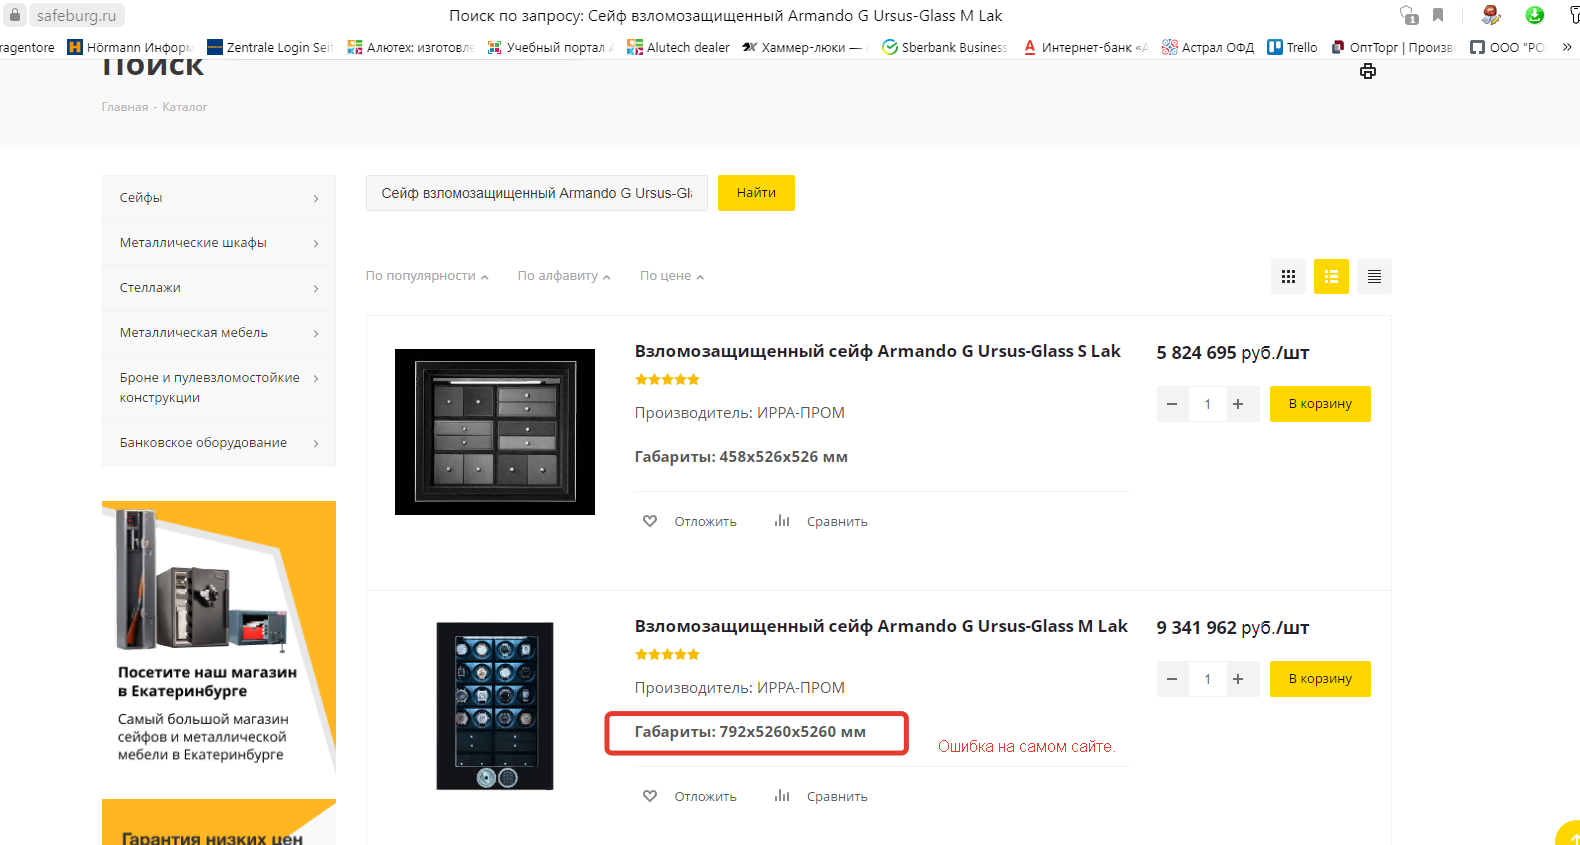

In [ ]:
safeburg_df.drop('depth', axis= 1 , inplace= True )

In [ ]:
safeburg_df.sample(10)

In [ ]:
safeburg_df.to_csv('Safeburg.csv', index=False) #записываем в файл

## Парсинг по организации 43

[Официальный сайт организации 43](https://tdmk43.ru/)

Интересующие категории:

* Сейфы
* Стеллажи
* Металлическая мебель
* Производственная мебель

Данные для сбора:
* Название
* Подкатегория
* Габаритные размеры
* Описание
* Продажная цена

### [Сейфы](https://tdmk43.ru/shop/safes/ "Ссылка на категорию")

In [ ]:
# Категории сейфов <title><link>
url = 'https://tdmk43.ru/shop/safes/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  title = el.find('div', class_='l4ba').text
  link = el.find('a', class_='m3i6').get('href')
  print(title)
  print(link)

Мебельные сейфы
https://tdmk43.ru/shop/safes/furniture-office-safes/
Оружейные шкафы и сейфы
https://tdmk43.ru/shop/safes/weapon-safes/
Взломостойкие сейфы
https://tdmk43.ru/shop/safes/burglar-proof/
Огнестойкие сейфы
https://tdmk43.ru/shop/safes/fire-resistant-safes/
Огневзломостойкие сейфы
https://tdmk43.ru/shop/safes/burglar-proof-fire-resistant/
Эксклюзивные сейфы
https://tdmk43.ru/shop/safes/exclusive-safes/
Гостиничные сейфы
https://tdmk43.ru/shop/safes/hotel-safe-safes/
Встраиваемые сейфы
https://tdmk43.ru/shop/safes/built-in-safes/
Депозитные сейфы
https://tdmk43.ru/shop/safes/deposit-boxes/
Smart-сейфы
https://tdmk43.ru/shop/safes/smart-safes/
Депозитные ячейки
https://tdmk43.ru/shop/safes/deposit-cell/
Темпокассы
https://tdmk43.ru/shop/safes/cash-drawer-safe/
Аксессуары для сейфов
https://tdmk43.ru/shop/safes/accessories-for-safes/


In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://tdmk43.ru/shop/safes/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/safes/furniture-office-safes/',
 'https://tdmk43.ru/shop/safes/weapon-safes/',
 'https://tdmk43.ru/shop/safes/burglar-proof/',
 'https://tdmk43.ru/shop/safes/fire-resistant-safes/',
 'https://tdmk43.ru/shop/safes/burglar-proof-fire-resistant/',
 'https://tdmk43.ru/shop/safes/exclusive-safes/',
 'https://tdmk43.ru/shop/safes/hotel-safe-safes/',
 'https://tdmk43.ru/shop/safes/built-in-safes/',
 'https://tdmk43.ru/shop/safes/deposit-boxes/',
 'https://tdmk43.ru/shop/safes/smart-safes/',
 'https://tdmk43.ru/shop/safes/deposit-cell/',
 'https://tdmk43.ru/shop/safes/cash-drawer-safe/',
 'https://tdmk43.ru/shop/safes/accessories-for-safes/']

In [ ]:
#добавляем подкатегории взломостойких сейфов
url = 'https://tdmk43.ru/shop/safes/burglar-proof/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/safes/furniture-office-safes/',
 'https://tdmk43.ru/shop/safes/weapon-safes/',
 'https://tdmk43.ru/shop/safes/burglar-proof/',
 'https://tdmk43.ru/shop/safes/fire-resistant-safes/',
 'https://tdmk43.ru/shop/safes/burglar-proof-fire-resistant/',
 'https://tdmk43.ru/shop/safes/exclusive-safes/',
 'https://tdmk43.ru/shop/safes/hotel-safe-safes/',
 'https://tdmk43.ru/shop/safes/built-in-safes/',
 'https://tdmk43.ru/shop/safes/deposit-boxes/',
 'https://tdmk43.ru/shop/safes/smart-safes/',
 'https://tdmk43.ru/shop/safes/deposit-cell/',
 'https://tdmk43.ru/shop/safes/cash-drawer-safe/',
 'https://tdmk43.ru/shop/safes/accessories-for-safes/',
 'https://tdmk43.ru/shop/safes/burglar-proof/burglar-proof-safes-1-class/',
 'https://tdmk43.ru/shop/safes/burglar-proof/burglar-proof-safes-2-class/',
 'https://tdmk43.ru/shop/safes/burglar-proof/burglar-proof-safes-3-class/',
 'https://tdmk43.ru/shop/safes/burglar-proof/burglar-proof-safes-4-class/',
 'https://tdmk43.ru/shop/saf

In [ ]:
# Категория сейфы
def get_tdmk43_category():
  tdmk43_df = pd.DataFrame()
  for podcat in podcat_list:
    url = podcat
    req = requests.get(url).text
    soup = BeautifulSoup(req)

    category = soup.find_all('figcaption', class_='exx5')

    for el in category:
      title = el.find('div', class_='f4tx').text
      description = el.find_all('div', class_='ksc7')
      for ell in description:
        size = ell.find_all('div', class_='mgcm')[0].text
        weight = ell.find_all('div', class_='mgcm')[1].text
      price = el.find('span', class_='vaiq')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='vaiq').text
      row = {'title': title, 'size': size, 'weight': weight, 'price': price}
      tdmk43_df = pd.concat([tdmk43_df, pd.DataFrame([row])])
  return tdmk43_df.reset_index(drop=True)

res_full = get_tdmk43_category() #записываем сейфы в переменную

In [ ]:
res_full.head()

,title,size,weight,price
0,\nСейф мебельный SFT-36ER\n,380x350x360,\n17,6 560
1,\nСейф мебельный SFT-56ER\n,520x350x360,\n22,7 500
2,\nСейф мебельный Д-14м\n,145x200x150,\n3,1 960
3,\nСейф мебельный Д-18м\n,180x270x240,\n5,3 610
4,\nСейф мебельный Д-18ме\n,180x270x240,\n5,5 560


In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   492 non-null    object
 1   size    492 non-null    object
 2   weight  492 non-null    object
 3   price   492 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB


In [ ]:
res_full.to_csv('tdmk43-seify-2023-03-22.csv', index=False) #записываем в файл

### [Стеллажи](https://tdmk43.ru/shop/shelving/ "Ссылка на категорию")

In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://tdmk43.ru/shop/shelving/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/shelving/archived/',
 'https://tdmk43.ru/shop/shelving/sargo/']

In [ ]:
#добавляем подкатегории архивных стеллажей
url = 'https://tdmk43.ru/shop/shelving/archived/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/shelving/archived/',
 'https://tdmk43.ru/shop/shelving/sargo/',
 'https://tdmk43.ru/shop/shelving/archived/shelving-set/',
 'https://tdmk43.ru/shop/shelving/archived/shelving-elements/']

In [ ]:
# Категория стеллажи
def get_tdmk43_category():
  tdmk43_df = pd.DataFrame()
  for podcat in podcat_list:
    url = podcat
    req = requests.get(url).text
    soup = BeautifulSoup(req)

    category = soup.find_all('figcaption', class_='exx5')

    for el in category:
      title = el.find('div', class_='f4tx').text
      description = el.find_all('div', class_='ksc7')
      for ell in description:
        size = ell.find_all('div', class_='mgcm')[0].text
        weight = ell.find_all('div', class_='mgcm')[1].text
      price = el.find('span', class_='vaiq')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='vaiq').text
      row = {'title': title, 'size': size, 'weight': weight, 'price': price}
      tdmk43_df = pd.concat([tdmk43_df, pd.DataFrame([row])])
  return tdmk43_df.reset_index(drop=True)

res_full = get_tdmk43_category() #записываем сейфы в переменную

In [ ]:
res_full.head()

,title,size,weight,price
0,"\nГрузовой стеллаж 2000х1610х600, 3 полки без ...",2000x1610x600,\n3,9 178
1,"\nГрузовой стеллаж 2000х1610х600, 3 полки с ок...",2000x1610x600,\n3,15 208
2,"\nГрузовой стеллаж 2000х1610х600, 3 полки с оц...",2000x1610x600,\n3,15 370
3,\nСтеллаж ES 150KD/75Х30/4\n,1450x750x300,\n4,2 070
4,\nСтеллаж ES 75KD/75×30/3 оцинкованный\n,750x750x300,\n3,1 233


In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   185 non-null    object
 1   size    185 non-null    object
 2   weight  185 non-null    object
 3   price   185 non-null    object
dtypes: object(4)
memory usage: 5.9+ KB


In [ ]:
res_full.to_csv('tdmk43-stellazhi-2023-03-22.csv', index=False) #записываем в файл

### [Металлическая мебель](https://tdmk43.ru/shop/metal-cabinets/ "Ссылка на категорию")

In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://tdmk43.ru/shop/metal-cabinets/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/metal-cabinets/wardrobe/',
 'https://tdmk43.ru/shop/metal-cabinets/archive-cabinets/',
 'https://tdmk43.ru/shop/metal-cabinets/accounting/',
 'https://tdmk43.ru/shop/metal-cabinets/drying/',
 'https://tdmk43.ru/shop/metal-cabinets/housekeeping/',
 'https://tdmk43.ru/shop/metal-cabinets/personal-items/',
 'https://tdmk43.ru/shop/metal-cabinets/individual-cashier-cabinets/',
 'https://tdmk43.ru/shop/metal-cabinets/sard-index/',
 'https://tdmk43.ru/shop/metal-cabinets/sabinets-bags/',
 'https://tdmk43.ru/shop/metal-cabinets/fire-cabinets/']

In [ ]:
# Категория мет шкафы
def get_tdmk43_category():
  tdmk43_df = pd.DataFrame()
  for podcat in podcat_list:
    url = podcat
    req = requests.get(url).text
    soup = BeautifulSoup(req)

    category = soup.find_all('figcaption', class_='exx5')

    for el in category:
      title = el.find('div', class_='f4tx').text
      description = el.find_all('div', class_='ksc7')
      for ell in description:
        size = ell.find_all('div', class_='mgcm')[0].text
        weight = ell.find_all('div', class_='mgcm')[1].text
      price = el.find('span', class_='vaiq')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='vaiq').text
      row = {'title': title, 'size': size, 'weight': weight, 'price': price}
      tdmk43_df = pd.concat([tdmk43_df, pd.DataFrame([row])])
  return tdmk43_df.reset_index(drop=True)

res_full = get_tdmk43_category() #записываем сейфы в переменную

In [ ]:
res_full.head()

,title,size,weight,price
0,\nШкаф для раздевалок ПРАКТИК усиленный ML 21-...,1830x600x500,\n32,8 492
1,\nШкаф для раздевалок ПРАКТИК усиленный ML 21-...,1830x800x500,\n37,11 277
2,\nШкаф для раздевалок Стандарт LS-21-60\n,1860x600x500,\n30,8 492
3,\nШкаф для раздевалок ШР-22 L500\n,1850x500x500,\n30,7 560
4,\nШкаф для раздевалок ШР-22 L600\n,1850x600x500,\n32,8 350


In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   216 non-null    object
 1   size    216 non-null    object
 2   weight  216 non-null    object
 3   price   216 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


In [ ]:
res_full.to_csv('tdmk43-met_mebel-2023-03-22.csv', index=False) #записываем в файл

### [Производственная мебель](https://tdmk43.ru/shop/manufacturing-furniture/ "Ссылка на категорию")

In [ ]:
# подкатегории с подссылками в список
podcat_list = []

url = 'https://tdmk43.ru/shop/manufacturing-furniture/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/manufacturing-furniture/cabinets-cylinders/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/',
 'https://tdmk43.ru/shop/manufacturing-furniture/tool-cabinets/',
 'https://tdmk43.ru/shop/manufacturing-furniture/tool-trolleys/',
 'https://tdmk43.ru/shop/manufacturing-furniture/storage-systems/']

In [ ]:
#добавляем подкатегории мет верстаков
url = 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/'
req = requests.get(url).text
soup = BeautifulSoup(req)

cat = soup.find_all('li', class_='psan')

for el in cat:
  link = el.find('a', class_='m3i6').get('href')
  podcat_list.append(link)

podcat_list

['https://tdmk43.ru/shop/manufacturing-furniture/cabinets-cylinders/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/',
 'https://tdmk43.ru/shop/manufacturing-furniture/tool-cabinets/',
 'https://tdmk43.ru/shop/manufacturing-furniture/tool-trolleys/',
 'https://tdmk43.ru/shop/manufacturing-furniture/storage-systems/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/vp-series/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/profi-series/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/toolbox-series/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/master-series/',
 'https://tdmk43.ru/shop/manufacturing-furniture/workbenches/work-series/']

In [ ]:
# Категория произв меб
def get_tdmk43_category():
  tdmk43_df = pd.DataFrame()
  for podcat in podcat_list:
    url = podcat
    req = requests.get(url).text
    soup = BeautifulSoup(req)

    category = soup.find_all('figcaption', class_='exx5')

    for el in category:
      title = el.find('div', class_='f4tx').text
      description = el.find_all('div', class_='ksc7')
      for ell in description:
        size = re.findall(r'[0-9]*x[0-9]*x[0-9]*', str(ell))
      price = el.find('span', class_='vaiq')
      if (price is None): #добавляем условие, тк не везде есть цена и падает с ошибкой
        price = 'По запросу'
      else:
        price = el.find('span', class_='vaiq').text
      row = {'title': title, 'size': size, 'price': price}
      tdmk43_df = pd.concat([tdmk43_df, pd.DataFrame([row])])
  return tdmk43_df.reset_index(drop=True)

res_full = get_tdmk43_category() #записываем сейфы в переменную

In [ ]:
res_full.head()

,title,size,price
0,\nШкаф для газового баллона ШГР 27-1\n,[700x400x385],3 420
1,\nШкаф для газового баллона ШГР 27-2\n,[700x740x385],4 070
2,\nШкаф для газового баллона ШГР 40-1\n,[1631x400x385],5 460
3,\nШкаф для газового баллона ШГР 40-2\n,[1631x600x385],7 030
4,\nШкаф для газового баллона ШГР 50-1\n,[1100x400x385],4 170


In [ ]:
res_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   215 non-null    object
 1   size    215 non-null    object
 2   price   215 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [ ]:
res_full.to_csv('tdmk43-verstaki-2023-03-22.csv', index=False) #записываем в файл

## Обработка данных по организации 43

### Сейфы

In [ ]:
df_tdmk43_seif = pd.read_csv('tdmk43-seify-2023-03-22.csv')
df_tdmk43_seif.head()

,title,size,weight,price
0,\nСейф мебельный SFT-36ER\n,380x350x360,\n17,6 560
1,\nСейф мебельный SFT-56ER\n,520x350x360,\n22,7 500
2,\nСейф мебельный Д-14м\n,145x200x150,\n3,1 960
3,\nСейф мебельный Д-18м\n,180x270x240,\n5,3 610
4,\nСейф мебельный Д-18ме\n,180x270x240,\n5,5 560


In [ ]:
#add category 'seify'
df_tdmk43_seif['category'] = 'Сейфы'

In [ ]:
#add shop 
df_tdmk43_seif['shop'] = 'МетКон'

In [ ]:
df_tdmk43_seif['price'][490]

'275 405'

In [ ]:
#Ver.2
#убираем пробелы и лишние символы из цены, а потом переводим в float

def price_to_float(param):
    if(pd.isna(param)): #т.к некоторые значения вовсе отсутствуют и без этого условия вылазит ошибка
        param = param
    else:
        param = param.replace(' ', '')
        if param in ['Позапросу', 'Ценапозапросу']:
            param = np.nan
        else:
            param = float(param)
    return param

In [ ]:
df_tdmk43_seif['price'] = df_tdmk43_seif['price'].apply(price_to_float)
df_tdmk43_seif.head(15)

,title,size,weight,price,category,shop
0,\nСейф мебельный SFT-36ER\n,380x350x360,\n17,6560.0,Сейфы,МетКон
1,\nСейф мебельный SFT-56ER\n,520x350x360,\n22,7500.0,Сейфы,МетКон
2,\nСейф мебельный Д-14м\n,145x200x150,\n3,1960.0,Сейфы,МетКон
3,\nСейф мебельный Д-18м\n,180x270x240,\n5,3610.0,Сейфы,МетКон
4,\nСейф мебельный Д-18ме\n,180x270x240,\n5,5560.0,Сейфы,МетКон
5,\nСейф мебельный Д-21ме\n,210x250x200,\n6,6260.0,Сейфы,МетКон
6,\nСейф мебельный Д-24м\n,240x310x260,\n7,4460.0,Сейфы,МетКон
7,\nСейф мебельный Д-24ме\n,240x310x260,\n7,6300.0,Сейфы,МетКон
8,\nСейф мебельный Д-29м\n,290x350x300,\n9,5570.0,Сейфы,МетКон
9,\nСейф мебельный Д-29ме\n,290x350x300,\n9,7580.0,Сейфы,МетКон


In [ ]:
df_tdmk43_seif['title'][23]

'\nСейф T-230 KL\n'

In [ ]:
#Корректируем title 
def title_new(param):
    param = param.replace('\n', '')
    return param

In [ ]:
df_tdmk43_seif['title'] = df_tdmk43_seif['title'].apply(title_new)
df_tdmk43_seif.head()

,title,size,weight,price,category,shop
0,Сейф мебельный SFT-36ER,380x350x360,\n17,6560.0,Сейфы,МетКон
1,Сейф мебельный SFT-56ER,520x350x360,\n22,7500.0,Сейфы,МетКон
2,Сейф мебельный Д-14м,145x200x150,\n3,1960.0,Сейфы,МетКон
3,Сейф мебельный Д-18м,180x270x240,\n5,3610.0,Сейфы,МетКон
4,Сейф мебельный Д-18ме,180x270x240,\n5,5560.0,Сейфы,МетКон


In [ ]:
df_tdmk43_seif['size'][0]

'380x350x360'

In [ ]:
#смотрим тип данных колонки size
type(df_tdmk43_seif['size'][0])

str

In [ ]:
#height
def height(param):
    h_w_d = re.split('х|x', param) # русская "х" или икс
    if len(h_w_d) < 2:
        height = np.nan
    else:
        height = h_w_d[0]
        height = height.replace("['", "")
    return height

In [ ]:
df_tdmk43_seif['height'] = df_tdmk43_seif['size'].apply(height)
df_tdmk43_seif.head()

,title,size,weight,price,category,shop,height
0,Сейф мебельный SFT-36ER,380x350x360,\n17,6560.0,Сейфы,МетКон,380
1,Сейф мебельный SFT-56ER,520x350x360,\n22,7500.0,Сейфы,МетКон,520
2,Сейф мебельный Д-14м,145x200x150,\n3,1960.0,Сейфы,МетКон,145
3,Сейф мебельный Д-18м,180x270x240,\n5,3610.0,Сейфы,МетКон,180
4,Сейф мебельный Д-18ме,180x270x240,\n5,5560.0,Сейфы,МетКон,180


In [ ]:
#width
def width(param):
    h_w_d = re.split('х|x', param) # русская "х" или икс
    if len(h_w_d) < 2:
        width = np.nan
    else:
        width = h_w_d[1]
    return width

In [ ]:
df_tdmk43_seif['width'] = df_tdmk43_seif['size'].apply(width)
df_tdmk43_seif.head()

,title,size,weight,price,category,shop,height,width
0,Сейф мебельный SFT-36ER,380x350x360,\n17,6560.0,Сейфы,МетКон,380,350
1,Сейф мебельный SFT-56ER,520x350x360,\n22,7500.0,Сейфы,МетКон,520,350
2,Сейф мебельный Д-14м,145x200x150,\n3,1960.0,Сейфы,МетКон,145,200
3,Сейф мебельный Д-18м,180x270x240,\n5,3610.0,Сейфы,МетКон,180,270
4,Сейф мебельный Д-18ме,180x270x240,\n5,5560.0,Сейфы,МетКон,180,270


In [ ]:
#depth
def depth(param):
    h_w_d = re.split('х|x', param) # русская "х" или икс
    if len(h_w_d) < 2:
        depth = np.nan
    else:
        depth = h_w_d[2]
        depth = depth.replace("']", "")
    return depth

In [ ]:
df_tdmk43_seif['depth'] = df_tdmk43_seif['size'].apply(depth)
df_tdmk43_seif.head()

,title,size,weight,price,category,shop,height,width,depth
0,Сейф мебельный SFT-36ER,380x350x360,\n17,6560.0,Сейфы,МетКон,380,350,360
1,Сейф мебельный SFT-56ER,520x350x360,\n22,7500.0,Сейфы,МетКон,520,350,360
2,Сейф мебельный Д-14м,145x200x150,\n3,1960.0,Сейфы,МетКон,145,200,150
3,Сейф мебельный Д-18м,180x270x240,\n5,3610.0,Сейфы,МетКон,180,270,240
4,Сейф мебельный Д-18ме,180x270x240,\n5,5560.0,Сейфы,МетКон,180,270,240


In [ ]:
#удаляем ненужные колонки
df_tdmk43_seif = df_tdmk43_seif.drop(['size'], axis=1)
df_tdmk43_seif

,title,weight,price,category,shop,height,width,depth
0,Сейф мебельный SFT-36ER,\n17,6560.0,Сейфы,МетКон,380,350,360
1,Сейф мебельный SFT-56ER,\n22,7500.0,Сейфы,МетКон,520,350,360
2,Сейф мебельный Д-14м,\n3,1960.0,Сейфы,МетКон,145,200,150
3,Сейф мебельный Д-18м,\n5,3610.0,Сейфы,МетКон,180,270,240
4,Сейф мебельный Д-18ме,\n5,5560.0,Сейфы,МетКон,180,270,240
...,...,...,...,...,...,...,...,...
487,Сейф Алмаз 1685 KL,\n595,416005.0,Сейфы,МетКон,1660,850,510
488,Сейф Алмаз 67 EL,\n215,220305.0,Сейфы,МетКон,670,510,510
489,Сейф Алмаз 67 KL,\n215,220305.0,Сейфы,МетКон,670,510,510
490,Сейф Алмаз 99 EL,\n290,275405.0,Сейфы,МетКон,990,510,510


In [ ]:
df_tdmk43_seif['weight'].unique()

array(['\n17', '\n22', '\n3', '\n5', '\n6', '\n7', '\n9', '\n10', '\n13',
       '\n48', '\n55', '\n65', '\n7.3', '\n8.3', '\n4', '\n180', '\n5.5',
       '\n8', '\n19', '\n52', '\n50', '\n51', '\n10.1', '\n9.7', '\n15.6',
       '\n15', '\n21', '\n29', '\n29.8', '\n43', '\n39,5', '\n16.8',
       '\n20.4', '\n28', '\n35', '\n93', '\n96', '\n157', '\n12.5',
       '\n27', '\n38', '\n49', '\n228', '\n86', '\n140', '\n223', '\n46',
       '\n60', '\n6.6', '\n8.4', '\n1', '\n2', '\n37', '\n79', '\n109',
       '\n145', '\n291', '\n310', '\n370', '\n130', '\n235', '\n154',
       '\n190', '\n53', '\n72', '\n68', '\n99', '\n138', '\n350', '\n390',
       '\n490', '\n101', '\n131', '\n191', '\n480', '\n71', '\n122',
       '\n81', '\n116', '\n129', '\n161', '\n290', '\n88', '\n61', '\n39',
       '\n75', '\n70', '\n40', '\n98', '\n103', '\n126', '\n132', '\n73',
       '\n78', '\n84', '\n94', '\n18', '\n34', '\n0.2', '\n2155 RU\n',
       '\n2157 RU\n', '\n2159 RU\n', '\n2153 RU\n', '\n0.1',

In [ ]:
#Ver.2
#correct weight to float
def weight_to_float(param):
    if re.match(r'\n[0-9]* RU|\nДа|\nНет', param):
        weight = np.nan
    else:
        weight = param.replace('\n', '').replace(',', '.')
        if weight != '':
            weight = float(weight)
        else:
            weight = np.nan
    return weight

In [ ]:
df_tdmk43_seif['weight'] = df_tdmk43_seif['weight'].apply(weight_to_float)
df_tdmk43_seif.head()

,title,weight,price,category,shop,height,width,depth
0,Сейф мебельный SFT-36ER,17.0,6560.0,Сейфы,МетКон,380,350,360
1,Сейф мебельный SFT-56ER,22.0,7500.0,Сейфы,МетКон,520,350,360
2,Сейф мебельный Д-14м,3.0,1960.0,Сейфы,МетКон,145,200,150
3,Сейф мебельный Д-18м,5.0,3610.0,Сейфы,МетКон,180,270,240
4,Сейф мебельный Д-18ме,5.0,5560.0,Сейфы,МетКон,180,270,240


In [ ]:
#перевести height, width, depth to float
df_tdmk43_seif['height'] = df_tdmk43_seif['height'].astype(float)
df_tdmk43_seif['width'] = df_tdmk43_seif['width'].astype(float)
df_tdmk43_seif['depth'] = df_tdmk43_seif['depth'].astype(float)

In [ ]:
#проверяем
df_tdmk43_seif.tail(100)

,title,weight,price,category,shop,height,width,depth
392,Сейф Гарант Евро-120T.EL,350.0,155800.0,Сейфы,МетКон,1200.0,700.0,580.0
393,Сейф Гарант Евро-133Т,390.0,175750.0,Сейфы,МетКон,1335.0,700.0,580.0
394,Сейф Гарант Евро-133Т.EL,390.0,180500.0,Сейфы,МетКон,1335.0,700.0,580.0
395,Сейф Гарант Евро-165Т,490.0,204250.0,Сейфы,МетКон,1652.0,700.0,580.0
396,Сейф Гарант Евро-165Т.EL,490.0,209000.0,Сейфы,МетКон,1652.0,700.0,580.0
...,...,...,...,...,...,...,...,...
487,Сейф Алмаз 1685 KL,595.0,416005.0,Сейфы,МетКон,1660.0,850.0,510.0
488,Сейф Алмаз 67 EL,215.0,220305.0,Сейфы,МетКон,670.0,510.0,510.0
489,Сейф Алмаз 67 KL,215.0,220305.0,Сейфы,МетКон,670.0,510.0,510.0
490,Сейф Алмаз 99 EL,290.0,275405.0,Сейфы,МетКон,990.0,510.0,510.0


In [ ]:
df_tdmk43_seif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     492 non-null    object 
 1   weight    468 non-null    float64
 2   price     492 non-null    float64
 3   category  492 non-null    object 
 4   shop      492 non-null    object 
 5   height    492 non-null    float64
 6   width     492 non-null    float64
 7   depth     492 non-null    float64
dtypes: float64(5), object(3)
memory usage: 30.9+ KB


### Стеллажи

In [ ]:
df_tdmk43_st = pd.read_csv('tdmk43-stellazhi-2023-03-22.csv')
df_tdmk43_st.head()

,title,size,weight,price
0,"\nГрузовой стеллаж 2000х1610х600, 3 полки без ...",2000x1610x600,\n3,9 178
1,"\nГрузовой стеллаж 2000х1610х600, 3 полки с ок...",2000x1610x600,\n3,15 208
2,"\nГрузовой стеллаж 2000х1610х600, 3 полки с оц...",2000x1610x600,\n3,15 370
3,\nСтеллаж ES 150KD/75Х30/4\n,1450x750x300,\n4,2 070
4,\nСтеллаж ES 75KD/75×30/3 оцинкованный\n,750x750x300,\n3,1 233


In [ ]:
#add category 
df_tdmk43_st['category'] = 'Стеллажи'

In [ ]:
#add shop 
df_tdmk43_st['shop'] = 'МетКон'

In [ ]:
#price to float
df_tdmk43_st['price'] = df_tdmk43_st['price'].apply(price_to_float)

In [ ]:
#correct title
df_tdmk43_st['title'] = df_tdmk43_st['title'].apply(title_new)

In [ ]:
#height
df_tdmk43_st['height'] = df_tdmk43_st['size'].apply(height)

In [ ]:
#width
df_tdmk43_st['width'] = df_tdmk43_st['size'].apply(width)

In [ ]:
#depth
df_tdmk43_st['depth'] = df_tdmk43_st['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_tdmk43_st = df_tdmk43_st.drop(['size'], axis=1)

In [ ]:
#weight to float
df_tdmk43_st['weight'] = df_tdmk43_st['weight'].apply(weight_to_float)

In [ ]:
#перевести height, width, depth to float
df_tdmk43_st['height'] = df_tdmk43_st['height'].astype(float)
df_tdmk43_st['width'] = df_tdmk43_st['width'].astype(float)
df_tdmk43_st['depth'] = df_tdmk43_st['depth'].astype(float)

In [ ]:
#проверяем
df_tdmk43_st.tail(100)

,title,weight,price,category,shop,height,width,depth
85,Стойка стеллажная профилированная СТ-СПЭ1.2 (25),0.8,256.0,Стеллажи,МетКон,1200.0,40.0,40.0
86,Стойка стеллажная профилированная СТ-СПЭ1.5 (25),1.1,308.0,Стеллажи,МетКон,1500.0,40.0,40.0
87,Стойка стеллажная профилированная СТ-СПЭ1.8 (25),1.4,347.0,Стеллажи,МетКон,1800.0,40.0,40.0
88,Стойка стеллажная профилированная СТ-СПЭ2.0 (25),1.5,393.0,Стеллажи,МетКон,2000.0,40.0,40.0
89,Стойка стеллажная профилированная СТ-СПЭ2.2 (25),1.6,412.0,Стеллажи,МетКон,2200.0,40.0,40.0
...,...,...,...,...,...,...,...,...
180,Уголок усиливающий СТ-12 (комплект),NaN,260.0,Стеллажи,МетКон,NaN,NaN,NaN
181,Уголок усиливающий СТ-15 (комплект),NaN,325.0,Стеллажи,МетКон,NaN,NaN,NaN
182,Комплект крепежа (1 болт М6*12 + 1 гайка М6),NaN,7.0,Стеллажи,МетКон,NaN,NaN,NaN
183,Подпятник пластмассовый,NaN,15.0,Стеллажи,МетКон,NaN,NaN,NaN


In [ ]:
df_tdmk43_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     185 non-null    object 
 1   weight    158 non-null    float64
 2   price     185 non-null    float64
 3   category  185 non-null    object 
 4   shop      185 non-null    object 
 5   height    160 non-null    float64
 6   width     160 non-null    float64
 7   depth     160 non-null    float64
dtypes: float64(5), object(3)
memory usage: 11.7+ KB


### Металлическая мебель

In [ ]:
df_tdmk43_met_meb = pd.read_csv('tdmk43-met_mebel-2023-03-22.csv')
df_tdmk43_met_meb.head()

,title,size,weight,price
0,\nШкаф для раздевалок ПРАКТИК усиленный ML 21-...,1830x600x500,\n32,8 492
1,\nШкаф для раздевалок ПРАКТИК усиленный ML 21-...,1830x800x500,\n37,11 277
2,\nШкаф для раздевалок Стандарт LS-21-60\n,1860x600x500,\n30,8 492
3,\nШкаф для раздевалок ШР-22 L500\n,1850x500x500,\n30,7 560
4,\nШкаф для раздевалок ШР-22 L600\n,1850x600x500,\n32,8 350


In [ ]:
#add category 
df_tdmk43_met_meb['category'] = 'Металлическая мебель'

In [ ]:
#add shop 
df_tdmk43_met_meb['shop'] = 'МетКон'

In [ ]:
#price to float
df_tdmk43_met_meb['price'] = df_tdmk43_met_meb['price'].apply(price_to_float)

In [ ]:
#correct title
df_tdmk43_met_meb['title'] = df_tdmk43_met_meb['title'].apply(title_new)

In [ ]:
#height
df_tdmk43_met_meb['height'] = df_tdmk43_met_meb['size'].apply(height)

In [ ]:
#width
df_tdmk43_met_meb['width'] = df_tdmk43_met_meb['size'].apply(width)

In [ ]:
#depth
df_tdmk43_met_meb['depth'] = df_tdmk43_met_meb['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_tdmk43_met_meb = df_tdmk43_met_meb.drop(['size'], axis=1)

In [ ]:
df_tdmk43_met_meb['weight'].unique()

array(['\n32', '\n37', '\n30', '\n35', '\n26.5', '\n28.5', '\n24', '\n20',
       '\n36', '\n41', '\n34', '\n14', '\n21', '\n17', '\n18', '\n23',
       '\n19', '\n29,5', '\n34,5', '\n22', '\n19.5', '\n3', '\n4', '\n',
       '\n1', '\n2', '\n10', '\n11', '\n26', '\n28', '\n44', '\n38',
       '\n39', '\n77', '\n31', '\n45', '\n85', '\n12', '\n48', '\n55',
       '\n50', '\n40', '\n100', '\n8', '\n79', '\n47.5', '\n53.7', '\n60',
       '\n65', '\n54.2', '\n50.2', '\n64.5', '\n53', '\n123', '\n115.4',
       '\n134.7', '\n135.8', '\n63', '\n49', '\n6190 RU\n', '\n256',
       '\n26,5', '\n1493 RU\n', '\n1495 RU\n', '\n1497 RU\n',
       '\n6355 RU\n', '\n13.5', '\n7', '\n16', '\n6', '\n9', '\n13',
       '\n54', '\n67', '\n61', '\n62', '\n71', '\n75', '\n29', '\n210',
       '\n191', '\n52', '\n1567 RU\n', '\n72', '\n128', '\n129'],
      dtype=object)

In [ ]:
#weight to float
df_tdmk43_met_meb['weight'] = df_tdmk43_met_meb['weight'].apply(weight_to_float)

In [ ]:
#перевести height, width, depth to float
df_tdmk43_met_meb['height'] = df_tdmk43_met_meb['height'].astype(float)
df_tdmk43_met_meb['width'] = df_tdmk43_met_meb['width'].astype(float)
df_tdmk43_met_meb['depth'] = df_tdmk43_met_meb['depth'].astype(float)

In [ ]:
#проверяем
df_tdmk43_met_meb.tail(100)

,title,weight,price,category,shop,height,width,depth
116,Шкаф SL-185/4,37.0,15098.0,Металлическая мебель,МетКон,1800.0,460.0,340.0
117,Шкаф SL-32T,11.0,4532.0,Металлическая мебель,МетКон,320.0,420.0,350.0
118,Шкаф SL-32,10.0,4100.0,Металлическая мебель,МетКон,320.0,420.0,350.0
119,Шкаф SL-65T,17.0,6016.0,Металлическая мебель,МетКон,630.0,460.0,340.0
120,Шкаф SL-65T-EL,17.0,7366.0,Металлическая мебель,МетКон,630.0,460.0,340.0
...,...,...,...,...,...,...,...,...
211,Шкаф для сумок ШР-28 L600,36.0,12160.0,Металлическая мебель,МетКон,1850.0,600.0,500.0
212,Огнестойкий металлический шкаф Valberg BM-1260EL,72.0,65455.0,Металлическая мебель,МетКон,1220.0,600.0,520.0
213,Огнестойкий металлический шкаф Valberg BM-1260KL,72.0,65455.0,Металлическая мебель,МетКон,1220.0,600.0,520.0
214,Огнестойкий металлический шкаф Valberg BM-1993EL,128.0,98705.0,Металлическая мебель,МетКон,1950.0,930.0,520.0


In [ ]:
df_tdmk43_met_meb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     216 non-null    object 
 1   weight    209 non-null    float64
 2   price     215 non-null    float64
 3   category  216 non-null    object 
 4   shop      216 non-null    object 
 5   height    216 non-null    float64
 6   width     216 non-null    float64
 7   depth     216 non-null    float64
dtypes: float64(5), object(3)
memory usage: 13.6+ KB


### Производственная мебель

In [ ]:
df_tdmk43_verstaki = pd.read_csv('tdmk43-verstaki-2023-03-22.csv')
df_tdmk43_verstaki.head()

,title,size,price
0,\nШкаф для газового баллона ШГР 27-1\n,['700x400x385'],3 420
1,\nШкаф для газового баллона ШГР 27-2\n,['700x740x385'],4 070
2,\nШкаф для газового баллона ШГР 40-1\n,['1631x400x385'],5 460
3,\nШкаф для газового баллона ШГР 40-2\n,['1631x600x385'],7 030
4,\nШкаф для газового баллона ШГР 50-1\n,['1100x400x385'],4 170


In [ ]:
#add category 
df_tdmk43_verstaki['category'] = 'Производственная мебель'

In [ ]:
#add shop 
df_tdmk43_verstaki['shop'] = 'МетКон'

In [ ]:
#price to float
df_tdmk43_verstaki['price'] = df_tdmk43_verstaki['price'].apply(price_to_float)

In [ ]:
#correct title
df_tdmk43_verstaki['title'] = df_tdmk43_verstaki['title'].apply(title_new)

In [ ]:
#height
df_tdmk43_verstaki['height'] = df_tdmk43_verstaki['size'].apply(height)

In [ ]:
#width
df_tdmk43_verstaki['width'] = df_tdmk43_verstaki['size'].apply(width)

In [ ]:
#depth
df_tdmk43_verstaki['depth'] = df_tdmk43_verstaki['size'].apply(depth)

In [ ]:
#удаляем ненужные колонки
df_tdmk43_verstaki = df_tdmk43_verstaki.drop(['size'], axis=1)

In [ ]:
#перевести height, width, depth to float
df_tdmk43_verstaki['height'] = df_tdmk43_verstaki['height'].astype(float)
df_tdmk43_verstaki['width'] = df_tdmk43_verstaki['width'].astype(float)
df_tdmk43_verstaki['depth'] = df_tdmk43_verstaki['depth'].astype(float)

In [ ]:
#проверяем
df_tdmk43_verstaki.tail(100)

,title,price,category,shop,height,width,depth
115,Держатель для ключей ВП,130.0,Производственная мебель,МетКон,250.0,80.0,25.0
116,Крючок 5 см для верстака серии ВП (комплект 10...,370.0,Производственная мебель,МетКон,NaN,NaN,NaN
117,Крючок 8 см для верстака серии ВП (комплект 10...,555.0,Производственная мебель,МетКон,NaN,NaN,NaN
118,Тумба Т-1 с дверью и полками,5900.0,Производственная мебель,МетКон,830.0,465.0,630.0
119,Тумба Т-2 с ящиками,10920.0,Производственная мебель,МетКон,830.0,465.0,630.0
...,...,...,...,...,...,...,...
210,Полка экрана 280 для верстака,360.0,Производственная мебель,МетКон,70.0,280.0,155.0
211,Полка экрана 420 для верстака,400.0,Производственная мебель,МетКон,70.0,420.0,155.0
212,Полка экрана 560 для верстака,450.0,Производственная мебель,МетКон,70.0,560.0,155.0
213,Держатель ключей для верстака,260.0,Производственная мебель,МетКон,250.0,82.0,36.0


In [ ]:
df_tdmk43_verstaki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     215 non-null    object 
 1   price     215 non-null    float64
 2   category  215 non-null    object 
 3   shop      215 non-null    object 
 4   height    208 non-null    float64
 5   width     208 non-null    float64
 6   depth     208 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.9+ KB


### Итоговый DF

In [ ]:
tdmk43_df = pd.DataFrame() #создаём пустой df

In [ ]:
tdmk43_df = pd.concat([tdmk43_df, df_tdmk43_seif]) #добавляем сейфы

In [ ]:
tdmk43_df = pd.concat([tdmk43_df, df_tdmk43_st]) #добавляем стеллажи

In [ ]:
tdmk43_df = pd.concat([tdmk43_df, df_tdmk43_met_meb]) #добавляем мет шкафы

In [ ]:
tdmk43_df = pd.concat([tdmk43_df, df_tdmk43_verstaki]) #добавляем мет мебель

In [ ]:
tdmk43_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 214
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     1108 non-null   object 
 1   weight    835 non-null    float64
 2   price     1107 non-null   float64
 3   category  1108 non-null   object 
 4   shop      1108 non-null   object 
 5   height    1076 non-null   float64
 6   width     1076 non-null   float64
 7   depth     1076 non-null   float64
dtypes: float64(5), object(3)
memory usage: 77.9+ KB


In [ ]:
tdmk43_df.head()

,title,weight,price,category,shop,height,width,depth
0,Сейф мебельный SFT-36ER,17.0,6560.0,Сейфы,МетКон,380.0,350.0,360.0
1,Сейф мебельный SFT-56ER,22.0,7500.0,Сейфы,МетКон,520.0,350.0,360.0
2,Сейф мебельный Д-14м,3.0,1960.0,Сейфы,МетКон,145.0,200.0,150.0
3,Сейф мебельный Д-18м,5.0,3610.0,Сейфы,МетКон,180.0,270.0,240.0
4,Сейф мебельный Д-18ме,5.0,5560.0,Сейфы,МетКон,180.0,270.0,240.0


In [ ]:
tdmk43_df.to_csv('tdmk43.csv', index=False) #записываем в файл

## Обезличивание данных

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/DAU-33/Diploma/Safes/0/zheleznaya_mebel.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/DAU-33/Diploma/Safes/0/safe_izh.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/DAU-33/Diploma/Safes/0/safes18.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/DAU-33/Diploma/Safes/0/sekretservis.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/DAU-33/Diploma/Safes/0/Safeburg.csv')
df_43 = pd.read_csv('/content/drive/MyDrive/DAU-33/Diploma/Safes/0/tdmk43.csv')

In [ ]:
df_1['shop'] = 1 #перезаписываем название организации на номер
df_2['shop'] = 2
df_3['shop'] = 3
df_4['shop'] = 4
df_5['shop'] = 5
df_43['shop'] = 43

In [ ]:
df_1.to_csv('1.csv', index=False) #записываем в файл
df_2.to_csv('2.csv', index=False)
df_3.to_csv('3.csv', index=False)
df_4.to_csv('4.csv', index=False)
df_5.to_csv('5.csv', index=False)
df_43.to_csv('43.csv', index=False)

## Поиск совпадений 

### Функции

In [ ]:
def dict_values_abc(param):
  #принимает колонку ДФ, разбивает всё на слова по пробелу сортирует по алфавиту
  #и оставляет только те, где кол-во больше 10

  title_n = param.to_list()

  split = [] #create empty list

  for el in title_n:
    title_splitted = el.split() # split title
    for split_el in title_splitted:
      split.append(split_el) #add word in list

  split_count = {item: split.count(item) for item in split} #create dict{word : count}

  sorted_keys = sorted(split_count.keys(), reverse=True) # Sort the keys

  sorted_dict = {} #sort dict{word : count}

  for i in sorted_keys:
      for k in split_count.keys():
          if k == i and split_count[k] > 10:
              sorted_dict[k] = split_count[k]

  return sorted_dict

In [ ]:
def reduced_title(param):
  #создаёт колонку с кратким названием, удаляя лишние слова
  for i in junk:
    param = param.replace(i, '')

  return param

### Сейфы

In [ ]:
df_1_saf = df_1[df_1['category'] == 'Сейфы'] #only safes from shop 1
df_2_saf = df_2[df_2['category'] == 'Сейфы'] #only safes from shop 2
df_3_saf = df_3[df_3['category'] == 'Сейфы'] #only safes from shop 3
df_4_saf = df_4[df_4['category'] == 'Сейфы'] #only safes from shop 4
df_5_saf = df_5[df_5['category'] == 'Сейфы'] #only safes from shop 5
df_43_saf = df_43[df_43['category'] == 'Сейфы'] #only safes from shop 43

In [ ]:
df_1_saf.info() 
df_2_saf.info()
df_3_saf.info() 
df_4_saf.info()
df_5_saf.info() 
df_43_saf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1302 non-null   object 
 1   availability  1302 non-null   int64  
 2   price         1191 non-null   float64
 3   category      1302 non-null   object 
 4   shop          1302 non-null   int64  
 5   height        1300 non-null   float64
 6   width         1300 non-null   float64
 7   depth         1300 non-null   float64
 8   weight        1267 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 101.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 483
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     484 non-null    object 
 1   price     483 non-null    float64
 2   category  484 non-null    object 
 3   shop      484 non-null    int64  
 4   height    483 

In [ ]:
#title to upper
df_1_saf['title'] = df_1_saf['title'].str.upper() 
df_2_saf['title'] = df_2_saf['title'].str.upper()
df_3_saf['title'] = df_3_saf['title'].str.upper()
df_4_saf['title'] = df_4_saf['title'].str.upper()
df_5_saf['title'] = df_5_saf['title'].str.upper()
df_43_saf['title'] = df_43_saf['title'].str.upper()

<ipython-input-4-bab07bad104d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_saf['title'] = df_1_saf['title'].str.upper()
<ipython-input-4-bab07bad104d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_saf['title'] = df_2_saf['title'].str.upper()
<ipython-input-4-bab07bad104d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
df_43_saf.head()

,title,weight,price,category,shop,height,width,depth
0,СЕЙФ МЕБЕЛЬНЫЙ SFT-36ER,17.0,6560.0,Сейфы,43,380.0,350.0,360.0
1,СЕЙФ МЕБЕЛЬНЫЙ SFT-56ER,22.0,7500.0,Сейфы,43,520.0,350.0,360.0
2,СЕЙФ МЕБЕЛЬНЫЙ Д-14М,3.0,1960.0,Сейфы,43,145.0,200.0,150.0
3,СЕЙФ МЕБЕЛЬНЫЙ Д-18М,5.0,3610.0,Сейфы,43,180.0,270.0,240.0
4,СЕЙФ МЕБЕЛЬНЫЙ Д-18МЕ,5.0,5560.0,Сейфы,43,180.0,270.0,240.0


In [ ]:
dict_values_abc(df_1_saf['title']) #разбиваем на слова и выводим частотность

{'ЯЩИК': 14,
 'ЯЧЕЕК': 31,
 'ШКАФ': 215,
 'ЧИРОК': 18,
 'ФОРТ': 15,
 'Т': 18,
 'СЕЙФ': 1025,
 'РУБЕЖ': 14,
 'ОФИСНЫЙ': 47,
 'ОРУЖЕЙНЫЙ': 336,
 'МЕБЕЛЬНЫЙ': 48,
 'КВАРЦИТ': 19,
 'КАРАТ': 25,
 'ЕВРО': 15,
 'ДЕПОЗИТНЫХ': 31,
 'ДЕНЕЖНЫЙ': 13,
 'Д': 12,
 'ГРАНИТ': 22,
 'ГАРАНТ': 26,
 'ВСТРАИВАЕМЫЙ': 14,
 'ВЗЛОМОСТОЙКИЙ': 31,
 'БУХГАЛТЕРСКИЙ': 50,
 'БЛОК': 31,
 'БЕРКУТ': 23,
 'АРСЕНАЛ': 23,
 'АРМЕЙСКИЙ': 13,
 'АВАНТАЖ': 12,
 'VALBERG': 312,
 'T': 11,
 'STALKER': 20,
 'RHINO': 11,
 'PRIMARY': 27,
 'PLUS': 37,
 'PATINA': 11,
 'ONIX': 61,
 'MDTB': 45,
 'LUX': 36,
 'LIBERTY': 26,
 'KNOX®': 12,
 'KLESTO': 39,
 'KL': 36,
 'GOLD': 14,
 'G': 41,
 'FORT': 13,
 'FLOCK': 57,
 'EL': 241,
 'EK': 18,
 'COBALT': 23,
 'CL': 13,
 'ASK': 25,
 'ARSENAL': 11,
 'ARMWOOD-44': 16,
 'ARMWOOD': 32,
 'AIKO': 137,
 '99': 12,
 '67': 18,
 '46': 15,
 '2K': 16,
 '1368': 13,
 '11': 18,
 '-': 24}

In [ ]:
dict_values_abc(df_2_saf['title'])

{'ЯЧЕЕК': 31,
 'ШКАФ': 13,
 'ЧИРОК': 18,
 'ФОРТ': 14,
 'ФИЛИН': 12,
 'СЕЙФ': 415,
 'РУБЕЖ': 11,
 'ОФИСНЫЙ': 44,
 'ОРУЖЕЙНЫЙ': 110,
 'ОГНЕСТОЙКИЙ': 36,
 'ОГНЕВЗЛОМОСТОЙКИЙ': 22,
 'МЕБЕЛЬНЫЙ': 29,
 'КВАРЦИТ': 19,
 'ЕВРО': 12,
 'ДЕПОЗИТНЫХ': 31,
 'ДЕПОЗИТНЫЙ': 11,
 'ГРАНИТ': 20,
 'ГАРАНТ': 22,
 'ВСТРАИВАЕМЫЙ': 18,
 'ВЗЛОМОСТОЙКИЙ': 137,
 'БЛОК': 31,
 'БЕРКУТ': 23,
 'АРСЕНАЛ': 21,
 'VALBERG': 269,
 'MDTB': 44,
 'KL': 34,
 'EL': 145,
 'EK': 21,
 'ASM': 14,
 'AIKO': 118,
 '99': 11,
 '67': 17,
 '46': 14,
 '2K': 17,
 '1368': 12}

In [ ]:
dict_values_abc(df_3_saf['title'])

{'ЯЧЕЕК': 31,
 'ШКАФ': 13,
 'ЧИРОК': 18,
 'ФОРТ': 14,
 'ФИЛИН': 12,
 'СЕЙФ': 416,
 'РУБЕЖ': 11,
 'ОФИСНЫЙ': 42,
 'ОРУЖЕЙНЫЙ': 110,
 'ОГНЕСТОЙКИЙ': 36,
 'ОГНЕВЗЛОМОСТОЙКИЙ': 22,
 'МЕБЕЛЬНЫЙ': 29,
 'КВАРЦИТ': 19,
 'ЕВРО': 12,
 'ДЕПОЗИТНЫХ': 31,
 'ДЕПОЗИТНЫЙ': 11,
 'ГРАНИТ': 20,
 'ГАРАНТ': 22,
 'ВСТРАИВАЕМЫЙ': 18,
 'ВЗЛОМОСТОЙКИЙ': 137,
 'БЛОК': 31,
 'БЕРКУТ': 23,
 'АРСЕНАЛ': 21,
 'АРМЕЙСКИЙ': 13,
 'VALBERG': 268,
 'MDTB': 44,
 'KL': 34,
 'EL': 149,
 'EK': 21,
 'ASM': 14,
 'AIKO': 119,
 '99': 11,
 '67': 16,
 '46': 14,
 '2K': 17,
 '1368': 12}

In [ ]:
dict_values_abc(df_4_saf['title'])

{'ФОРТ': 11,
 'СЕЙФ': 248,
 'ОФИСНЫЙ': 14,
 'ОРУЖЕЙНЫЙ': 20,
 'ОГНЕСТОЙКИЙ': 32,
 'ОГНЕВЗЛОМОСТОЙКИЙ': 36,
 'МЕБЕЛЬНЫЙ': 27,
 'КВАРЦИТ': 14,
 'ЕВРО': 12,
 'ГРАНИТ': 20,
 'ГАРАНТ': 22,
 'ВСТРАИВАЕМЫЙ': 18,
 'ВЗЛОМОСТОЙКИЙ': 74,
 'VALBERG': 87,
 'MDTB': 41,
 'M': 27,
 'KL': 22,
 'EL': 76,
 'EK': 14,
 'AIKO': 17,
 '67': 18,
 '46': 14,
 '2K': 12,
 '1368': 12}

In [ ]:
dict_values_abc(df_5_saf['title'])

{'ЭЛИТНЫЙ': 72,
 'ЭЛЕКТРОННЫМ': 59,
 'ЭКСКЛЮЗИВНЫЙ': 106,
 'ШЭЛ': 23,
 'ШКАФ': 180,
 'ШАГРЕНЬ': 13,
 'ЧИРОК': 16,
 'ЧЕРНАЯ': 13,
 'ЧАСОВ': 11,
 'ХРАНЕНИЯ': 61,
 'ФОРТ': 14,
 'ФИЛИН': 12,
 'УНИВЕРСАЛЬНЫЙ': 89,
 'УКРАШЕНИЙ': 11,
 'ТК': 11,
 'ТИПА': 17,
 'Т': 18,
 'СТОЙКА': 12,
 'СТЕНУ': 41,
 'СЕЙФ-ТЕРМОСТАТ': 11,
 'СЕЙФ': 3052,
 'С': 237,
 'РУБЕЖ': 11,
 'ПОЛ': 12,
 'ПОЖАРОСТОЙКИЙ': 27,
 'ПИСТОЛЕТНЫЙ': 28,
 'ПИСТОЛЕТА': 25,
 'ОШЭЛ': 84,
 'ОФИСНЫЙ': 79,
 'ОФИСА': 146,
 'ОТДЕЛКОЙ': 47,
 'ОТ': 89,
 'ОРУЖИЯ': 274,
 'ОРУЖЕЙНЫЙ': 422,
 'ОГНЕУПОРНЫЙ': 51,
 'ОГНЕСТОЙКИЙ': 86,
 'ОГНЕЗАЩИТНЫЙ': 23,
 'ОГНЕВОДОСТОЙКИЙ': 14,
 'ОГНЕВЗЛОМОСТОЙКИЙ': 89,
 'ОГНЕ-ВЗЛОМОСТОЙКИЙ': 18,
 'НЕСГОРАЕМЫЙ': 27,
 'НАТУРАЛЬНЫМ': 41,
 'НА': 11,
 'МЕБЕЛЬНЫЙ': 139,
 'МЕБЕЛЬ': 23,
 'ЛАК': 18,
 'КЭШ-БОКС': 31,
 'КРЕПИТЬ': 11,
 'КОЖА': 17,
 'КОВАНОЙ': 11,
 'КВАРЦИТ': 18,
 'КАРАТ': 35,
 'ИНКРУСТАЦИЕЙ': 11,
 'И': 14,
 'ЗАЩИЩЕННЫЙ': 26,
 'ЗАЩИТОЙ': 63,
 'ЗАМКОМ': 61,
 'ЕВРО': 13,
 'ДОСЬЕ': 12,
 'ДЛЯ': 514,
 'ДЕРЕВЯННЫЙ': 13,
 

In [ ]:
dict_values_abc(df_43_saf['title'])

{'ЯЧЕЕК': 31,
 'ЭЛЕКТРОННЫЙ': 19,
 'ШКАФ': 48,
 'ХРАНЕНИЯ': 48,
 'СЕЙФОВЫЙ': 62,
 'СЕЙФ': 385,
 'ПИСТОЛЕТНЫЙ': 17,
 'ОРУЖИЯ': 48,
 'ОГНЕВЗЛОМОСТОЙКИЙ': 17,
 'МЕБЕЛЬНЫЙ': 17,
 'КОДОВЫЙ': 29,
 'КЛЮЧЕВОЙ': 62,
 'КАРАТ': 15,
 'ЗАМОК': 91,
 'ЕВРО': 12,
 'ДЛЯ': 48,
 'ДЕПОЗИТНЫХ': 28,
 'ГАРАНТ': 24,
 'ВЗЛОМОСТОЙКИЙ': 37,
 'БЛОК': 31,
 '«ТК': 11,
 '«ПКО': 11,
 '«ПК': 20,
 '«AIKO': 12,
 'VALBERG': 32,
 'MDTB': 45,
 'KL': 18,
 'EL': 63,
 'EK': 21,
 '2K': 16}

Экспертным путём выбираем слова для удаления из названия, опираясь на данные dict_values_abc() и записываем в переменную junk

In [ ]:
junk = ['ЯЩИК', 'ЯЧЕЕК', 'ШКАФ', 'СЕЙФ', 'ЭЛИТНЫЙ', 'ЭКСКЛЮЗИВНЫЙ', 'ОФИСНЫЙ', 
        'ОРУЖЕЙНЫЙ', 'ЧАСОВ', 'ХРАНЕНИЯ', 'МЕБЕЛЬНЫЙ', 'ОГНЕСТОЙКИЙ', 'ОГНЕВЗЛОМОСТОЙКИЙ',
        'ДЕПОЗИТНЫХ', 'ДЕПОЗИТНЫЙ', 'ДЕНЕЖНЫЙ', 'ВСТРАИВАЕМЫЙ', 'ВЗЛОМОСТОЙКИЙ', 
        'БУХГАЛТЕРСКИЙ', 'АРМЕЙСКИЙ', 'УНИВЕРСАЛЬНЫЙ', 'УКРАШЕНИЙ', 'СТОЙКА', 'СТЕНУ', 
        'СЕЙФ-ТЕРМОСТАТ', 'ПОЛ', 'ПОЖАРОСТОЙКИЙ', 'ПИСТОЛЕТНЫЙ', 'ПИСТОЛЕТА', 'ОФИСА', 
        'ОТДЕЛКОЙ', 'ОРУЖИЯ', 'ОГНЕУПОРНЫЙ', 'ОГНЕЗАЩИТНЫЙ', 'ОГНЕВОДОСТОЙКИЙ', 'ОГНЕ-ВЗЛОМОСТОЙКИЙ', 
        'НЕСГОРАЕМЫЙ', 'НАТУРАЛЬНЫМ', 'МЕБЕЛЬ', 'ЛАК', 'КЭШ-БОКС', 'КРЕПИТЬ', 
        'КОЖА', 'КОВАНОЙ', 'ИНКРУСТАЦИЕЙ', 'ЗАЩИЩЕННЫЙ', 'ЗАЩИТОЙ', 'ДОСЬЕ',
        'ДЛЯ', 'ДЕРЕВЯННЫЙ', 'ДЕРЕВОМ', 'ДЕРЕВЕ', 'ДЕНЕГ', 'ВСТРАИВАНИЯ', 'ВСТРАИВАЕМЫЙ',
        'ВСТРАИВАЕМОГО', 'ВОЗМОЖНОСТЬЮ', 'ВЗЛОМОУСТОЙЧИВЫЙ', 'ВЗЛОМОЗАЩИЩЕННЫЙ', 
        'ВЗЛОМОЗАЩИТОЙ', 'ВЗЛОМА', 'ВЕРСИЯ', 'БРОНИРОВАННЫЙ', 'БАНКОВСКИЙ', 'АКСЕССУАР', 'СЕЙФОВЫЙ']

In [ ]:
df_1_saf['reduced'] = df_1_saf['title'].apply(reduced_title)
df_2_saf['reduced'] = df_2_saf['title'].apply(reduced_title)
df_3_saf['reduced'] = df_3_saf['title'].apply(reduced_title)
df_4_saf['reduced'] = df_4_saf['title'].apply(reduced_title)
df_5_saf['reduced'] = df_5_saf['title'].apply(reduced_title)
df_43_saf['reduced'] = df_43_saf['title'].apply(reduced_title)

<ipython-input-10-273660eb210d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_saf['reduced'] = df_1_saf['title'].apply(reduced_title)
<ipython-input-10-273660eb210d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_saf['reduced'] = df_2_saf['title'].apply(reduced_title)
<ipython-input-10-273660eb210d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
df_1_saf.head()

,title,availability,price,category,shop,height,width,depth,weight,reduced
0,СЕЙФ ОРУЖЕЙНЫЙ AIKO ЧИРОК 1025,1,6040.0,Сейфы,1,1000.0,200.0,250.0,13.0,AIKO ЧИРОК 1025
1,СЕЙФ AIKO T-140 KL,1,2300.0,Сейфы,1,140.0,195.0,140.0,3.0,AIKO T-140 KL
2,СЕЙФ AIKO T-17,1,2460.0,Сейфы,1,171.0,260.0,230.0,4.0,AIKO T-17
3,СЕЙФ VALBERG КВАРЦИТ 65 МТ,1,30750.0,Сейфы,1,655.0,440.0,430.0,140.0,VALBERG КВАРЦИТ 65 МТ
4,СЕЙФ AIKO T-170 EL,1,3660.0,Сейфы,1,170.0,260.0,230.0,3.7,AIKO T-170 EL


### Стеллажи

In [ ]:
df_1_st = df_1[df_1['category'] == 'Стеллажи'] #only from shop 1
df_2_st = df_2[df_2['category'] == 'Стеллажи'] #only from shop 2
df_3_st = df_3[df_3['category'] == 'Стеллажи'] #only from shop 3
df_4_st = df_4[df_4['category'] == 'Стеллажи'] #only from shop 4
df_5_st = df_5[df_5['category'] == 'Стеллажи'] #only from shop 5
df_43_st = df_43[df_43['category'] == 'Стеллажи'] #only from shop 43

In [ ]:
#title to upper
df_1_st['title'] = df_1_st['title'].str.upper() 
df_2_st['title'] = df_2_st['title'].str.upper()
df_3_st['title'] = df_3_st['title'].str.upper()
df_4_st['title'] = df_4_st['title'].str.upper()
df_5_st['title'] = df_5_st['title'].str.upper()
df_43_st['title'] = df_43_st['title'].str.upper()

<ipython-input-23-8c96fd53e962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_st['title'] = df_1_st['title'].str.upper()
<ipython-input-23-8c96fd53e962>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_st['title'] = df_2_st['title'].str.upper()
<ipython-input-23-8c96fd53e962>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
dict_values_abc(df_1_st['title']) #разбиваем на слова и выводим частотность

{'ЯЩИКАМИ': 329,
 'ЯРУСОВ,': 134,
 'ЯРУСОВ': 309,
 'ЯРУСА,': 125,
 'ЯРУСА),': 25,
 'ЯРУСА)': 23,
 'ЯРУСА': 1004,
 'ШТАНГИ,': 32,
 'ШТАНГА,': 24,
 'ШТ.)': 12,
 'ШИН': 11,
 'ЦИНК': 280,
 'ХРАНЕНИЯ': 90,
 'ФАНЕРЫ)': 151,
 'ФАНЕРА)': 113,
 'УСИЛЕННЫХ': 152,
 'УСИЛЕННЫЙ': 31,
 'УСИЛЕННЫЕ': 144,
 'УНИВЕРСАЛ': 175,
 'УЛЬТРА': 159,
 'ТСУ': 175,
 'ТС': 180,
 'ТОРЦЕВОЙ': 13,
 'ТОРГОВЫЙ': 182,
 'ТИТАН': 172,
 'СФМ': 544,
 'СУШКИ': 18,
 'СТФУ-П': 72,
 'СТФУ': 48,
 'СТФЛ': 32,
 'СТФ': 152,
 'СТСМ': 55,
 'СТОЙКА': 45,
 'СТМ': 15,
 'СТЕНКА-СЕТКА': 36,
 'СТЕЛЛАЖ': 5858,
 'СПЛП': 135,
 'СПЛОШНЫХ': 90,
 'СПЛОШНЫЕ': 90,
 'СПЛОШНОЙ': 134,
 'СПЛН': 135,
 'СПЛБ': 133,
 'СО': 134,
 'СКУ': 24,
 'СК': 30,
 'СИСТЕМА': 88,
 'СЕТЧАТЫМ': 113,
 'СЕКЦИОННЫМ': 312,
 'СГ': 159,
 'С': 1410,
 'ПРОФИ-Т': 488,
 'ПРИСТЕННЫЙ': 36,
 'ПОСУДЫ': 18,
 'ПОЛОЧНЫЙ': 403,
 'ПОЛОК)': 816,
 'ПОЛОК': 633,
 'ПОЛКОЙ-РЕШЕТКОЙ': 135,
 'ПОЛКОЙ': 270,
 'ПОЛКИ)': 730,
 'ПОЛКИ': 387,
 'ПЛАСТИКОВЫМИ': 323,
 'ПЕРФОРИРОВАННЫХ': 103,
 'ПЕРФОРИРОВА

In [ ]:
dict_values_abc(df_2_st['title'])

{'СТЕНКА': 16, 'СТЕЛЛАЖ': 54, 'STANDART': 15, 'SB': 19, 'PRO': 11, 'MS': 52}

In [ ]:
dict_values_abc(df_3_st['title'])

{'СТЕЛЛАЖ': 20, 'STANDART': 15, 'PRO': 16, 'MS': 31}

In [ ]:
dict_values_abc(df_4_st['title'])

{'СТЕЛЛАЖ': 49,
 'СКЛАДСКОЙ': 22,
 'ПОЛОК': 17,
 'ПОЛКИ': 15,
 'ММ,': 34,
 'ДЛЯ': 11,
 '5': 11,
 '4': 11}

In [ ]:
dict_values_abc(df_5_st['title'])

{'ЯЩИКАМИ': 71,
 'ШИН': 14,
 'ХРАНЕНИЯ': 22,
 'УГЛОВОЙ': 62,
 'ТИТАН': 19,
 'СТФУ-П': 72,
 'СТФУ': 48,
 'СТФЛ': 32,
 'СТФ': 151,
 'СТЕЛЛАЖ': 2454,
 'СТ-051': 72,
 'СТ-031': 240,
 'СТ-023': 140,
 'СТ-012': 77,
 'СТ-010': 11,
 'СРЕДНЕГРУЗОВОЙ': 47,
 'СКУ': 24,
 'СКЛАДСКОЙ': 19,
 'СКЛАДА': 41,
 'СК': 30,
 'СИСТЕМА': 26,
 'С': 127,
 'ПРОФИ-Т': 44,
 'ПОЛОЧНЫЙ': 516,
 'ПОЛОК)': 852,
 'ПОЛОК': 99,
 'ПОЛКИ)': 687,
 'ПОЛКИ': 188,
 'ПОЛКАМИ': 20,
 'ПЛАСТИКОВЫМИ': 71,
 'ОЦИНК.РАМЫ': 18,
 'НАСТИЛОМ': 28,
 'НАГРУЗКА)': 66,
 'НАГРУЗКА': 454,
 'МС-Т': 15,
 'МС-900': 103,
 'МС-750': 73,
 'МС': 131,
 'МКФ': 32,
 'МЕТАЛЛИЧЕСКИЙ': 43,
 'КОНСОЛЬНЫЙ': 48,
 'КОНСОЛЕЙ)': 38,
 'КОЛЕС': 11,
 'КГ.': 19,
 'КГ)': 250,
 'КГ': 271,
 'И': 16,
 'ДО': 115,
 'ДЛЯ': 147,
 'ДИСКОВ': 16,
 'ГРУЗОВОЙ': 90,
 'ГРУЗА': 19,
 'БУТЫЛЕЙ': 13,
 'АРХИВНЫЙ': 20,
 'АРХИВА': 20,
 'АВТОШИН': 12,
 'STRONG': 375,
 'STANDART': 261,
 'SGR-V-ZN': 48,
 'SGR-V': 48,
 'SB': 19,
 'PRO': 144,
 'MS': 903,
 'HARD': 120,
 'COBALT': 18,
 'CH': 12,
 '

In [ ]:
dict_values_abc(df_43_st['title'])

{'СТОЙКА': 26,
 'СТЕНКА': 19,
 'СТЕЛЛАЖНАЯ': 46,
 'СТЕЛЛАЖЕЙ': 79,
 'РАЗДЕЛИТЕЛЬ': 14,
 'ПРОФИЛИРОВАННАЯ': 20,
 'ПОЛОК': 23,
 'ПОЛКИ': 59,
 'ПОЛКА': 25,
 'КОМПЛЕКТ': 80,
 'БОКОВАЯ': 11,
 '5': 23,
 '4': 40,
 '3': 19,
 '(25)': 26}

Экспертным путём выбираем слова для удаления из названия, опираясь на данные dict_values_abc() и записываем в переменную junk

In [ ]:
junk = ['ЯЩИКАМИ',  'ЯРУСОВ,', 'ЯРУСОВ', 'ЯРУСА,', 'ЯРУСА),', 'ЯРУСА)', 'ЯРУСА', 
        'ШТАНГИ,', 'ШТАНГА,', 'ШТ.)', 'ШИН', 'ЦИНК', 'ХРАНЕНИЯ', 'ФАНЕРЫ)', 'ФАНЕРА)', 
        'УСИЛЕННЫХ', 'УСИЛЕННЫЙ', 'УСИЛЕННЫЕ', 'УНИВЕРСАЛ', 'ТОРГОВЫЙ', 'СУШКИ', 
        'СТЕНКА-СЕТКА', 'СТЕЛЛАЖ', 'СПЛОШНЫХ', 'СПЛОШНЫЕ', 'СПЛОШНОЙ', 
        'СИСТЕМА', 'СЕТЧАТЫМ', 'СЕКЦИОННЫМ', 'ПРИСТЕННЫЙ', 'ПОСУДЫ', 'ПОЛОЧНЫЙ', 
        'ПОЛОК)',  'ПОЛОК', 'ПОЛКОЙ-РЕШЕТКОЙ', 'ПОЛКОЙ', 'ПОЛКИ)', 'ПОЛКИ', 'ПЛАСТИКОВЫМИ',
        'ПЕРФОРИРОВАННЫХ', 'ПЕРФОРИРОВАННЫЕ', 'ПЕРФОРИРОВАННОЙ', 'ОЦИНКОВАННЫХ',
        'ОЦИНКОВАННЫМ', 'ОЦИНКОВАННЫЕ', 'ОЦИНК.РАМЫ', 'ОЦИНК.', 'ОДНОСТОРОННИЙ', 'ОДЕЖДЫ',
        'НАСТОЛЬНЫЙ', 'НАСТИЛОМ)', 'НАСТИЛОМ', 'НАСТИЛА)', 'НАСТИЛ', 'НАСТЕННЫЙ', 'НАПОЛЬНАЯ',
        'МОДУЛЬНЫЙ', 'МОБИЛЬНЫЙ', 'МЕТАЛЛИЧЕСКИХ', 'МЕТАЛЛИЧЕСКИЙ', 'МЕТАЛЛИЧЕСКИЕ',
        'МЕТАЛЛ)', 'МЕТ.', 'МЕДИЦИНСКИЙ', 'ИЗ', 'ДЛЯ', 'ДВУСТОРОННИЙ', 'ГРУЗОВОЙ',
        'БУТЫЛЕЙ', 'БОНЕТНЫЙ/КОМБИНИРОВАННЫЙ', 'БОНЕТНЫЙ', 'БЕЗ', 'СТЕНКА', 'СКЛАДСКОЙ',
        'УГЛОВОЙ', 'СРЕДНЕГРУЗОВОЙ', 'СКЛАДА', 'ПОЛКАМИ', 'НАГРУЗКА)', 'НАГРУЗКА', 'КОНСОЛЬНЫЙ',
        'КОНСОЛЕЙ)', 'КОЛЕС', 'ДИСКОВ', 'ГРУЗА', 'АРХИВНЫЙ', 'АРХИВА', 'АВТОШИН']

In [ ]:
df_1_st['reduced'] = df_1_st['title'].apply(reduced_title)
df_2_st['reduced'] = df_2_st['title'].apply(reduced_title)
df_3_st['reduced'] = df_3_st['title'].apply(reduced_title)
df_4_st['reduced'] = df_4_st['title'].apply(reduced_title)
df_5_st['reduced'] = df_5_st['title'].apply(reduced_title)
df_43_st['reduced'] = df_43_st['title'].apply(reduced_title)

<ipython-input-31-cb97c6430c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_st['reduced'] = df_1_st['title'].apply(reduced_title)
<ipython-input-31-cb97c6430c12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_st['reduced'] = df_2_st['title'].apply(reduced_title)
<ipython-input-31-cb97c6430c12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

### Металлическая мебель

In [ ]:
df_1_mm = df_1[df_1['category'] == 'Металлическе шкафы'] #only from shop 1
df_2_mm = df_2[df_2['category'] == 'Металлическая мебель'] #only from shop 2
df_3_mm = df_3[df_3['category'] == 'Металлическая мебель'] #only from shop 3
df_4_mm = df_4[df_4['category'] == 'Металлическая мебель'] #only from shop 4
df_5_mm = df_5[df_5['category'] == 'Металлическая мебель'] #only from shop 5
df_43_mm = df_43[df_43['category'] == 'Металлическая мебель'] #only from shop 43

In [ ]:
#title to upper
df_1_mm['title'] = df_1_mm['title'].str.upper() 
df_2_mm['title'] = df_2_mm['title'].str.upper()
df_3_mm['title'] = df_3_mm['title'].str.upper()
df_4_mm['title'] = df_4_mm['title'].str.upper()
df_5_mm['title'] = df_5_mm['title'].str.upper()
df_43_mm['title'] = df_43_mm['title'].str.upper()

<ipython-input-44-406aa1d1c94d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_mm['title'] = df_2_mm['title'].str.upper()
<ipython-input-44-406aa1d1c94d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_mm['title'] = df_3_mm['title'].str.upper()
<ipython-input-44-406aa1d1c94d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
dict_values_abc(df_1_mm['title']) #разбиваем на слова и выводим частотность

{}

In [ ]:
dict_values_abc(df_2_mm['title'])

{'ШКАФ': 82,
 'СТАНДАРТ': 20,
 'РАЗДЕВАЛОК': 38,
 'ПРАКТИК': 80,
 'ОФИСНЫЙ': 19,
 'КАРТОТЕКА': 22,
 'ДЛЯ': 42,
 'БУХГАЛТЕРСКИЙ': 19,
 'AIKO': 19}

In [ ]:
dict_values_abc(df_3_mm['title'])

{'ШКАФ': 97,
 'УСИЛЕННЫЙ': 15,
 'СТАНДАРТ': 20,
 'РАЗДЕВАЛОК': 36,
 'ПРАКТИК': 97,
 'ОФИСНЫЙ': 24,
 'МОДУЛЬ)': 11,
 'КАРТОТЕКА': 32,
 'ДЛЯ': 39,
 'БУХГАЛТЕРСКИЙ': 19,
 'ML': 15,
 'AIKO': 19}

In [ ]:
dict_values_abc(df_4_mm['title'])

{'ШКАФ': 115,
 'ТС': 11,
 'ПРАКТИК': 32,
 'ОФИСНЫЙ': 13,
 'МЕДИЦИНСКИЙ': 14,
 'КАРТОТЕКА': 13,
 'ИНСТРУМЕНТАЛЬНЫЙ': 40,
 'БУХГАЛТЕРСКИЙ': 14,
 'VALBERG': 32}

In [ ]:
dict_values_abc(df_5_mm['title'])

{'№2': 26,
 '№1': 34,
 '–': 20,
 'ЯЩИКОМ': 37,
 'ЯЩИКАМИ': 77,
 'ЯЩИК': 51,
 'ЭЛЕКТРОШТАБЕЛЕР': 25,
 'ЭЛЕКТРОПОДЪЕМОМ': 75,
 'ЭЛЕКТРИЧЕСКИЙ': 34,
 'ЭЛЕКТРИЧЕСКАЯ': 45,
 'ЭКРАНОМ,': 12,
 'ЭКРАН': 16,
 'ШТАБЕЛЕР-БОЧКОКАНТОВАТЕЛЬ': 11,
 'ШТАБЕЛЕР': 579,
 'ШКАФ': 109,
 'ШИРМА': 14,
 'ШИРИНА': 12,
 'ХРАНЕНИЯ': 89,
 'ФУНКЦИОНАЛЬНАЯ': 26,
 'УРНА': 21,
 'ТУМБОЙ,': 17,
 'ТУМБОЙ': 13,
 'ТУМБА': 131,
 'ТУМБ': 11,
 'ТРЕМЯ': 15,
 'ТРЁХСЕКЦИОННАЯ': 14,
 'ТЕЛЕЖКА': 263,
 'ТАБУРЕТ': 19,
 'Т': 413,
 'СЪЕМНЫМИ': 13,
 'СТУЛ': 32,
 'СТОЛИК': 70,
 'СТОЛЕШНИЦЕЙ': 22,
 'СТОЛ': 215,
 'СТМ': 12,
 'СТЕЛЛАЖ': 15,
 'СТАЛИ,': 18,
 'СТАЛИ': 11,
 'СОПРОВОЖДАЕМЫЙ': 44,
 'СЛЕСАРНЫЙ': 95,
 'СЛ-05-«МСК»': 18,
 'СЛ-04-«МСК»': 43,
 'СЛ-03-«МСК»': 32,
 'СЛ-02-«МСК»': 15,
 'СЛ-01-«МСК»': 13,
 'СИСТЕМА': 79,
 'СЕКЦИЯ': 11,
 'СЕКЦИЙ': 16,
 'СЕКЦИИ': 21,
 'САМОХОДНЫЙ': 392,
 'САМОХОДНАЯ': 12,
 'С': 683,
 'РУЧНОЙ': 42,
 'РУЧКОЙ': 39,
 'РУЧКАМИ': 21,
 'РИЧТРАК': 20,
 'РЕГУЛИРУЕМАЯ': 12,
 'РЕГУЛИРОВКОЙ': 38,
 'РЕГУЛИРОВКАМИ': 11,

In [ ]:
dict_values_abc(df_43_mm['title'])

{'ШРА-21': 13,
 'ШКАФ-КУПЕ': 11,
 'ШКАФ': 189,
 'СУШИЛЬНЫЙ': 15,
 'СУМОК': 13,
 'РАЗДЕВАЛОК': 34,
 'ПРАКТИК': 17,
 'МЕТАЛЛИЧЕСКИЙ': 62,
 'КАРТОТЕКА': 20,
 'ДЛЯ': 57,
 'БУХГАЛТЕРСКИЙ': 35,
 'АРХИВНЫЙ': 58}

Экспертным путём выбираем слова для удаления из названия, опираясь на данные dict_values_abc() и записываем в переменную junk

In [ ]:
junk = ['ШКАФ', 'СТАНДАРТ', 'РАЗДЕВАЛОК', 'ОФИСНЫЙ', 'КАРТОТЕКА', 'ДЛЯ', 'БУХГАЛТЕРСКИЙ',
        'УСИЛЕННЫЙ', 'ШКАФ-КУПЕ', 'СУШИЛЬНЫЙ', 'СУМОК', 'МЕДИЦИНСКИЙ', 'ИНСТРУМЕНТАЛЬНЫЙ', 
        'ЯЩИКОМ', 'ЯЩИКАМИ', 'ЯЩИК', 'ЭЛЕКТРОПОДЪЕМОМ', 'ЭЛЕКТРИЧЕСКИЙ', 'ЭЛЕКТРИЧЕСКАЯ',
        'ЭКРАНОМ,', 'ЭКРАН', 'ШТАБЕЛЕР-БОЧКОКАНТОВАТЕЛЬ', 'ШТАБЕЛЕР','ШИРМА', 'ХРАНЕНИЯ',
        'ФУНКЦИОНАЛЬНАЯ', 'ТУМБОЙ,', 'ТУМБОЙ', 'ТУМБА', 'ТУМБ', 'ТЕЛЕЖКА', 'СЪЕМНЫМИ', 'СТУЛ',
        'СТОЛИК', 'СТОЛЕШНИЦЕЙ', 'СТОЛ', 'СТАЛИ,', 'СТАЛИ', 'СОПРОВОЖДАЕМЫЙ', 'СЛЕСАРНЫЙ',
        'СИСТЕМА', 'СЕКЦИЯ', 'СЕКЦИЙ', 'СЕКЦИИ', 'САМОХОДНЫЙ', 'САМОХОДНАЯ', 'РУЧНОЙ',
        'РУЧКОЙ', 'РУЧКАМИ', 'РЕГУЛИРУЕМАЯ', 'РЕГУЛИРОВКОЙ', 'РАБОЧИЙ', 'РАБОТ', 'ПРОЦЕДУРНЫЙ',
        'ПРОТИВОВЕСОМ', 'ПРЕДПРИЯТИЙ', 'ПОЧТЫ', 'ПОЧТОВЫЙ', 'ПОЛКОЙ', 'ПОЛКАМИ', 'ПОГРУЗЧИК',
         'ПЛОЩАДКОЙ', 'ПЛАТФОРМОЙ)', 'ПЛАТФОРМОЙ', 'ПЛАСТИКОВЫМИ', 'ПЕРЕДВИЖНОЙ', 'ПЕРЕВОЗКИ',
        'ОПОР', 'ОПЕРАТОРА', 'ОДНОТУМБОВЫЙ', 'ОГРАЖДЕНИЯМИ', 'ОБЩЕБОЛЬНИЧНАЯ', 'НИЖНЯЯ', 'НЕРЖАВЕЮЩЕЙ',
        'МОНТАЖНЫЙ', 'МНОГОФУНКЦИОНАЛЬНЫЙ', 'МЕТАЛЛИЧЕСКОМ', 'МЕТАЛЛИЧЕСКИЙ', 'МЕТАЛЛ', 'МЕЖКОРПУСНАЯ',
        'МЕДИЦИНСКИХ', 'МЕДИЦИНСКИЙ', 'МЕДИЦИНСКАЯ', 'МАЧТОЙ','МАНИПУЛЯЦИОННЫЙ', 'ЛОТКОМ,', 'ЛОТКОМ',
        'ЛОЖЕМ', 'ЛАБОРАТОРНЫЙ', 'КРОВАТЬ', 'КОМПЛЕКТЕ', 'КОМПАКТНЫЙ', 'КОЛЕСАХ,', 'КОЛЕСАМИ,',
        'КОЛЕСАМИ', 'КОЛЕСА)', 'КАРКАСЕ', 'ИНСТРУМЕНТОВ', 'ИНСТРУМЕНТАЛЬНЫЙ', 'ИНСТРУМЕНТАЛЬНАЯ',
        'ИНСТРУМЕНТА', 'ИЗ', 'ДЛЯ', 'ДВУХТУМБОВЫЙ', 'ДВУХСЕКЦИОННЫЙ,', 'ДВУМЯ', 'ДВЕРКОЙ,',
        'ДВЕРКОЙ', 'ГРУЗОВ', 'ГИДРАВЛИЧЕСКИЙ', 'ГИДРАВЛИЧЕСКАЯ', 'ВЫТЯЖНОЙ', 'ВЫСОТЫ',
        'ВЫДВИЖНЫМИ', 'ВЫДВИЖНЫМ', 'ВЫДВИЖНОЙ', 'ВИЛОЧНЫЙ', 'ВИЛАМИ', 'ВИЛ', 'ВЕШАЛКА',
        'ВЕСАМИ', 'ВЕРХНЯЯ', 'ВЕРСТАК', 'БОКОВЫМИ', 'БОКОВОЙ', 'АПТЕЧКА']

In [ ]:
df_1_mm['reduced'] = df_1_mm['title'].apply(reduced_title)
df_2_mm['reduced'] = df_2_mm['title'].apply(reduced_title)
df_3_mm['reduced'] = df_3_mm['title'].apply(reduced_title)
df_4_mm['reduced'] = df_4_mm['title'].apply(reduced_title)
df_5_mm['reduced'] = df_5_mm['title'].apply(reduced_title)
df_43_mm['reduced'] = df_43_mm['title'].apply(reduced_title)

<ipython-input-52-fb25c533c7ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_mm['reduced'] = df_2_mm['title'].apply(reduced_title)
<ipython-input-52-fb25c533c7ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_mm['reduced'] = df_3_mm['title'].apply(reduced_title)
<ipython-input-52-fb25c533c7ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

### Производственная мебель

In [ ]:
df_1_v = df_1[df_1['category'] == 'Производственная мебель'] #only from shop 1
df_2_v = df_2[df_2['category'] == 'Производственная мебель'] #only from shop 2
df_3_v = df_3[df_3['category'] == 'Производственная мебель'] #only from shop 3
df_4_v = df_4[df_4['category'] == 'Производственная мебель'] #only from shop 4
df_5_v = df_5[df_5['category'] == 'Производственная мебель'] #only from shop 5
df_43_v = df_43[df_43['category'] == 'Производственная мебель'] #only from shop 43

In [ ]:
#title to upper
df_1_v['title'] = df_1_v['title'].str.upper() 
df_2_v['title'] = df_2_v['title'].str.upper()
df_3_v['title'] = df_3_v['title'].str.upper()
df_4_v['title'] = df_4_v['title'].str.upper()
df_5_v['title'] = df_5_v['title'].str.upper()
df_43_v['title'] = df_43_v['title'].str.upper()

<ipython-input-66-c0873183eeb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_v['title'] = df_1_v['title'].str.upper()
<ipython-input-66-c0873183eeb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_v['title'] = df_2_v['title'].str.upper()
<ipython-input-66-c0873183eeb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
dict_values_abc(df_1_v['title']) #разбиваем на слова и выводим частотность

{'№2': 18,
 '№1': 20,
 'ЭКРАНА)': 11,
 'ЭКРАН': 46,
 'Э2': 63,
 'Э': 80,
 'ЦФ': 12,
 'Ф': 12,
 'ТУМБА': 197,
 'ТЕЛЕЖКА': 139,
 'Т1': 40,
 'Т': 64,
 'СТОЛ-ВЕРСТАК': 36,
 'СТОЛ': 20,
 'СЛЕСАРНЫЙ': 26,
 'С': 35,
 'РАБОЧЕЕ': 16,
 'ПРОМЫШЛЕННЫЙ': 18,
 'НА': 15,
 'МФ': 18,
 'МОБИЛЬНЫЙ': 23,
 'МЕТАЛЛИЧЕСКИЙ': 32,
 'МЕСТО': 16,
 'КОМПЛЕКТ': 14,
 'ИНСТРУМЕНТАЛЬНАЯ': 91,
 'ДЛЯ': 20,
 'Д6': 68,
 'Д5': 60,
 'Д4': 52,
 'Д3': 54,
 'ВС-150-01': 35,
 'ВЕРСТАК': 1741,
 'WS': 403,
 'WOKER': 43,
 'WB': 17,
 'W': 222,
 'T': 29,
 'SMART': 50,
 'PROFI': 267,
 'PROFFI-M': 17,
 'PROFFI-E': 12,
 'PROFFI-218': 64,
 'PROFFI-216': 62,
 'PROFFI-116': 18,
 'PROFFI-114': 18,
 'PROFFI-112': 18,
 'PROFFI': 18,
 'PRF': 244,
 'MTS': 18,
 'MTH': 17,
 'MECHANIC': 47,
 'MCN': 12,
 'MASTER': 171,
 'M': 35,
 'GRAND': 140,
 'GARAGE': 17,
 'EXPERT': 417,
 'CRAFT': 36,
 'COMTEX': 24,
 '2000': 14,
 '1': 11,
 '+': 50,
 '(БЕЗ': 11,
 '(АРТ.': 11,
 '(V.2)': 49,
 '(NEW)': 111}

In [ ]:
dict_values_abc(df_2_v['title'])

{'ЯЩИК': 13,
 'ЭКРАН': 11,
 'ШС': 12,
 'ШКАФ': 82,
 'ТС': 20,
 'ТЕЛЕЖКА': 18,
 'ПОЛКА': 16,
 'КОМПЛЕКТ': 17,
 'ИНСТРУМЕНТАЛЬНЫЙ': 77,
 'ИНСТРУМЕНТАЛЬНАЯ': 28,
 'ДЛЯ': 19,
 'ВЕРСТАК': 36,
 'TC': 19,
 'PROFI': 23,
 'HARD': 28,
 'GARAGE': 13,
 'EXPERT': 16,
 'AMH': 16}

In [ ]:
dict_values_abc(df_3_v['title'])

{'ЯЩИК': 12,
 'ШС': 12,
 'ШКАФ': 80,
 'ТС': 19,
 'ТЕЛЕЖКА': 12,
 'ПОЛКА': 16,
 'КОМПЛЕКТ': 16,
 'ИНСТРУМЕНТАЛЬНЫЙ': 74,
 'ИНСТРУМЕНТАЛЬНАЯ': 18,
 'ДЛЯ': 16,
 'ВЕРСТАК': 36,
 'TC': 19,
 'PROFI': 12,
 'HARD': 25,
 'GARAGE': 11,
 'EXPERT': 13,
 'AMH': 16}

In [ ]:
dict_values_abc(df_4_v['title'])

{'ШКАФ': 41,
 'ТС': 11,
 'ИНСТРУМЕНТАЛЬНЫЙ': 41,
 'ИНСТРУМЕНТАЛЬНАЯ': 14,
 'ВЕРСТАК': 33}

In [ ]:
dict_values_abc(df_5_v['title'])

{}

In [ ]:
dict_values_abc(df_43_v['title'])

{'ЯЩИКАМИ': 13,
 'ЭКРАН': 12,
 'ШКАФ': 52,
 'ТУМБА': 15,
 'ТС': 12,
 'ТЕЛЕЖКА': 25,
 'СЛЕСАРНЫЙ': 19,
 'С': 23,
 'ПОЛКА': 13,
 'ПЕРФОРИРОВАННЫЙ': 12,
 'ИНСТРУМЕНТОВ': 50,
 'ИНСТРУМЕНТАЛЬНАЯ': 14,
 'ДЛЯ': 91,
 'ВЕРСТАКА': 28,
 'ВЕРСТАК': 70,
 'TC': 15,
 'PROFI': 13,
 '5': 11,
 '1': 11}

Экспертным путём выбираем слова для удаления из названия, опираясь на данные dict_values_abc() и записываем в переменную junk

In [ ]:
junk = ['ТУМБА', 'ТЕЛЕЖКА', 'СТОЛ-ВЕРСТАК', 'СТОЛ', 'СЛЕСАРНЫЙ', 'РАБОЧЕЕ', 'ПРОМЫШЛЕННЫЙ',
        'НА', 'МОБИЛЬНЫЙ', 'МЕТАЛЛИЧЕСКИЙ', 'МЕСТО', 'КОМПЛЕКТ', 'ИНСТРУМЕНТАЛЬНАЯ',
        'ДЛЯ', 'ВЕРСТАК','ЯЩИК', 'ЭКРАН', 'ШКАФ', 'ПОЛКА', 'КОМПЛЕКТ', 'ИНСТРУМЕНТАЛЬНЫЙ',
        'ЯЩИКАМИ', 'ТУМБА', 'ПЕРФОРИРОВАННЫЙ', 'ИНСТРУМЕНТОВ', 'ВЕРСТАКА']

In [ ]:
df_1_v['reduced'] = df_1_v['title'].apply(reduced_title)
df_2_v['reduced'] = df_2_v['title'].apply(reduced_title)
df_3_v['reduced'] = df_3_v['title'].apply(reduced_title)
df_4_v['reduced'] = df_4_v['title'].apply(reduced_title)
df_5_v['reduced'] = df_5_v['title'].apply(reduced_title)
df_43_v['reduced'] = df_43_v['title'].apply(reduced_title)

<ipython-input-74-c4510487682b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_v['reduced'] = df_1_v['title'].apply(reduced_title)
<ipython-input-74-c4510487682b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_v['reduced'] = df_2_v['title'].apply(reduced_title)
<ipython-input-74-c4510487682b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

### Junk All & save


In [ ]:
#title to upper
df_1['title'] = df_1['title'].str.upper() 
df_2['title'] = df_2['title'].str.upper()
df_3['title'] = df_3['title'].str.upper()
df_4['title'] = df_4['title'].str.upper()
df_5['title'] = df_5['title'].str.upper()
df_43['title'] = df_43['title'].str.upper()

In [ ]:
junk = ['ЯЩИК', 'ЯЧЕЕК', 'ШКАФ', 'СЕЙФ', 'ЭЛИТНЫЙ', 'ЭКСКЛЮЗИВНЫЙ', 'ОФИСНЫЙ', 
        'ОРУЖЕЙНЫЙ', 'ЧАСОВ', 'ХРАНЕНИЯ', 'МЕБЕЛЬНЫЙ', 'ОГНЕСТОЙКИЙ', 'ОГНЕВЗЛОМОСТОЙКИЙ',
        'ДЕПОЗИТНЫХ', 'ДЕПОЗИТНЫЙ', 'ДЕНЕЖНЫЙ', 'ВСТРАИВАЕМЫЙ', 'ВЗЛОМОСТОЙКИЙ', 
        'БУХГАЛТЕРСКИЙ', 'АРМЕЙСКИЙ', 'УНИВЕРСАЛЬНЫЙ', 'УКРАШЕНИЙ', 'СТОЙКА', 'СТЕНУ', 
        'СЕЙФ-ТЕРМОСТАТ', 'ПОЛ', 'ПОЖАРОСТОЙКИЙ', 'ПИСТОЛЕТНЫЙ', 'ПИСТОЛЕТА', 'ОФИСА', 
        'ОТДЕЛКОЙ', 'ОРУЖИЯ', 'ОГНЕУПОРНЫЙ', 'ОГНЕЗАЩИТНЫЙ', 'ОГНЕВОДОСТОЙКИЙ', 'ОГНЕ-ВЗЛОМОСТОЙКИЙ', 
        'НЕСГОРАЕМЫЙ', 'НАТУРАЛЬНЫМ', 'МЕБЕЛЬ', 'ЛАК', 'КЭШ-БОКС', 'КРЕПИТЬ', 
        'КОЖА', 'КОВАНОЙ', 'ИНКРУСТАЦИЕЙ', 'ЗАЩИЩЕННЫЙ', 'ЗАЩИТОЙ', 'ДОСЬЕ',
        'ДЛЯ', 'ДЕРЕВЯННЫЙ', 'ДЕРЕВОМ', 'ДЕРЕВЕ', 'ДЕНЕГ', 'ВСТРАИВАНИЯ', 'ВСТРАИВАЕМЫЙ',
        'ВСТРАИВАЕМОГО', 'ВОЗМОЖНОСТЬЮ', 'ВЗЛОМОУСТОЙЧИВЫЙ', 'ВЗЛОМОЗАЩИЩЕННЫЙ', 
        'ВЗЛОМОЗАЩИТОЙ', 'ВЗЛОМА', 'ВЕРСИЯ', 'БРОНИРОВАННЫЙ', 'БАНКОВСКИЙ', 'АКСЕССУАР', 'СЕЙФОВЫЙ', 
        'ЯЩИКАМИ',  'ЯРУСОВ,', 'ЯРУСОВ', 'ЯРУСА,', 'ЯРУСА),', 'ЯРУСА)', 'ЯРУСА', 
        'ШТАНГИ,', 'ШТАНГА,', 'ШТ.)', 'ШИН', 'ЦИНК', 'ХРАНЕНИЯ', 'ФАНЕРЫ)', 'ФАНЕРА)', 
        'УСИЛЕННЫХ', 'УСИЛЕННЫЙ', 'УСИЛЕННЫЕ', 'УНИВЕРСАЛ', 'ТОРГОВЫЙ', 'СУШКИ', 
        'СТЕНКА-СЕТКА', 'СТЕЛЛАЖ', 'СПЛОШНЫХ', 'СПЛОШНЫЕ', 'СПЛОШНОЙ', 
        'СИСТЕМА', 'СЕТЧАТЫМ', 'СЕКЦИОННЫМ', 'ПРИСТЕННЫЙ', 'ПОСУДЫ', 'ПОЛОЧНЫЙ', 
        'ПОЛОК)',  'ПОЛОК', 'ПОЛКОЙ-РЕШЕТКОЙ', 'ПОЛКОЙ', 'ПОЛКИ)', 'ПОЛКИ', 'ПЛАСТИКОВЫМИ',
        'ПЕРФОРИРОВАННЫХ', 'ПЕРФОРИРОВАННЫЕ', 'ПЕРФОРИРОВАННОЙ', 'ОЦИНКОВАННЫХ',
        'ОЦИНКОВАННЫМ', 'ОЦИНКОВАННЫЕ', 'ОЦИНК.РАМЫ', 'ОЦИНК.', 'ОДНОСТОРОННИЙ', 'ОДЕЖДЫ',
        'НАСТОЛЬНЫЙ', 'НАСТИЛОМ)', 'НАСТИЛОМ', 'НАСТИЛА)', 'НАСТИЛ', 'НАСТЕННЫЙ', 'НАПОЛЬНАЯ',
        'МОДУЛЬНЫЙ', 'МОБИЛЬНЫЙ', 'МЕТАЛЛИЧЕСКИХ', 'МЕТАЛЛИЧЕСКИЙ', 'МЕТАЛЛИЧЕСКИЕ',
        'МЕТАЛЛ)', 'МЕТ.', 'МЕДИЦИНСКИЙ', 'ИЗ', 'ДЛЯ', 'ДВУСТОРОННИЙ', 'ГРУЗОВОЙ',
        'БУТЫЛЕЙ', 'БОНЕТНЫЙ/КОМБИНИРОВАННЫЙ', 'БОНЕТНЫЙ', 'БЕЗ', 'СТЕНКА', 'СКЛАДСКОЙ',
        'УГЛОВОЙ', 'СРЕДНЕГРУЗОВОЙ', 'СКЛАДА', 'ПОЛКАМИ', 'НАГРУЗКА)', 'НАГРУЗКА', 'КОНСОЛЬНЫЙ',
        'КОНСОЛЕЙ)', 'КОЛЕС', 'ДИСКОВ', 'ГРУЗА', 'АРХИВНЫЙ', 'АРХИВА', 'АВТОШИН', 
        'ШКАФ', 'СТАНДАРТ', 'РАЗДЕВАЛОК', 'ОФИСНЫЙ', 'КАРТОТЕКА', 'ДЛЯ', 'БУХГАЛТЕРСКИЙ',
        'УСИЛЕННЫЙ', 'ШКАФ-КУПЕ', 'СУШИЛЬНЫЙ', 'СУМОК', 'МЕДИЦИНСКИЙ', 'ИНСТРУМЕНТАЛЬНЫЙ', 
        'ЯЩИКОМ', 'ЯЩИКАМИ', 'ЯЩИК', 'ЭЛЕКТРОПОДЪЕМОМ', 'ЭЛЕКТРИЧЕСКИЙ', 'ЭЛЕКТРИЧЕСКАЯ',
        'ЭКРАНОМ,', 'ЭКРАН', 'ШТАБЕЛЕР-БОЧКОКАНТОВАТЕЛЬ', 'ШТАБЕЛЕР','ШИРМА', 'ХРАНЕНИЯ',
        'ФУНКЦИОНАЛЬНАЯ', 'ТУМБОЙ,', 'ТУМБОЙ', 'ТУМБА', 'ТУМБ', 'ТЕЛЕЖКА', 'СЪЕМНЫМИ', 'СТУЛ',
        'СТОЛИК', 'СТОЛЕШНИЦЕЙ', 'СТОЛ', 'СТАЛИ,', 'СТАЛИ', 'СОПРОВОЖДАЕМЫЙ', 'СЛЕСАРНЫЙ',
        'СИСТЕМА', 'СЕКЦИЯ', 'СЕКЦИЙ', 'СЕКЦИИ', 'САМОХОДНЫЙ', 'САМОХОДНАЯ', 'РУЧНОЙ',
        'РУЧКОЙ', 'РУЧКАМИ', 'РЕГУЛИРУЕМАЯ', 'РЕГУЛИРОВКОЙ', 'РАБОЧИЙ', 'РАБОТ', 'ПРОЦЕДУРНЫЙ',
        'ПРОТИВОВЕСОМ', 'ПРЕДПРИЯТИЙ', 'ПОЧТЫ', 'ПОЧТОВЫЙ', 'ПОЛКОЙ', 'ПОЛКАМИ', 'ПОГРУЗЧИК',
         'ПЛОЩАДКОЙ', 'ПЛАТФОРМОЙ)', 'ПЛАТФОРМОЙ', 'ПЛАСТИКОВЫМИ', 'ПЕРЕДВИЖНОЙ', 'ПЕРЕВОЗКИ',
        'ОПОР', 'ОПЕРАТОРА', 'ОДНОТУМБОВЫЙ', 'ОГРАЖДЕНИЯМИ', 'ОБЩЕБОЛЬНИЧНАЯ', 'НИЖНЯЯ', 'НЕРЖАВЕЮЩЕЙ',
        'МОНТАЖНЫЙ', 'МНОГОФУНКЦИОНАЛЬНЫЙ', 'МЕТАЛЛИЧЕСКОМ', 'МЕТАЛЛИЧЕСКИЙ', 'МЕТАЛЛ', 'МЕЖКОРПУСНАЯ',
        'МЕДИЦИНСКИХ', 'МЕДИЦИНСКИЙ', 'МЕДИЦИНСКАЯ', 'МАЧТОЙ','МАНИПУЛЯЦИОННЫЙ', 'ЛОТКОМ,', 'ЛОТКОМ',
        'ЛОЖЕМ', 'ЛАБОРАТОРНЫЙ', 'КРОВАТЬ', 'КОМПЛЕКТЕ', 'КОМПАКТНЫЙ', 'КОЛЕСАХ,', 'КОЛЕСАМИ,',
        'КОЛЕСАМИ', 'КОЛЕСА)', 'КАРКАСЕ', 'ИНСТРУМЕНТОВ', 'ИНСТРУМЕНТАЛЬНЫЙ', 'ИНСТРУМЕНТАЛЬНАЯ',
        'ИНСТРУМЕНТА', 'ИЗ', 'ДЛЯ', 'ДВУХТУМБОВЫЙ', 'ДВУХСЕКЦИОННЫЙ,', 'ДВУМЯ', 'ДВЕРКОЙ,',
        'ДВЕРКОЙ', 'ГРУЗОВ', 'ГИДРАВЛИЧЕСКИЙ', 'ГИДРАВЛИЧЕСКАЯ', 'ВЫТЯЖНОЙ', 'ВЫСОТЫ',
        'ВЫДВИЖНЫМИ', 'ВЫДВИЖНЫМ', 'ВЫДВИЖНОЙ', 'ВИЛОЧНЫЙ', 'ВИЛАМИ', 'ВИЛ', 'ВЕШАЛКА',
        'ВЕСАМИ', 'ВЕРХНЯЯ', 'ВЕРСТАК', 'БОКОВЫМИ', 'БОКОВОЙ', 'АПТЕЧКА', 
        'ТУМБА', 'ТЕЛЕЖКА', 'СТОЛ-ВЕРСТАК', 'СТОЛ', 'СЛЕСАРНЫЙ', 'РАБОЧЕЕ', 'ПРОМЫШЛЕННЫЙ',
        'НА', 'МОБИЛЬНЫЙ', 'МЕТАЛЛИЧЕСКИЙ', 'МЕСТО', 'КОМПЛЕКТ', 'ИНСТРУМЕНТАЛЬНАЯ',
        'ДЛЯ', 'ВЕРСТАК','ЯЩИК', 'ЭКРАН', 'ШКАФ', 'ПОЛКА', 'КОМПЛЕКТ', 'ИНСТРУМЕНТАЛЬНЫЙ',
        'ЯЩИКАМИ', 'ТУМБА', 'ПЕРФОРИРОВАННЫЙ', 'ИНСТРУМЕНТОВ', 'ВЕРСТАКА']

In [ ]:
df_1['reduced'] = df_1['title'].apply(reduced_title)
df_2['reduced'] = df_2['title'].apply(reduced_title)
df_3['reduced'] = df_3['title'].apply(reduced_title)
df_4['reduced'] = df_4['title'].apply(reduced_title)
df_5['reduced'] = df_5['title'].apply(reduced_title)
df_43['reduced'] = df_43['title'].apply(reduced_title)

##### join ver.2

In [ ]:
df_all = pd.DataFrame() #create a new df for join

In [ ]:
df_all = pd.concat([df_all, df_1[['title', 'reduced', 'price']]]) #add df_1

In [ ]:
df_all = df_all.merge(df_2[['title', 'reduced', 'price']], on = 'reduced', how='outer')

In [ ]:
df_all = df_all.merge(df_3[['title', 'reduced', 'price']], on = 'reduced', how='outer')

In [ ]:
df_all = df_all.merge(df_4[['title', 'reduced', 'price']], on = 'reduced', how='outer')

<ipython-input-12-5d39ccebd118>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'price_x', 'title_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_all = df_all.merge(df_4[['title', 'reduced', 'price']], on = 'reduced', how='outer')


In [ ]:
df_all = df_all.merge(df_5[['title', 'reduced', 'price']], on = 'reduced', how='outer')

In [ ]:
df_all = df_all.merge(df_43[['title', 'reduced', 'price']], on = 'reduced', how='outer')

<ipython-input-14-4412b00e6e43>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'price_x', 'title_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_all = df_all.merge(df_43[['title', 'reduced', 'price']], on = 'reduced', how='outer')


In [ ]:
df_all

,title_x,reduced,price_x,title_y,price_y,title_x,price_x,title_y,price_y,title_x,price_x,title_y,price_y
0,СЕЙФ ОРУЖЕЙНЫЙ AIKO ЧИРОК 1025,AIKO ЧИРОК 1025,6040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,СЕЙФ AIKO T-140 KL,AIKO T-140 KL,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,СЕЙФ AIKO T-17,AIKO T-17,2460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,СЕЙФ VALBERG КВАРЦИТ 65 МТ,VALBERG КВАРЦИТ 65 МТ,30750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,СЕЙФ AIKO T-170 EL,AIKO T-170 EL,3660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22142,NaN,КА W-1-15 А WK 1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПОЛКА W-1-15 ДЛЯ ВЕРСТАКА WK 1500,1440.0
22143,NaN,КА W-1-18 А WK 1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПОЛКА W-1-18 ДЛЯ ВЕРСТАКА WK 1800,1780.0
22144,NaN,КА W-2-15 А WK 1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПОЛКА W-2-15 ДЛЯ ВЕРСТАКА WK 1500,790.0
22145,NaN,КА W-2-18 А WK 1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПОЛКА W-2-18 ДЛЯ ВЕРСТАКА WK 1800,1220.0


In [ ]:
df_all.columns = ['title_1', 'reduced', 'price_1', 'title_2', 'price_2', 'title_3', 
              'price_3', 'title_4', 'price_4', 'title_5', 'price_5', 'title_43', 'price_43'] #rename

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22147 entries, 0 to 22146
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title_1   10981 non-null  object 
 1   reduced   22147 non-null  object 
 2   price_1   10638 non-null  float64
 3   title_2   1026 non-null   object 
 4   price_2   1003 non-null   float64
 5   title_3   943 non-null    object 
 6   price_3   939 non-null    float64
 7   title_4   614 non-null    object 
 8   price_4   579 non-null    float64
 9   title_5   9490 non-null   object 
 10  price_5   7775 non-null   float64
 11  title_43  1108 non-null   object 
 12  price_43  1107 non-null   float64
dtypes: float64(6), object(7)
memory usage: 2.4+ MB


In [ ]:
df_match_all = df_all.dropna(thresh = 4) #delet rows without match

In [ ]:
df_match_all

,title_1,reduced,price_1,title_2,price_2,title_3,price_3,title_4,price_4,title_5,price_5,title_43,price_43
5,СЕЙФ ОРУЖЕЙНЫЙ AIKO ЧИРОК 1018 (ВОРОБЕЙ),AIKO ЧИРОК 1018 (ВОРОБЕЙ),4950.0,NaN,NaN,NaN,NaN,ОРУЖЕЙНЫЙ СЕЙФ AIKO ЧИРОК 1018 (ВОРОБЕЙ),5615.0,NaN,NaN,NaN,NaN
6,СЕЙФ ОРУЖЕЙНЫЙ AIKO БЕРКУТ 144,AIKO БЕРКУТ 144,19420.0,ОРУЖЕЙНЫЙ СЕЙФ AIKO БЕРКУТ 144,20437.0,ОРУЖЕЙНЫЙ СЕЙФ AIKO БЕРКУТ 144,21906.0,NaN,NaN,NaN,NaN,NaN,NaN
10,СЕЙФ ОРУЖЕЙНЫЙ AIKO ЧИРОК 1312,AIKO ЧИРОК 1312,5250.0,ОРУЖЕЙНЫЙ СЕЙФ AIKO ЧИРОК 1312,5833.0,ОРУЖЕЙНЫЙ СЕЙФ AIKO ЧИРОК 1312,6152.0,NaN,NaN,NaN,NaN,NaN,NaN
13,СЕЙФ ОРУЖЕЙНЫЙ AIKO ЧИРОК 1015 (КОЛИБРИ),AIKO ЧИРОК 1015 (КОЛИБРИ),3260.0,NaN,NaN,NaN,NaN,ОРУЖЕЙНЫЙ СЕЙФ AIKO ЧИРОК 1015 (КОЛИБРИ),3698.0,NaN,NaN,NaN,NaN
21,СЕЙФ ОРУЖЕЙНЫЙ AIKO ФИЛИН 1443,AIKO ФИЛИН 1443,31650.0,ОРУЖЕЙНЫЙ СЕЙФ AIKO ФИЛИН 1443,33312.0,ОРУЖЕЙНЫЙ СЕЙФ AIKO ФИЛИН 1443,32512.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18335,NaN,КБС-033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ШКАФ БУХГАЛТЕРСКИЙ КБС-033,15203.0,БУХГАЛТЕРСКИЙ ШКАФ КБС-033,16180.0
18354,NaN,КБС-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ШКАФ БУХГАЛТЕРСКИЙ КБС-06,17357.0,БУХГАЛТЕРСКИЙ ШКАФ КБС-06,19180.0
19317,NaN,КА УКОРОЧЕНЯ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПОЛКА УКОРОЧЕННАЯ,293.0,ПОЛКА УКОРОЧЕННАЯ,185.0
19318,NaN,КА УДЛИНЕНЯ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПОЛКА УДЛИНЕННАЯ,498.0,ПОЛКА УДЛИНЕННАЯ,315.0


### Save to csv

In [ ]:
# save
df_all.to_csv('all_only_price.csv', index=False)
df_match_all.to_csv('all_only_match', index=False)